In [2]:
from ece470_lib import *
from IPython.display import clear_output
inTOmm = 25.4;

# Joint Axes Orientations
a0 = [0,0,1];
a1 = [0,-1,0];
a2 = [0,-1,0];
a3 = [0,-1,0];
a4 = [1,0,0];
a5 = [1,0,0];

# Joint Axes Positions (Ant point on axis)
q0 = [0,0,0];
q1 = [3.76*inTOmm,0,8.11*inTOmm];
q2 = [11.76*inTOmm,0,8.11*inTOmm];
q3 = [17.76*inTOmm,0,8.11*inTOmm];
q4 = [19.48*inTOmm,0,8.11*inTOmm];
q5 = [19.48*inTOmm,50,8.11*inTOmm];

# Convert to Screws (rotation about an axis+linear motions along screw)
s0 = toScrew(a0,q0);
s1 = toScrew(a1,q1);
s2 = toScrew(a2,q2);
s3 = toScrew(a3,q3);
s4 = toScrew(a4,q4);
s5 = toScrew(a5,q5);

# Assemble Screw Bank
S=[s0,s1,s2,s3,s4]#,s5]


#       [xToolInSpace, yToolInSpace, zToolInSpace]
toolRot = np.array([[ 0,0,1],# tool frame axes expressed in space frame coordiantes
                    [ 0,1,0],
                    [-1,0,0]]);

toolPos = np.array([[19.48*inTOmm+400 , 0 , 8.11*inTOmm]]).transpose(); #position of tool end in space frame
M=toPose(toolRot,toolPos); # Assemble Pose Matrix of Tool in space frame coordiantes

# define goal Pose
goalRot = np.eye(3);
X=np.arange(-10,555,5);
# Y=X;
Y=np.array([0])
Z=np.arange(600,1225,5)

In [2]:

# instantiate loop variables
validTheta = np.zeros((X.size, Y.size, Z.size)); # indicates presence of solution at each test point
thetaMap = [[[np.ones((5,1))*-99 for i in range(Z.size)] for j in range(Y.size)] for k in range(X.size)]; #initiate ik Map
valCount=0
invalCount = 0
totCount=0
lastValTheta = np.zeros((len(S[0]),1)) #stores last ik solution
for i in range(X.size):
    for j in range(Y.size):
        for k in range(Z.size):
            print("valid=",valCount,"invalid=",invalCount,"tested",totCount,"out of",X.size*Y.size*Z.size,[X[i],Y[j],Z[k]])
            totCount+=1
            goalPos = np.array([[X[i],Y[j],Z[k]]]).transpose();
            goalT = toPose(goalRot,goalPos);
            thetaMat,norm = findIK(goalT, S,M,max_iter=100);
            if(len(thetaMat)>0):
                print(len(thetaMat))
#                 print(thetaMat,"\n")
                valCount+=1
                lastValTheta=thetaMat[0]
                validTheta[i,j,k]=len(thetaMat);
                thetaMap[i][j][k]=thetaMat;
            else:
                invalCount+=1
                print(norm)

valid= 0 invalid= 0 tested 0 out of 14125 [-10, 0, 600]
9.69252385669864e-06
valid= 0 invalid= 1 tested 1 out of 14125 [-10, 0, 605]
0.0004946338333452836
valid= 0 invalid= 2 tested 2 out of 14125 [-10, 0, 610]
0.000496102477875215
valid= 0 invalid= 3 tested 3 out of 14125 [-10, 0, 615]
2.567607990580891e-06
valid= 0 invalid= 4 tested 4 out of 14125 [-10, 0, 620]
2.4042327249105023e-06
valid= 0 invalid= 5 tested 5 out of 14125 [-10, 0, 625]
0.00021033043913173914
valid= 0 invalid= 6 tested 6 out of 14125 [-10, 0, 630]
8.813170011240604e-08
valid= 0 invalid= 7 tested 7 out of 14125 [-10, 0, 635]
2.8676962111748756e-08
valid= 0 invalid= 8 tested 8 out of 14125 [-10, 0, 640]
354.908921483057
valid= 0 invalid= 9 tested 9 out of 14125 [-10, 0, 645]
2.3924321768583883e-06
valid= 0 invalid= 10 tested 10 out of 14125 [-10, 0, 650]
2.4676110814058437e-06
valid= 0 invalid= 11 tested 11 out of 14125 [-10, 0, 655]
0.0002623871318602349
valid= 0 invalid= 12 tested 12 out of 14125 [-10, 0, 660]
0.00

2
valid= 35 invalid= 76 tested 111 out of 14125 [-10, 0, 1155]
2
valid= 36 invalid= 76 tested 112 out of 14125 [-10, 0, 1160]
2
valid= 37 invalid= 76 tested 113 out of 14125 [-10, 0, 1165]
2
valid= 38 invalid= 76 tested 114 out of 14125 [-10, 0, 1170]
1
valid= 39 invalid= 76 tested 115 out of 14125 [-10, 0, 1175]
3
valid= 40 invalid= 76 tested 116 out of 14125 [-10, 0, 1180]
2
valid= 41 invalid= 76 tested 117 out of 14125 [-10, 0, 1185]
1
valid= 42 invalid= 76 tested 118 out of 14125 [-10, 0, 1190]
461.530146685959
valid= 42 invalid= 77 tested 119 out of 14125 [-10, 0, 1195]
8.94368990035478
valid= 42 invalid= 78 tested 120 out of 14125 [-10, 0, 1200]
257.19790624306523
valid= 42 invalid= 79 tested 121 out of 14125 [-10, 0, 1205]
18.554169102811937
valid= 42 invalid= 80 tested 122 out of 14125 [-10, 0, 1210]
473.4869108559546
valid= 42 invalid= 81 tested 123 out of 14125 [-10, 0, 1215]
607.1330411527732
valid= 42 invalid= 82 tested 124 out of 14125 [-10, 0, 1220]
480.0203820550058
vali

2
valid= 57 invalid= 160 tested 217 out of 14125 [-5, 0, 1060]
2
valid= 58 invalid= 160 tested 218 out of 14125 [-5, 0, 1065]
2
valid= 59 invalid= 160 tested 219 out of 14125 [-5, 0, 1070]
2
valid= 60 invalid= 160 tested 220 out of 14125 [-5, 0, 1075]
1
valid= 61 invalid= 160 tested 221 out of 14125 [-5, 0, 1080]
1
valid= 62 invalid= 160 tested 222 out of 14125 [-5, 0, 1085]
2
valid= 63 invalid= 160 tested 223 out of 14125 [-5, 0, 1090]
2
valid= 64 invalid= 160 tested 224 out of 14125 [-5, 0, 1095]
2
valid= 65 invalid= 160 tested 225 out of 14125 [-5, 0, 1100]
1
valid= 66 invalid= 160 tested 226 out of 14125 [-5, 0, 1105]
2
valid= 67 invalid= 160 tested 227 out of 14125 [-5, 0, 1110]
2
valid= 68 invalid= 160 tested 228 out of 14125 [-5, 0, 1115]
2
valid= 69 invalid= 160 tested 229 out of 14125 [-5, 0, 1120]
2
valid= 70 invalid= 160 tested 230 out of 14125 [-5, 0, 1125]
2
valid= 71 invalid= 160 tested 231 out of 14125 [-5, 0, 1130]
2
valid= 72 invalid= 160 tested 232 out of 14125 [-5, 0

1.3756687748302598e-05
valid= 84 invalid= 241 tested 325 out of 14125 [0, 0, 975]
1
valid= 85 invalid= 241 tested 326 out of 14125 [0, 0, 980]
1
valid= 86 invalid= 241 tested 327 out of 14125 [0, 0, 985]
1
valid= 87 invalid= 241 tested 328 out of 14125 [0, 0, 990]
1
valid= 88 invalid= 241 tested 329 out of 14125 [0, 0, 995]
2.687689703618825e-06
valid= 88 invalid= 242 tested 330 out of 14125 [0, 0, 1000]
1
valid= 89 invalid= 242 tested 331 out of 14125 [0, 0, 1005]
1
valid= 90 invalid= 242 tested 332 out of 14125 [0, 0, 1010]
1
valid= 91 invalid= 242 tested 333 out of 14125 [0, 0, 1015]
1
valid= 92 invalid= 242 tested 334 out of 14125 [0, 0, 1020]
1
valid= 93 invalid= 242 tested 335 out of 14125 [0, 0, 1025]
1
valid= 94 invalid= 242 tested 336 out of 14125 [0, 0, 1030]
1
valid= 95 invalid= 242 tested 337 out of 14125 [0, 0, 1035]
1
valid= 96 invalid= 242 tested 338 out of 14125 [0, 0, 1040]
2
valid= 97 invalid= 242 tested 339 out of 14125 [0, 0, 1045]
2
valid= 98 invalid= 242 tested 34

1.712501410124789e-07
valid= 127 invalid= 309 tested 436 out of 14125 [5, 0, 905]
0.00030019595991774464
valid= 127 invalid= 310 tested 437 out of 14125 [5, 0, 910]
6.9864258778490534e-06
valid= 127 invalid= 311 tested 438 out of 14125 [5, 0, 915]
4.548700455707002e-06
valid= 127 invalid= 312 tested 439 out of 14125 [5, 0, 920]
7.21882891902573e-08
valid= 127 invalid= 313 tested 440 out of 14125 [5, 0, 925]
4.509135618598924e-07
valid= 127 invalid= 314 tested 441 out of 14125 [5, 0, 930]
0.00038530295605089185
valid= 127 invalid= 315 tested 442 out of 14125 [5, 0, 935]
0.0003844457627549632
valid= 127 invalid= 316 tested 443 out of 14125 [5, 0, 940]
262.93989827190023
valid= 127 invalid= 317 tested 444 out of 14125 [5, 0, 945]
268.5552225767006
valid= 127 invalid= 318 tested 445 out of 14125 [5, 0, 950]
4.1052459645738124e-05
valid= 127 invalid= 319 tested 446 out of 14125 [5, 0, 955]
8.964483845548127e-08
valid= 127 invalid= 320 tested 447 out of 14125 [5, 0, 960]
286.491135994977
val

4.532634639164919e-08
valid= 169 invalid= 377 tested 546 out of 14125 [10, 0, 830]
1.1115318459651146e-05
valid= 169 invalid= 378 tested 547 out of 14125 [10, 0, 835]
201.02528010489013
valid= 169 invalid= 379 tested 548 out of 14125 [10, 0, 840]
9.060460048296568e-08
valid= 169 invalid= 380 tested 549 out of 14125 [10, 0, 845]
4.923046512419779e-07
valid= 169 invalid= 381 tested 550 out of 14125 [10, 0, 850]
1.1461516607265431e-07
valid= 169 invalid= 382 tested 551 out of 14125 [10, 0, 855]
0.000360592209265154
valid= 169 invalid= 383 tested 552 out of 14125 [10, 0, 860]
3.0608294997936976e-05
valid= 169 invalid= 384 tested 553 out of 14125 [10, 0, 865]
3.9828450255082496e-07
valid= 169 invalid= 385 tested 554 out of 14125 [10, 0, 870]
0.0005629034302394652
valid= 169 invalid= 386 tested 555 out of 14125 [10, 0, 875]
0.0006992859600040477
valid= 169 invalid= 387 tested 556 out of 14125 [10, 0, 880]
3.7920802537792985e-05
valid= 169 invalid= 388 tested 557 out of 14125 [10, 0, 885]
208

3.450622257088488e-08
valid= 210 invalid= 445 tested 655 out of 14125 [15, 0, 750]
0.0008269283267687641
valid= 210 invalid= 446 tested 656 out of 14125 [15, 0, 755]
6.607985179969401e-05
valid= 210 invalid= 447 tested 657 out of 14125 [15, 0, 760]
1.1379547457853394e-08
valid= 210 invalid= 448 tested 658 out of 14125 [15, 0, 765]
4.570534384285943e-05
valid= 210 invalid= 449 tested 659 out of 14125 [15, 0, 770]
1.462417886556921e-06
valid= 210 invalid= 450 tested 660 out of 14125 [15, 0, 775]
5.9805761387222585e-05
valid= 210 invalid= 451 tested 661 out of 14125 [15, 0, 780]
230.05974837529376
valid= 210 invalid= 452 tested 662 out of 14125 [15, 0, 785]
1.600084871164708e-06
valid= 210 invalid= 453 tested 663 out of 14125 [15, 0, 790]
1.890270693407038e-05
valid= 210 invalid= 454 tested 664 out of 14125 [15, 0, 795]
0.00015254794188153124
valid= 210 invalid= 455 tested 665 out of 14125 [15, 0, 800]
2.2242973983389768e-07
valid= 210 invalid= 456 tested 666 out of 14125 [15, 0, 805]
3.5

0.0008389800094745088
valid= 253 invalid= 511 tested 764 out of 14125 [20, 0, 670]
354.41000556149874
valid= 253 invalid= 512 tested 765 out of 14125 [20, 0, 675]
1.7179165341694698e-05
valid= 253 invalid= 513 tested 766 out of 14125 [20, 0, 680]
5.358787931379856e-07
valid= 253 invalid= 514 tested 767 out of 14125 [20, 0, 685]
355.27508994338586
valid= 253 invalid= 515 tested 768 out of 14125 [20, 0, 690]
343.11979864827487
valid= 253 invalid= 516 tested 769 out of 14125 [20, 0, 695]
0.00028714555592952235
valid= 253 invalid= 517 tested 770 out of 14125 [20, 0, 700]
3.270232795140663e-06
valid= 253 invalid= 518 tested 771 out of 14125 [20, 0, 705]
320.1073617295013
valid= 253 invalid= 519 tested 772 out of 14125 [20, 0, 710]
5.1051067365314315e-08
valid= 253 invalid= 520 tested 773 out of 14125 [20, 0, 715]
6.1057905615581075e-06
valid= 253 invalid= 521 tested 774 out of 14125 [20, 0, 720]
298.4878246093604
valid= 253 invalid= 522 tested 775 out of 14125 [20, 0, 725]
8.52143527663524e

29.05037944565283
valid= 295 invalid= 578 tested 873 out of 14125 [20, 0, 1215]
17.500033517606226
valid= 295 invalid= 579 tested 874 out of 14125 [20, 0, 1220]
484.2777173975456
valid= 295 invalid= 580 tested 875 out of 14125 [25, 0, 600]
0.0004914508371029512
valid= 295 invalid= 581 tested 876 out of 14125 [25, 0, 605]
0.0001386904197880802
valid= 295 invalid= 582 tested 877 out of 14125 [25, 0, 610]
6.897936304448493e-06
valid= 295 invalid= 583 tested 878 out of 14125 [25, 0, 615]
7.321232886526017e-05
valid= 295 invalid= 584 tested 879 out of 14125 [25, 0, 620]
1.338405688828893e-07
valid= 295 invalid= 585 tested 880 out of 14125 [25, 0, 625]
8.315563025842336e-07
valid= 295 invalid= 586 tested 881 out of 14125 [25, 0, 630]
2.3891482836513125e-06
valid= 295 invalid= 587 tested 882 out of 14125 [25, 0, 635]
7.924349046519317e-09
valid= 295 invalid= 588 tested 883 out of 14125 [25, 0, 640]
4.275926972740674e-07
valid= 295 invalid= 589 tested 884 out of 14125 [25, 0, 645]
5.7126383082

2
valid= 317 invalid= 660 tested 977 out of 14125 [25, 0, 1110]
2
valid= 318 invalid= 660 tested 978 out of 14125 [25, 0, 1115]
2
valid= 319 invalid= 660 tested 979 out of 14125 [25, 0, 1120]
3
valid= 320 invalid= 660 tested 980 out of 14125 [25, 0, 1125]
2
valid= 321 invalid= 660 tested 981 out of 14125 [25, 0, 1130]
2
valid= 322 invalid= 660 tested 982 out of 14125 [25, 0, 1135]
1
valid= 323 invalid= 660 tested 983 out of 14125 [25, 0, 1140]
2
valid= 324 invalid= 660 tested 984 out of 14125 [25, 0, 1145]
2
valid= 325 invalid= 660 tested 985 out of 14125 [25, 0, 1150]
2
valid= 326 invalid= 660 tested 986 out of 14125 [25, 0, 1155]
1
valid= 327 invalid= 660 tested 987 out of 14125 [25, 0, 1160]
1
valid= 328 invalid= 660 tested 988 out of 14125 [25, 0, 1165]
2
valid= 329 invalid= 660 tested 989 out of 14125 [25, 0, 1170]
2
valid= 330 invalid= 660 tested 990 out of 14125 [25, 0, 1175]
2
valid= 331 invalid= 660 tested 991 out of 14125 [25, 0, 1180]
2
valid= 332 invalid= 660 tested 992 out

1
valid= 336 invalid= 744 tested 1080 out of 14125 [30, 0, 1000]
1
valid= 337 invalid= 744 tested 1081 out of 14125 [30, 0, 1005]
1
valid= 338 invalid= 744 tested 1082 out of 14125 [30, 0, 1010]
2
valid= 339 invalid= 744 tested 1083 out of 14125 [30, 0, 1015]
2
valid= 340 invalid= 744 tested 1084 out of 14125 [30, 0, 1020]
2
valid= 341 invalid= 744 tested 1085 out of 14125 [30, 0, 1025]
2
valid= 342 invalid= 744 tested 1086 out of 14125 [30, 0, 1030]
2
valid= 343 invalid= 744 tested 1087 out of 14125 [30, 0, 1035]
2
valid= 344 invalid= 744 tested 1088 out of 14125 [30, 0, 1040]
1
valid= 345 invalid= 744 tested 1089 out of 14125 [30, 0, 1045]
2
valid= 346 invalid= 744 tested 1090 out of 14125 [30, 0, 1050]
2
valid= 347 invalid= 744 tested 1091 out of 14125 [30, 0, 1055]
2
valid= 348 invalid= 744 tested 1092 out of 14125 [30, 0, 1060]
2
valid= 349 invalid= 744 tested 1093 out of 14125 [30, 0, 1065]
2
valid= 350 invalid= 744 tested 1094 out of 14125 [30, 0, 1070]
2
valid= 351 invalid= 744

7.426886803217187e-05
valid= 376 invalid= 812 tested 1188 out of 14125 [35, 0, 915]
204.59582759653335
valid= 376 invalid= 813 tested 1189 out of 14125 [35, 0, 920]
0.00032531873776736603
valid= 376 invalid= 814 tested 1190 out of 14125 [35, 0, 925]
4.524417210748771e-08
valid= 376 invalid= 815 tested 1191 out of 14125 [35, 0, 930]
8.443137356262086e-06
valid= 376 invalid= 816 tested 1192 out of 14125 [35, 0, 935]
0.0003669677391259568
valid= 376 invalid= 817 tested 1193 out of 14125 [35, 0, 940]
0.00012480538005017384
valid= 376 invalid= 818 tested 1194 out of 14125 [35, 0, 945]
7.762991991556415e-06
valid= 376 invalid= 819 tested 1195 out of 14125 [35, 0, 950]
246.4206907162307
valid= 376 invalid= 820 tested 1196 out of 14125 [35, 0, 955]
1.248145414540274e-05
valid= 376 invalid= 821 tested 1197 out of 14125 [35, 0, 960]
259.8128808216572
valid= 376 invalid= 822 tested 1198 out of 14125 [35, 0, 965]
2.099490744513683e-06
valid= 376 invalid= 823 tested 1199 out of 14125 [35, 0, 970]
5

9.358912274541385e-07
valid= 418 invalid= 878 tested 1296 out of 14125 [40, 0, 830]
7.957185607049755e-09
valid= 418 invalid= 879 tested 1297 out of 14125 [40, 0, 835]
0.00014608669546931836
valid= 418 invalid= 880 tested 1298 out of 14125 [40, 0, 840]
5.592939646654623e-05
valid= 418 invalid= 881 tested 1299 out of 14125 [40, 0, 845]
3.332219746968295e-05
valid= 418 invalid= 882 tested 1300 out of 14125 [40, 0, 850]
0.00023313787881279948
valid= 418 invalid= 883 tested 1301 out of 14125 [40, 0, 855]
7.150537419397436e-07
valid= 418 invalid= 884 tested 1302 out of 14125 [40, 0, 860]
8.140394911137587e-05
valid= 418 invalid= 885 tested 1303 out of 14125 [40, 0, 865]
1.6835453289249988e-05
valid= 418 invalid= 886 tested 1304 out of 14125 [40, 0, 870]
0.00027718252552505235
valid= 418 invalid= 887 tested 1305 out of 14125 [40, 0, 875]
134.00087262107215
valid= 418 invalid= 888 tested 1306 out of 14125 [40, 0, 880]
1.0963675839587893e-07
valid= 418 invalid= 889 tested 1307 out of 14125 [40

2.2452787096903688e-06
valid= 459 invalid= 945 tested 1404 out of 14125 [45, 0, 745]
5.198125946677479e-07
valid= 459 invalid= 946 tested 1405 out of 14125 [45, 0, 750]
1.2043402484181025e-05
valid= 459 invalid= 947 tested 1406 out of 14125 [45, 0, 755]
0.0002162498502128868
valid= 459 invalid= 948 tested 1407 out of 14125 [45, 0, 760]
1.4462221599906025e-09
valid= 459 invalid= 949 tested 1408 out of 14125 [45, 0, 765]
0.0001864407849402009
valid= 459 invalid= 950 tested 1409 out of 14125 [45, 0, 770]
211.93606255138553
valid= 459 invalid= 951 tested 1410 out of 14125 [45, 0, 775]
1.8613934270598358e-07
valid= 459 invalid= 952 tested 1411 out of 14125 [45, 0, 780]
3.236397382329311e-08
valid= 459 invalid= 953 tested 1412 out of 14125 [45, 0, 785]
191.10796521286625
valid= 459 invalid= 954 tested 1413 out of 14125 [45, 0, 790]
1.0796679587346702e-05
valid= 459 invalid= 955 tested 1414 out of 14125 [45, 0, 795]
2.808144165710044e-05
valid= 459 invalid= 956 tested 1415 out of 14125 [45, 0

5.0851279794977985e-06
valid= 500 invalid= 1012 tested 1512 out of 14125 [50, 0, 660]
352.5019577672977
valid= 500 invalid= 1013 tested 1513 out of 14125 [50, 0, 665]
1.5916534596798597e-05
valid= 500 invalid= 1014 tested 1514 out of 14125 [50, 0, 670]
1.7835435481523062e-06
valid= 500 invalid= 1015 tested 1515 out of 14125 [50, 0, 675]
0.0002559848858299873
valid= 500 invalid= 1016 tested 1516 out of 14125 [50, 0, 680]
355.16915505550094
valid= 500 invalid= 1017 tested 1517 out of 14125 [50, 0, 685]
1.5910755277859895e-07
valid= 500 invalid= 1018 tested 1518 out of 14125 [50, 0, 690]
355.18730811739044
valid= 500 invalid= 1019 tested 1519 out of 14125 [50, 0, 695]
318.2117586572022
valid= 500 invalid= 1020 tested 1520 out of 14125 [50, 0, 700]
308.8911109951225
valid= 500 invalid= 1021 tested 1521 out of 14125 [50, 0, 705]
0.0006184902975938151
valid= 500 invalid= 1022 tested 1522 out of 14125 [50, 0, 710]
0.0003087906822451956
valid= 500 invalid= 1023 tested 1523 out of 14125 [50, 0,

2
valid= 536 invalid= 1081 tested 1617 out of 14125 [50, 0, 1185]
2
valid= 537 invalid= 1081 tested 1618 out of 14125 [50, 0, 1190]
2
valid= 538 invalid= 1081 tested 1619 out of 14125 [50, 0, 1195]
1
valid= 539 invalid= 1081 tested 1620 out of 14125 [50, 0, 1200]
1
valid= 540 invalid= 1081 tested 1621 out of 14125 [50, 0, 1205]
9.480898765046078
valid= 540 invalid= 1082 tested 1622 out of 14125 [50, 0, 1210]
14.577009529804672
valid= 540 invalid= 1083 tested 1623 out of 14125 [50, 0, 1215]
13.460051767163083
valid= 540 invalid= 1084 tested 1624 out of 14125 [50, 0, 1220]
72.7309892304655
valid= 540 invalid= 1085 tested 1625 out of 14125 [55, 0, 600]
2.949130044092783e-06
valid= 540 invalid= 1086 tested 1626 out of 14125 [55, 0, 605]
2.1480038591801003e-07
valid= 540 invalid= 1087 tested 1627 out of 14125 [55, 0, 610]
5.663757914561348e-07
valid= 540 invalid= 1088 tested 1628 out of 14125 [55, 0, 615]
2.224760054415167e-06
valid= 540 invalid= 1089 tested 1629 out of 14125 [55, 0, 620]
1

2
valid= 552 invalid= 1166 tested 1718 out of 14125 [55, 0, 1065]
2
valid= 553 invalid= 1166 tested 1719 out of 14125 [55, 0, 1070]
2
valid= 554 invalid= 1166 tested 1720 out of 14125 [55, 0, 1075]
2
valid= 555 invalid= 1166 tested 1721 out of 14125 [55, 0, 1080]
2
valid= 556 invalid= 1166 tested 1722 out of 14125 [55, 0, 1085]
2
valid= 557 invalid= 1166 tested 1723 out of 14125 [55, 0, 1090]
2
valid= 558 invalid= 1166 tested 1724 out of 14125 [55, 0, 1095]
2
valid= 559 invalid= 1166 tested 1725 out of 14125 [55, 0, 1100]
2
valid= 560 invalid= 1166 tested 1726 out of 14125 [55, 0, 1105]
2
valid= 561 invalid= 1166 tested 1727 out of 14125 [55, 0, 1110]
2
valid= 562 invalid= 1166 tested 1728 out of 14125 [55, 0, 1115]
2
valid= 563 invalid= 1166 tested 1729 out of 14125 [55, 0, 1120]
1
valid= 564 invalid= 1166 tested 1730 out of 14125 [55, 0, 1125]
2
valid= 565 invalid= 1166 tested 1731 out of 14125 [55, 0, 1130]
2
valid= 566 invalid= 1166 tested 1732 out of 14125 [55, 0, 1135]
2
valid= 5

0.00029085950784150146
valid= 580 invalid= 1242 tested 1822 out of 14125 [60, 0, 960]
0.0005600741556291998
valid= 580 invalid= 1243 tested 1823 out of 14125 [60, 0, 965]
1.8145477340206783e-07
valid= 580 invalid= 1244 tested 1824 out of 14125 [60, 0, 970]
1.594546997752642e-06
valid= 580 invalid= 1245 tested 1825 out of 14125 [60, 0, 975]
1.3607937083486868e-07
valid= 580 invalid= 1246 tested 1826 out of 14125 [60, 0, 980]
274.4531629913837
valid= 580 invalid= 1247 tested 1827 out of 14125 [60, 0, 985]
282.1130972170102
valid= 580 invalid= 1248 tested 1828 out of 14125 [60, 0, 990]
0.0002455836675959773
valid= 580 invalid= 1249 tested 1829 out of 14125 [60, 0, 995]
297.6256874062805
valid= 580 invalid= 1250 tested 1830 out of 14125 [60, 0, 1000]
0.0003210259702187196
valid= 580 invalid= 1251 tested 1831 out of 14125 [60, 0, 1005]
2
valid= 581 invalid= 1251 tested 1832 out of 14125 [60, 0, 1010]
2
valid= 582 invalid= 1251 tested 1833 out of 14125 [60, 0, 1015]
1
valid= 583 invalid= 125

125.88820336325676
valid= 620 invalid= 1309 tested 1929 out of 14125 [65, 0, 870]
155.8638825400814
valid= 620 invalid= 1310 tested 1930 out of 14125 [65, 0, 875]
154.99095419935085
valid= 620 invalid= 1311 tested 1931 out of 14125 [65, 0, 880]
21.598003293363305
valid= 620 invalid= 1312 tested 1932 out of 14125 [65, 0, 885]
131.83186995095204
valid= 620 invalid= 1313 tested 1933 out of 14125 [65, 0, 890]
121.56115625762035
valid= 620 invalid= 1314 tested 1934 out of 14125 [65, 0, 895]
1.5017961680514694e-05
valid= 620 invalid= 1315 tested 1935 out of 14125 [65, 0, 900]
2.8020076421543077e-05
valid= 620 invalid= 1316 tested 1936 out of 14125 [65, 0, 905]
0.0004324934568623428
valid= 620 invalid= 1317 tested 1937 out of 14125 [65, 0, 910]
2.6542329511374532e-08
valid= 620 invalid= 1318 tested 1938 out of 14125 [65, 0, 915]
180.32969761429956
valid= 620 invalid= 1319 tested 1939 out of 14125 [65, 0, 920]
2.1072641234886565e-08
valid= 620 invalid= 1320 tested 1940 out of 14125 [65, 0, 925

3.009972876908957e-08
valid= 660 invalid= 1375 tested 2035 out of 14125 [70, 0, 775]
7.659314029279745e-08
valid= 660 invalid= 1376 tested 2036 out of 14125 [70, 0, 780]
0.00011657217735183299
valid= 660 invalid= 1377 tested 2037 out of 14125 [70, 0, 785]
1.8389749138877714e-07
valid= 660 invalid= 1378 tested 2038 out of 14125 [70, 0, 790]
7.07723162050361e-05
valid= 660 invalid= 1379 tested 2039 out of 14125 [70, 0, 795]
1.9223111505851023e-05
valid= 660 invalid= 1380 tested 2040 out of 14125 [70, 0, 800]
0.0005564845257728782
valid= 660 invalid= 1381 tested 2041 out of 14125 [70, 0, 805]
4.813410664296875e-06
valid= 660 invalid= 1382 tested 2042 out of 14125 [70, 0, 810]
108.82961230681437
valid= 660 invalid= 1383 tested 2043 out of 14125 [70, 0, 815]
18.55175864256015
valid= 660 invalid= 1384 tested 2044 out of 14125 [70, 0, 820]
111.06605375574128
valid= 660 invalid= 1385 tested 2045 out of 14125 [70, 0, 825]
108.21887541681664
valid= 660 invalid= 1386 tested 2046 out of 14125 [70,

3.170637924205008e-07
valid= 701 invalid= 1441 tested 2142 out of 14125 [75, 0, 685]
1.198292110375515e-07
valid= 701 invalid= 1442 tested 2143 out of 14125 [75, 0, 690]
6.440054243944502e-08
valid= 701 invalid= 1443 tested 2144 out of 14125 [75, 0, 695]
1.8596880475059697e-06
valid= 701 invalid= 1444 tested 2145 out of 14125 [75, 0, 700]
355.18163076677575
valid= 701 invalid= 1445 tested 2146 out of 14125 [75, 0, 705]
2.9945706840661474e-05
valid= 701 invalid= 1446 tested 2147 out of 14125 [75, 0, 710]
4.773762184399068e-08
valid= 701 invalid= 1447 tested 2148 out of 14125 [75, 0, 715]
0.0002659488454439381
valid= 701 invalid= 1448 tested 2149 out of 14125 [75, 0, 720]
1.1099901904618989e-06
valid= 701 invalid= 1449 tested 2150 out of 14125 [75, 0, 725]
256.5936662579554
valid= 701 invalid= 1450 tested 2151 out of 14125 [75, 0, 730]
253.12535779826382
valid= 701 invalid= 1451 tested 2152 out of 14125 [75, 0, 735]
7.497717975713683e-09
valid= 701 invalid= 1452 tested 2153 out of 14125 

478.8281533566102
valid= 742 invalid= 1507 tested 2249 out of 14125 [75, 0, 1220]
474.7318556069473
valid= 742 invalid= 1508 tested 2250 out of 14125 [80, 0, 600]
0.0006230388840186816
valid= 742 invalid= 1509 tested 2251 out of 14125 [80, 0, 605]
2.8368285845717824e-06
valid= 742 invalid= 1510 tested 2252 out of 14125 [80, 0, 610]
7.732607494057778e-05
valid= 742 invalid= 1511 tested 2253 out of 14125 [80, 0, 615]
2.4676508022242855e-07
valid= 742 invalid= 1512 tested 2254 out of 14125 [80, 0, 620]
2.0841251835295286e-08
valid= 742 invalid= 1513 tested 2255 out of 14125 [80, 0, 625]
0.0001194260670220551
valid= 742 invalid= 1514 tested 2256 out of 14125 [80, 0, 630]
1.027587328340652e-05
valid= 742 invalid= 1515 tested 2257 out of 14125 [80, 0, 635]
1.1947161546525053e-05
valid= 742 invalid= 1516 tested 2258 out of 14125 [80, 0, 640]
8.206720857720004e-08
valid= 742 invalid= 1517 tested 2259 out of 14125 [80, 0, 645]
8.984480219935277e-09
valid= 742 invalid= 1518 tested 2260 out of 14

2
valid= 761 invalid= 1590 tested 2351 out of 14125 [80, 0, 1105]
2
valid= 762 invalid= 1590 tested 2352 out of 14125 [80, 0, 1110]
2
valid= 763 invalid= 1590 tested 2353 out of 14125 [80, 0, 1115]
2
valid= 764 invalid= 1590 tested 2354 out of 14125 [80, 0, 1120]
2
valid= 765 invalid= 1590 tested 2355 out of 14125 [80, 0, 1125]
3
valid= 766 invalid= 1590 tested 2356 out of 14125 [80, 0, 1130]
2
valid= 767 invalid= 1590 tested 2357 out of 14125 [80, 0, 1135]
1
valid= 768 invalid= 1590 tested 2358 out of 14125 [80, 0, 1140]
2
valid= 769 invalid= 1590 tested 2359 out of 14125 [80, 0, 1145]
2
valid= 770 invalid= 1590 tested 2360 out of 14125 [80, 0, 1150]
2
valid= 771 invalid= 1590 tested 2361 out of 14125 [80, 0, 1155]
2
valid= 772 invalid= 1590 tested 2362 out of 14125 [80, 0, 1160]
2
valid= 773 invalid= 1590 tested 2363 out of 14125 [80, 0, 1165]
2
valid= 774 invalid= 1590 tested 2364 out of 14125 [80, 0, 1170]
2
valid= 775 invalid= 1590 tested 2365 out of 14125 [80, 0, 1175]
2
valid= 7

5.269821768097481e-05
valid= 784 invalid= 1670 tested 2454 out of 14125 [85, 0, 995]
1.4005724456568627e-05
valid= 784 invalid= 1671 tested 2455 out of 14125 [85, 0, 1000]
5.719164484400636e-06
valid= 784 invalid= 1672 tested 2456 out of 14125 [85, 0, 1005]
3.596433851753007e-05
valid= 784 invalid= 1673 tested 2457 out of 14125 [85, 0, 1010]
2
valid= 785 invalid= 1673 tested 2458 out of 14125 [85, 0, 1015]
2
valid= 786 invalid= 1673 tested 2459 out of 14125 [85, 0, 1020]
2
valid= 787 invalid= 1673 tested 2460 out of 14125 [85, 0, 1025]
2
valid= 788 invalid= 1673 tested 2461 out of 14125 [85, 0, 1030]
3
valid= 789 invalid= 1673 tested 2462 out of 14125 [85, 0, 1035]
2
valid= 790 invalid= 1673 tested 2463 out of 14125 [85, 0, 1040]
2
valid= 791 invalid= 1673 tested 2464 out of 14125 [85, 0, 1045]
2
valid= 792 invalid= 1673 tested 2465 out of 14125 [85, 0, 1050]
2
valid= 793 invalid= 1673 tested 2466 out of 14125 [85, 0, 1055]
1
valid= 794 invalid= 1673 tested 2467 out of 14125 [85, 0, 10

0.08298954390438197
valid= 825 invalid= 1736 tested 2561 out of 14125 [90, 0, 905]
6.110818484028335e-07
valid= 825 invalid= 1737 tested 2562 out of 14125 [90, 0, 910]
0.00039700744189573626
valid= 825 invalid= 1738 tested 2563 out of 14125 [90, 0, 915]
1.7885986392231562e-05
valid= 825 invalid= 1739 tested 2564 out of 14125 [90, 0, 920]
0.00030712890493045684
valid= 825 invalid= 1740 tested 2565 out of 14125 [90, 0, 925]
5.094297818771519e-07
valid= 825 invalid= 1741 tested 2566 out of 14125 [90, 0, 930]
6.075707563808775e-08
valid= 825 invalid= 1742 tested 2567 out of 14125 [90, 0, 935]
1.361785808144579e-06
valid= 825 invalid= 1743 tested 2568 out of 14125 [90, 0, 940]
0.00012509638196062374
valid= 825 invalid= 1744 tested 2569 out of 14125 [90, 0, 945]
2.1149023878600416e-07
valid= 825 invalid= 1745 tested 2570 out of 14125 [90, 0, 950]
208.97864946516134
valid= 825 invalid= 1746 tested 2571 out of 14125 [90, 0, 955]
0.0001477533413639028
valid= 825 invalid= 1747 tested 2572 out of

101.30939748739983
valid= 866 invalid= 1801 tested 2667 out of 14125 [95, 0, 810]
114.00252528497121
valid= 866 invalid= 1802 tested 2668 out of 14125 [95, 0, 815]
96.17713415484464
valid= 866 invalid= 1803 tested 2669 out of 14125 [95, 0, 820]
2
valid= 867 invalid= 1803 tested 2670 out of 14125 [95, 0, 825]
124.28303609883373
valid= 867 invalid= 1804 tested 2671 out of 14125 [95, 0, 830]
86.57364711346462
valid= 867 invalid= 1805 tested 2672 out of 14125 [95, 0, 835]
82.01878555801738
valid= 867 invalid= 1806 tested 2673 out of 14125 [95, 0, 840]
91.1823617639473
valid= 867 invalid= 1807 tested 2674 out of 14125 [95, 0, 845]
77.43325937981012
valid= 867 invalid= 1808 tested 2675 out of 14125 [95, 0, 850]
72.6392017675295
valid= 867 invalid= 1809 tested 2676 out of 14125 [95, 0, 855]
78.3898060750582
valid= 867 invalid= 1810 tested 2677 out of 14125 [95, 0, 860]
82.59739665946566
valid= 867 invalid= 1811 tested 2678 out of 14125 [95, 0, 865]
85.08804800211279
valid= 867 invalid= 1812 t

0.0002195340488684026
valid= 909 invalid= 1865 tested 2774 out of 14125 [100, 0, 720]
3.462671949607716e-08
valid= 909 invalid= 1866 tested 2775 out of 14125 [100, 0, 725]
6.328271181495072e-08
valid= 909 invalid= 1867 tested 2776 out of 14125 [100, 0, 730]
1.9005270430305446e-08
valid= 909 invalid= 1868 tested 2777 out of 14125 [100, 0, 735]
0.00047376540971703457
valid= 909 invalid= 1869 tested 2778 out of 14125 [100, 0, 740]
1.9239521659931495e-07
valid= 909 invalid= 1870 tested 2779 out of 14125 [100, 0, 745]
4.502346046005138e-05
valid= 909 invalid= 1871 tested 2780 out of 14125 [100, 0, 750]
7.700000577318024e-07
valid= 909 invalid= 1872 tested 2781 out of 14125 [100, 0, 755]
2.8698959108427795e-05
valid= 909 invalid= 1873 tested 2782 out of 14125 [100, 0, 760]
215.41991907665982
valid= 909 invalid= 1874 tested 2783 out of 14125 [100, 0, 765]
198.7134994707003
valid= 909 invalid= 1875 tested 2784 out of 14125 [100, 0, 770]
4.861950673997598e-08
valid= 909 invalid= 1876 tested 278

0.00036349417624155457
valid= 949 invalid= 1931 tested 2880 out of 14125 [105, 0, 625]
0.0006660019416656397
valid= 949 invalid= 1932 tested 2881 out of 14125 [105, 0, 630]
2.615643452117949e-05
valid= 949 invalid= 1933 tested 2882 out of 14125 [105, 0, 635]
355.01306141175326
valid= 949 invalid= 1934 tested 2883 out of 14125 [105, 0, 640]
8.500472195829116e-06
valid= 949 invalid= 1935 tested 2884 out of 14125 [105, 0, 645]
3.166506631919688e-05
valid= 949 invalid= 1936 tested 2885 out of 14125 [105, 0, 650]
1.1742806061933833e-07
valid= 949 invalid= 1937 tested 2886 out of 14125 [105, 0, 655]
355.21887370964066
valid= 949 invalid= 1938 tested 2887 out of 14125 [105, 0, 660]
6.390655632993964e-07
valid= 949 invalid= 1939 tested 2888 out of 14125 [105, 0, 665]
0.0001597806830559337
valid= 949 invalid= 1940 tested 2889 out of 14125 [105, 0, 670]
0.0008091053089821671
valid= 949 invalid= 1941 tested 2890 out of 14125 [105, 0, 675]
9.526560733998901e-07
valid= 949 invalid= 1942 tested 2891

2
valid= 975 invalid= 2007 tested 2982 out of 14125 [105, 0, 1135]
2
valid= 976 invalid= 2007 tested 2983 out of 14125 [105, 0, 1140]
2
valid= 977 invalid= 2007 tested 2984 out of 14125 [105, 0, 1145]
2
valid= 978 invalid= 2007 tested 2985 out of 14125 [105, 0, 1150]
2
valid= 979 invalid= 2007 tested 2986 out of 14125 [105, 0, 1155]
2
valid= 980 invalid= 2007 tested 2987 out of 14125 [105, 0, 1160]
2
valid= 981 invalid= 2007 tested 2988 out of 14125 [105, 0, 1165]
2
valid= 982 invalid= 2007 tested 2989 out of 14125 [105, 0, 1170]
2
valid= 983 invalid= 2007 tested 2990 out of 14125 [105, 0, 1175]
2
valid= 984 invalid= 2007 tested 2991 out of 14125 [105, 0, 1180]
2
valid= 985 invalid= 2007 tested 2992 out of 14125 [105, 0, 1185]
2
valid= 986 invalid= 2007 tested 2993 out of 14125 [105, 0, 1190]
1
valid= 987 invalid= 2007 tested 2994 out of 14125 [105, 0, 1195]
1
valid= 988 invalid= 2007 tested 2995 out of 14125 [105, 0, 1200]
1
valid= 989 invalid= 2007 tested 2996 out of 14125 [105, 0, 1

2
valid= 997 invalid= 2086 tested 3083 out of 14125 [110, 0, 1015]
2
valid= 998 invalid= 2086 tested 3084 out of 14125 [110, 0, 1020]
1
valid= 999 invalid= 2086 tested 3085 out of 14125 [110, 0, 1025]
2
valid= 1000 invalid= 2086 tested 3086 out of 14125 [110, 0, 1030]
2
valid= 1001 invalid= 2086 tested 3087 out of 14125 [110, 0, 1035]
2
valid= 1002 invalid= 2086 tested 3088 out of 14125 [110, 0, 1040]
2
valid= 1003 invalid= 2086 tested 3089 out of 14125 [110, 0, 1045]
2
valid= 1004 invalid= 2086 tested 3090 out of 14125 [110, 0, 1050]
2
valid= 1005 invalid= 2086 tested 3091 out of 14125 [110, 0, 1055]
2
valid= 1006 invalid= 2086 tested 3092 out of 14125 [110, 0, 1060]
4
valid= 1007 invalid= 2086 tested 3093 out of 14125 [110, 0, 1065]
2
valid= 1008 invalid= 2086 tested 3094 out of 14125 [110, 0, 1070]
2
valid= 1009 invalid= 2086 tested 3095 out of 14125 [110, 0, 1075]
2
valid= 1010 invalid= 2086 tested 3096 out of 14125 [110, 0, 1080]
2
valid= 1011 invalid= 2086 tested 3097 out of 1412

183.1664859930948
valid= 1040 invalid= 2148 tested 3188 out of 14125 [115, 0, 915]
5.841063487710008e-08
valid= 1040 invalid= 2149 tested 3189 out of 14125 [115, 0, 920]
4.00362242598162e-07
valid= 1040 invalid= 2150 tested 3190 out of 14125 [115, 0, 925]
185.19971300557873
valid= 1040 invalid= 2151 tested 3191 out of 14125 [115, 0, 930]
1.282525815957231e-08
valid= 1040 invalid= 2152 tested 3192 out of 14125 [115, 0, 935]
200.7907756599451
valid= 1040 invalid= 2153 tested 3193 out of 14125 [115, 0, 940]
5.4509920771095637e-05
valid= 1040 invalid= 2154 tested 3194 out of 14125 [115, 0, 945]
6.713170948097875e-09
valid= 1040 invalid= 2155 tested 3195 out of 14125 [115, 0, 950]
0.0003612440378317596
valid= 1040 invalid= 2156 tested 3196 out of 14125 [115, 0, 955]
0.00017771504691835725
valid= 1040 invalid= 2157 tested 3197 out of 14125 [115, 0, 960]
3.741697000676935e-05
valid= 1040 invalid= 2158 tested 3198 out of 14125 [115, 0, 965]
0.0006856111710358063
valid= 1040 invalid= 2159 teste

3.094357107566072e-05
valid= 1079 invalid= 2212 tested 3291 out of 14125 [120, 0, 805]
0.00045645770140922146
valid= 1079 invalid= 2213 tested 3292 out of 14125 [120, 0, 810]
13.874159976796758
valid= 1079 invalid= 2214 tested 3293 out of 14125 [120, 0, 815]
2
valid= 1080 invalid= 2214 tested 3294 out of 14125 [120, 0, 820]
31.53587136707448
valid= 1080 invalid= 2215 tested 3295 out of 14125 [120, 0, 825]
146.7926647170351
valid= 1080 invalid= 2216 tested 3296 out of 14125 [120, 0, 830]
84.12175809247722
valid= 1080 invalid= 2217 tested 3297 out of 14125 [120, 0, 835]
1
valid= 1081 invalid= 2217 tested 3298 out of 14125 [120, 0, 840]
3.6643148905904207e-06
valid= 1081 invalid= 2218 tested 3299 out of 14125 [120, 0, 845]
2
valid= 1082 invalid= 2218 tested 3300 out of 14125 [120, 0, 850]
112.28036491215984
valid= 1082 invalid= 2219 tested 3301 out of 14125 [120, 0, 855]
1
valid= 1083 invalid= 2219 tested 3302 out of 14125 [120, 0, 860]
2
valid= 1084 invalid= 2219 tested 3303 out of 14125

6.632452922660026e-05
valid= 1125 invalid= 2271 tested 3396 out of 14125 [125, 0, 705]
0.00018735153486179989
valid= 1125 invalid= 2272 tested 3397 out of 14125 [125, 0, 710]
0.00022263935145839028
valid= 1125 invalid= 2273 tested 3398 out of 14125 [125, 0, 715]
0.0002760930059758977
valid= 1125 invalid= 2274 tested 3399 out of 14125 [125, 0, 720]
4.7772841199505236e-08
valid= 1125 invalid= 2275 tested 3400 out of 14125 [125, 0, 725]
1.2454136070152612e-07
valid= 1125 invalid= 2276 tested 3401 out of 14125 [125, 0, 730]
3.9494422166104855e-09
valid= 1125 invalid= 2277 tested 3402 out of 14125 [125, 0, 735]
0.0008716459052216132
valid= 1125 invalid= 2278 tested 3403 out of 14125 [125, 0, 740]
1.162742629237803e-07
valid= 1125 invalid= 2279 tested 3404 out of 14125 [125, 0, 745]
2.2956542124908325e-05
valid= 1125 invalid= 2280 tested 3405 out of 14125 [125, 0, 750]
4.49978789672057e-05
valid= 1125 invalid= 2281 tested 3406 out of 14125 [125, 0, 755]
1.0597653254392453e-05
valid= 1125 inv

2.8370689784646398e-05
valid= 1171 invalid= 2330 tested 3501 out of 14125 [130, 0, 605]
2.4694345360524356e-05
valid= 1171 invalid= 2331 tested 3502 out of 14125 [130, 0, 610]
1.5135918659328762e-05
valid= 1171 invalid= 2332 tested 3503 out of 14125 [130, 0, 615]
0.0004528350530995937
valid= 1171 invalid= 2333 tested 3504 out of 14125 [130, 0, 620]
0.000634053947797899
valid= 1171 invalid= 2334 tested 3505 out of 14125 [130, 0, 625]
1.1721373049345897e-05
valid= 1171 invalid= 2335 tested 3506 out of 14125 [130, 0, 630]
2.911017130751879e-09
valid= 1171 invalid= 2336 tested 3507 out of 14125 [130, 0, 635]
0.000692303470778733
valid= 1171 invalid= 2337 tested 3508 out of 14125 [130, 0, 640]
5.721050565981227e-06
valid= 1171 invalid= 2338 tested 3509 out of 14125 [130, 0, 645]
8.934865948684745e-08
valid= 1171 invalid= 2339 tested 3510 out of 14125 [130, 0, 650]
0.0001362522838450944
valid= 1171 invalid= 2340 tested 3511 out of 14125 [130, 0, 655]
355.012433627135
valid= 1171 invalid= 234

1
valid= 1204 invalid= 2399 tested 3603 out of 14125 [130, 0, 1115]
2
valid= 1205 invalid= 2399 tested 3604 out of 14125 [130, 0, 1120]
2
valid= 1206 invalid= 2399 tested 3605 out of 14125 [130, 0, 1125]
2
valid= 1207 invalid= 2399 tested 3606 out of 14125 [130, 0, 1130]
2
valid= 1208 invalid= 2399 tested 3607 out of 14125 [130, 0, 1135]
2
valid= 1209 invalid= 2399 tested 3608 out of 14125 [130, 0, 1140]
2
valid= 1210 invalid= 2399 tested 3609 out of 14125 [130, 0, 1145]
2
valid= 1211 invalid= 2399 tested 3610 out of 14125 [130, 0, 1150]
2
valid= 1212 invalid= 2399 tested 3611 out of 14125 [130, 0, 1155]
2
valid= 1213 invalid= 2399 tested 3612 out of 14125 [130, 0, 1160]
2
valid= 1214 invalid= 2399 tested 3613 out of 14125 [130, 0, 1165]
2
valid= 1215 invalid= 2399 tested 3614 out of 14125 [130, 0, 1170]
1
valid= 1216 invalid= 2399 tested 3615 out of 14125 [130, 0, 1175]
1
valid= 1217 invalid= 2399 tested 3616 out of 14125 [130, 0, 1180]
2
valid= 1218 invalid= 2399 tested 3617 out of 1

2.415447886179065e-08
valid= 1226 invalid= 2477 tested 3703 out of 14125 [135, 0, 990]
7.280110231612376e-06
valid= 1226 invalid= 2478 tested 3704 out of 14125 [135, 0, 995]
3.5225846032686747e-06
valid= 1226 invalid= 2479 tested 3705 out of 14125 [135, 0, 1000]
307.20483321163874
valid= 1226 invalid= 2480 tested 3706 out of 14125 [135, 0, 1005]
2
valid= 1227 invalid= 2480 tested 3707 out of 14125 [135, 0, 1010]
2
valid= 1228 invalid= 2480 tested 3708 out of 14125 [135, 0, 1015]
2
valid= 1229 invalid= 2480 tested 3709 out of 14125 [135, 0, 1020]
2
valid= 1230 invalid= 2480 tested 3710 out of 14125 [135, 0, 1025]
1
valid= 1231 invalid= 2480 tested 3711 out of 14125 [135, 0, 1030]
2
valid= 1232 invalid= 2480 tested 3712 out of 14125 [135, 0, 1035]
1
valid= 1233 invalid= 2480 tested 3713 out of 14125 [135, 0, 1040]
2
valid= 1234 invalid= 2480 tested 3714 out of 14125 [135, 0, 1045]
1
valid= 1235 invalid= 2480 tested 3715 out of 14125 [135, 0, 1050]
2
valid= 1236 invalid= 2480 tested 3716 

0.0009053604287660982
valid= 1267 invalid= 2540 tested 3807 out of 14125 [140, 0, 885]
1
valid= 1268 invalid= 2540 tested 3808 out of 14125 [140, 0, 890]
5.804888424606944e-05
valid= 1268 invalid= 2541 tested 3809 out of 14125 [140, 0, 895]
1.627253982312723e-05
valid= 1268 invalid= 2542 tested 3810 out of 14125 [140, 0, 900]
1.8009793503492422e-05
valid= 1268 invalid= 2543 tested 3811 out of 14125 [140, 0, 905]
1.4845454855316104e-05
valid= 1268 invalid= 2544 tested 3812 out of 14125 [140, 0, 910]
2
valid= 1269 invalid= 2544 tested 3813 out of 14125 [140, 0, 915]
5.616979929150455e-08
valid= 1269 invalid= 2545 tested 3814 out of 14125 [140, 0, 920]
0.00021139704253666302
valid= 1269 invalid= 2546 tested 3815 out of 14125 [140, 0, 925]
1.2343541428482797e-05
valid= 1269 invalid= 2547 tested 3816 out of 14125 [140, 0, 930]
9.88756836628737e-09
valid= 1269 invalid= 2548 tested 3817 out of 14125 [140, 0, 935]
6.354326770308809e-07
valid= 1269 invalid= 2549 tested 3818 out of 14125 [140, 0

1.5510776003645955e-07
valid= 1309 invalid= 2602 tested 3911 out of 14125 [145, 0, 780]
3.9534498699413443e-07
valid= 1309 invalid= 2603 tested 3912 out of 14125 [145, 0, 785]
4.466366186067274e-06
valid= 1309 invalid= 2604 tested 3913 out of 14125 [145, 0, 790]
1
valid= 1310 invalid= 2604 tested 3914 out of 14125 [145, 0, 795]
7.654390698265928e-08
valid= 1310 invalid= 2605 tested 3915 out of 14125 [145, 0, 800]
1.1962688797090724e-08
valid= 1310 invalid= 2606 tested 3916 out of 14125 [145, 0, 805]
0.00013313384979149413
valid= 1310 invalid= 2607 tested 3917 out of 14125 [145, 0, 810]
1
valid= 1311 invalid= 2607 tested 3918 out of 14125 [145, 0, 815]
5.598083739615732e-08
valid= 1311 invalid= 2608 tested 3919 out of 14125 [145, 0, 820]
1
valid= 1312 invalid= 2608 tested 3920 out of 14125 [145, 0, 825]
5.9399683741895735e-05
valid= 1312 invalid= 2609 tested 3921 out of 14125 [145, 0, 830]
2
valid= 1313 invalid= 2609 tested 3922 out of 14125 [145, 0, 835]
0.0004402732210246905
valid= 13

1.0268400284843989e-06
valid= 1355 invalid= 2661 tested 4016 out of 14125 [150, 0, 680]
0.0005649895413567597
valid= 1355 invalid= 2662 tested 4017 out of 14125 [150, 0, 685]
337.53266955340723
valid= 1355 invalid= 2663 tested 4018 out of 14125 [150, 0, 690]
0.0005811725064476366
valid= 1355 invalid= 2664 tested 4019 out of 14125 [150, 0, 695]
1.2533992188249195e-06
valid= 1355 invalid= 2665 tested 4020 out of 14125 [150, 0, 700]
3.083919428773737e-06
valid= 1355 invalid= 2666 tested 4021 out of 14125 [150, 0, 705]
3.139610180904947e-05
valid= 1355 invalid= 2667 tested 4022 out of 14125 [150, 0, 710]
1.8342078828357264e-07
valid= 1355 invalid= 2668 tested 4023 out of 14125 [150, 0, 715]
1.4354039255845741e-05
valid= 1355 invalid= 2669 tested 4024 out of 14125 [150, 0, 720]
3.230274936344905e-08
valid= 1355 invalid= 2670 tested 4025 out of 14125 [150, 0, 725]
2.1837809828341986e-08
valid= 1355 invalid= 2671 tested 4026 out of 14125 [150, 0, 730]
3.0661806202651573e-06
valid= 1355 invali

1
valid= 1401 invalid= 2719 tested 4120 out of 14125 [150, 0, 1200]
1
valid= 1402 invalid= 2719 tested 4121 out of 14125 [150, 0, 1205]
13.850465900346407
valid= 1402 invalid= 2720 tested 4122 out of 14125 [150, 0, 1210]
10.243902611098601
valid= 1402 invalid= 2721 tested 4123 out of 14125 [150, 0, 1215]
485.55307233949407
valid= 1402 invalid= 2722 tested 4124 out of 14125 [150, 0, 1220]
30.58478004300145
valid= 1402 invalid= 2723 tested 4125 out of 14125 [155, 0, 600]
2.1206123395517775e-07
valid= 1402 invalid= 2724 tested 4126 out of 14125 [155, 0, 605]
3.725460787794179e-08
valid= 1402 invalid= 2725 tested 4127 out of 14125 [155, 0, 610]
4.5494263034577895e-08
valid= 1402 invalid= 2726 tested 4128 out of 14125 [155, 0, 615]
7.682973792679895e-05
valid= 1402 invalid= 2727 tested 4129 out of 14125 [155, 0, 620]
0.00029502247017174885
valid= 1402 invalid= 2728 tested 4130 out of 14125 [155, 0, 625]
6.202192119379897e-09
valid= 1402 invalid= 2729 tested 4131 out of 14125 [155, 0, 630]
7

2
valid= 1422 invalid= 2797 tested 4219 out of 14125 [155, 0, 1070]
1
valid= 1423 invalid= 2797 tested 4220 out of 14125 [155, 0, 1075]
2
valid= 1424 invalid= 2797 tested 4221 out of 14125 [155, 0, 1080]
2
valid= 1425 invalid= 2797 tested 4222 out of 14125 [155, 0, 1085]
2
valid= 1426 invalid= 2797 tested 4223 out of 14125 [155, 0, 1090]
2
valid= 1427 invalid= 2797 tested 4224 out of 14125 [155, 0, 1095]
4
valid= 1428 invalid= 2797 tested 4225 out of 14125 [155, 0, 1100]
2
valid= 1429 invalid= 2797 tested 4226 out of 14125 [155, 0, 1105]
2
valid= 1430 invalid= 2797 tested 4227 out of 14125 [155, 0, 1110]
2
valid= 1431 invalid= 2797 tested 4228 out of 14125 [155, 0, 1115]
2
valid= 1432 invalid= 2797 tested 4229 out of 14125 [155, 0, 1120]
2
valid= 1433 invalid= 2797 tested 4230 out of 14125 [155, 0, 1125]
2
valid= 1434 invalid= 2797 tested 4231 out of 14125 [155, 0, 1130]
2
valid= 1435 invalid= 2797 tested 4232 out of 14125 [155, 0, 1135]
2
valid= 1436 invalid= 2797 tested 4233 out of 1

4.826745694866062e-07
valid= 1454 invalid= 2867 tested 4321 out of 14125 [160, 0, 955]
2.058924300711676e-07
valid= 1454 invalid= 2868 tested 4322 out of 14125 [160, 0, 960]
0.00013153371580232247
valid= 1454 invalid= 2869 tested 4323 out of 14125 [160, 0, 965]
5.681771771296042e-06
valid= 1454 invalid= 2870 tested 4324 out of 14125 [160, 0, 970]
4.0941030257928406e-05
valid= 1454 invalid= 2871 tested 4325 out of 14125 [160, 0, 975]
1.770504185127837e-06
valid= 1454 invalid= 2872 tested 4326 out of 14125 [160, 0, 980]
3.702002996415368e-06
valid= 1454 invalid= 2873 tested 4327 out of 14125 [160, 0, 985]
298.23008508980837
valid= 1454 invalid= 2874 tested 4328 out of 14125 [160, 0, 990]
305.6019820882731
valid= 1454 invalid= 2875 tested 4329 out of 14125 [160, 0, 995]
1
valid= 1455 invalid= 2875 tested 4330 out of 14125 [160, 0, 1000]
2
valid= 1456 invalid= 2875 tested 4331 out of 14125 [160, 0, 1005]
1
valid= 1457 invalid= 2875 tested 4332 out of 14125 [160, 0, 1010]
4
valid= 1458 inva

3.869879104147678e-05
valid= 1497 invalid= 2928 tested 4425 out of 14125 [165, 0, 850]
2.332147302811739e-06
valid= 1497 invalid= 2929 tested 4426 out of 14125 [165, 0, 855]
1
valid= 1498 invalid= 2929 tested 4427 out of 14125 [165, 0, 860]
5.4119616653594784e-06
valid= 1498 invalid= 2930 tested 4428 out of 14125 [165, 0, 865]
9.197468780541899e-07
valid= 1498 invalid= 2931 tested 4429 out of 14125 [165, 0, 870]
1.3265927302859976e-07
valid= 1498 invalid= 2932 tested 4430 out of 14125 [165, 0, 875]
1
valid= 1499 invalid= 2932 tested 4431 out of 14125 [165, 0, 880]
0.0004041793428895418
valid= 1499 invalid= 2933 tested 4432 out of 14125 [165, 0, 885]
1.6821736592479845e-05
valid= 1499 invalid= 2934 tested 4433 out of 14125 [165, 0, 890]
1.7739499134201143e-06
valid= 1499 invalid= 2935 tested 4434 out of 14125 [165, 0, 895]
4.359941750426246e-05
valid= 1499 invalid= 2936 tested 4435 out of 14125 [165, 0, 900]
6.448119326135562e-06
valid= 1499 invalid= 2937 tested 4436 out of 14125 [165, 

1.718189587260218e-06
valid= 1542 invalid= 2988 tested 4530 out of 14125 [170, 0, 750]
1.6433686083657493e-06
valid= 1542 invalid= 2989 tested 4531 out of 14125 [170, 0, 755]
0.0007677753537617725
valid= 1542 invalid= 2990 tested 4532 out of 14125 [170, 0, 760]
2.579697276844828e-05
valid= 1542 invalid= 2991 tested 4533 out of 14125 [170, 0, 765]
0.00011677823641152196
valid= 1542 invalid= 2992 tested 4534 out of 14125 [170, 0, 770]
2.1513473898670733e-08
valid= 1542 invalid= 2993 tested 4535 out of 14125 [170, 0, 775]
0.00010540395594471326
valid= 1542 invalid= 2994 tested 4536 out of 14125 [170, 0, 780]
0.0007535385544009898
valid= 1542 invalid= 2995 tested 4537 out of 14125 [170, 0, 785]
5.771849235603704e-08
valid= 1542 invalid= 2996 tested 4538 out of 14125 [170, 0, 790]
9.825810372507194e-08
valid= 1542 invalid= 2997 tested 4539 out of 14125 [170, 0, 795]
1
valid= 1543 invalid= 2997 tested 4540 out of 14125 [170, 0, 800]
1.955499911103415e-08
valid= 1543 invalid= 2998 tested 4541

7.668164905858087e-09
valid= 1590 invalid= 3045 tested 4635 out of 14125 [175, 0, 650]
1.0973917704145623e-05
valid= 1590 invalid= 3046 tested 4636 out of 14125 [175, 0, 655]
4.93225297993966e-06
valid= 1590 invalid= 3047 tested 4637 out of 14125 [175, 0, 660]
1.2356748753793512e-06
valid= 1590 invalid= 3048 tested 4638 out of 14125 [175, 0, 665]
0.00010943230372374142
valid= 1590 invalid= 3049 tested 4639 out of 14125 [175, 0, 670]
9.6188500112808e-09
valid= 1590 invalid= 3050 tested 4640 out of 14125 [175, 0, 675]
0.0001474128906572508
valid= 1590 invalid= 3051 tested 4641 out of 14125 [175, 0, 680]
2.3796444462523557e-07
valid= 1590 invalid= 3052 tested 4642 out of 14125 [175, 0, 685]
3.950851375998911e-08
valid= 1590 invalid= 3053 tested 4643 out of 14125 [175, 0, 690]
1.9787241245505742e-05
valid= 1590 invalid= 3054 tested 4644 out of 14125 [175, 0, 695]
0.00029123640147059305
valid= 1590 invalid= 3055 tested 4645 out of 14125 [175, 0, 700]
6.719735934772212e-06
valid= 1590 invali

2
valid= 1630 invalid= 3108 tested 4738 out of 14125 [175, 0, 1165]
2
valid= 1631 invalid= 3108 tested 4739 out of 14125 [175, 0, 1170]
2
valid= 1632 invalid= 3108 tested 4740 out of 14125 [175, 0, 1175]
2
valid= 1633 invalid= 3108 tested 4741 out of 14125 [175, 0, 1180]
2
valid= 1634 invalid= 3108 tested 4742 out of 14125 [175, 0, 1185]
2
valid= 1635 invalid= 3108 tested 4743 out of 14125 [175, 0, 1190]
1
valid= 1636 invalid= 3108 tested 4744 out of 14125 [175, 0, 1195]
1
valid= 1637 invalid= 3108 tested 4745 out of 14125 [175, 0, 1200]
5.215735399058444
valid= 1637 invalid= 3109 tested 4746 out of 14125 [175, 0, 1205]
74.95398467906314
valid= 1637 invalid= 3110 tested 4747 out of 14125 [175, 0, 1210]
306.0331201306183
valid= 1637 invalid= 3111 tested 4748 out of 14125 [175, 0, 1215]
145.34870516186461
valid= 1637 invalid= 3112 tested 4749 out of 14125 [175, 0, 1220]
23.45402138799177
valid= 1637 invalid= 3113 tested 4750 out of 14125 [180, 0, 600]
0.0001343855486195833
valid= 1637 in

2
valid= 1655 invalid= 3183 tested 4838 out of 14125 [180, 0, 1040]
2
valid= 1656 invalid= 3183 tested 4839 out of 14125 [180, 0, 1045]
2
valid= 1657 invalid= 3183 tested 4840 out of 14125 [180, 0, 1050]
3
valid= 1658 invalid= 3183 tested 4841 out of 14125 [180, 0, 1055]
2
valid= 1659 invalid= 3183 tested 4842 out of 14125 [180, 0, 1060]
2
valid= 1660 invalid= 3183 tested 4843 out of 14125 [180, 0, 1065]
4
valid= 1661 invalid= 3183 tested 4844 out of 14125 [180, 0, 1070]
3
valid= 1662 invalid= 3183 tested 4845 out of 14125 [180, 0, 1075]
1
valid= 1663 invalid= 3183 tested 4846 out of 14125 [180, 0, 1080]
2
valid= 1664 invalid= 3183 tested 4847 out of 14125 [180, 0, 1085]
2
valid= 1665 invalid= 3183 tested 4848 out of 14125 [180, 0, 1090]
2
valid= 1666 invalid= 3183 tested 4849 out of 14125 [180, 0, 1095]
2
valid= 1667 invalid= 3183 tested 4850 out of 14125 [180, 0, 1100]
2
valid= 1668 invalid= 3183 tested 4851 out of 14125 [180, 0, 1105]
2
valid= 1669 invalid= 3183 tested 4852 out of 1

0.00041621307781356643
valid= 1692 invalid= 3249 tested 4941 out of 14125 [185, 0, 930]
7.562731629569717e-09
valid= 1692 invalid= 3250 tested 4942 out of 14125 [185, 0, 935]
0.00015850325590072522
valid= 1692 invalid= 3251 tested 4943 out of 14125 [185, 0, 940]
3.329669806120044e-07
valid= 1692 invalid= 3252 tested 4944 out of 14125 [185, 0, 945]
0.0006130226999556886
valid= 1692 invalid= 3253 tested 4945 out of 14125 [185, 0, 950]
4.247777912904483e-06
valid= 1692 invalid= 3254 tested 4946 out of 14125 [185, 0, 955]
8.58691591502126e-08
valid= 1692 invalid= 3255 tested 4947 out of 14125 [185, 0, 960]
2.1429504590144222e-05
valid= 1692 invalid= 3256 tested 4948 out of 14125 [185, 0, 965]
0.0009344453129526236
valid= 1692 invalid= 3257 tested 4949 out of 14125 [185, 0, 970]
1.898945778338464e-07
valid= 1692 invalid= 3258 tested 4950 out of 14125 [185, 0, 975]
0.0002917787602635621
valid= 1692 invalid= 3259 tested 4951 out of 14125 [185, 0, 980]
2
valid= 1693 invalid= 3259 tested 4952 o

0.0004523702591472215
valid= 1736 invalid= 3309 tested 5045 out of 14125 [190, 0, 825]
2
valid= 1737 invalid= 3309 tested 5046 out of 14125 [190, 0, 830]
2
valid= 1738 invalid= 3309 tested 5047 out of 14125 [190, 0, 835]
1.6865992254659993e-07
valid= 1738 invalid= 3310 tested 5048 out of 14125 [190, 0, 840]
1.917244494772811e-06
valid= 1738 invalid= 3311 tested 5049 out of 14125 [190, 0, 845]
0.00010184281412544247
valid= 1738 invalid= 3312 tested 5050 out of 14125 [190, 0, 850]
2.1716975502593857e-07
valid= 1738 invalid= 3313 tested 5051 out of 14125 [190, 0, 855]
2.0405145325351693e-05
valid= 1738 invalid= 3314 tested 5052 out of 14125 [190, 0, 860]
2.3848579871313953e-05
valid= 1738 invalid= 3315 tested 5053 out of 14125 [190, 0, 865]
1
valid= 1739 invalid= 3315 tested 5054 out of 14125 [190, 0, 870]
0.000675323590234561
valid= 1739 invalid= 3316 tested 5055 out of 14125 [190, 0, 875]
2.5060389660679565e-06
valid= 1739 invalid= 3317 tested 5056 out of 14125 [190, 0, 880]
1.384825897

0.00010909806612686061
valid= 1783 invalid= 3367 tested 5150 out of 14125 [195, 0, 725]
1.3928703345820924e-05
valid= 1783 invalid= 3368 tested 5151 out of 14125 [195, 0, 730]
0.0003233012062928738
valid= 1783 invalid= 3369 tested 5152 out of 14125 [195, 0, 735]
5.872994260878583e-06
valid= 1783 invalid= 3370 tested 5153 out of 14125 [195, 0, 740]
4.4245098959674196e-05
valid= 1783 invalid= 3371 tested 5154 out of 14125 [195, 0, 745]
6.006348844479426e-07
valid= 1783 invalid= 3372 tested 5155 out of 14125 [195, 0, 750]
7.355404261238857e-05
valid= 1783 invalid= 3373 tested 5156 out of 14125 [195, 0, 755]
0.0001177629205897021
valid= 1783 invalid= 3374 tested 5157 out of 14125 [195, 0, 760]
0.0002614054945212024
valid= 1783 invalid= 3375 tested 5158 out of 14125 [195, 0, 765]
3.396725469964514e-07
valid= 1783 invalid= 3376 tested 5159 out of 14125 [195, 0, 770]
2.5624656847723996e-08
valid= 1783 invalid= 3377 tested 5160 out of 14125 [195, 0, 775]
5.896202985138019e-06
valid= 1783 inval

3.074831724239924e-05
valid= 1832 invalid= 3424 tested 5256 out of 14125 [200, 0, 630]
2.2819629402693795e-06
valid= 1832 invalid= 3425 tested 5257 out of 14125 [200, 0, 635]
1.7708483541293598e-05
valid= 1832 invalid= 3426 tested 5258 out of 14125 [200, 0, 640]
0.00013383530159457961
valid= 1832 invalid= 3427 tested 5259 out of 14125 [200, 0, 645]
1.6005203637552671e-06
valid= 1832 invalid= 3428 tested 5260 out of 14125 [200, 0, 650]
4.885020977133568e-08
valid= 1832 invalid= 3429 tested 5261 out of 14125 [200, 0, 655]
7.026999773681436e-08
valid= 1832 invalid= 3430 tested 5262 out of 14125 [200, 0, 660]
1.396185339868631e-06
valid= 1832 invalid= 3431 tested 5263 out of 14125 [200, 0, 665]
2.069951477966348e-05
valid= 1832 invalid= 3432 tested 5264 out of 14125 [200, 0, 670]
5.14269409784719e-08
valid= 1832 invalid= 3433 tested 5265 out of 14125 [200, 0, 675]
8.643003865287168e-08
valid= 1832 invalid= 3434 tested 5266 out of 14125 [200, 0, 680]
1.5935842487865008e-08
valid= 1832 inval

2
valid= 1867 invalid= 3491 tested 5358 out of 14125 [200, 0, 1140]
2
valid= 1868 invalid= 3491 tested 5359 out of 14125 [200, 0, 1145]
2
valid= 1869 invalid= 3491 tested 5360 out of 14125 [200, 0, 1150]
2
valid= 1870 invalid= 3491 tested 5361 out of 14125 [200, 0, 1155]
1
valid= 1871 invalid= 3491 tested 5362 out of 14125 [200, 0, 1160]
2
valid= 1872 invalid= 3491 tested 5363 out of 14125 [200, 0, 1165]
2
valid= 1873 invalid= 3491 tested 5364 out of 14125 [200, 0, 1170]
2
valid= 1874 invalid= 3491 tested 5365 out of 14125 [200, 0, 1175]
1
valid= 1875 invalid= 3491 tested 5366 out of 14125 [200, 0, 1180]
1
valid= 1876 invalid= 3491 tested 5367 out of 14125 [200, 0, 1185]
1
valid= 1877 invalid= 3491 tested 5368 out of 14125 [200, 0, 1190]
0.39844752690845253
valid= 1877 invalid= 3492 tested 5369 out of 14125 [200, 0, 1195]
510.616874226176
valid= 1877 invalid= 3493 tested 5370 out of 14125 [200, 0, 1200]
474.18196456873153
valid= 1877 invalid= 3494 tested 5371 out of 14125 [200, 0, 1205

2
valid= 1892 invalid= 3566 tested 5458 out of 14125 [205, 0, 1015]
2
valid= 1893 invalid= 3566 tested 5459 out of 14125 [205, 0, 1020]
2
valid= 1894 invalid= 3566 tested 5460 out of 14125 [205, 0, 1025]
4
valid= 1895 invalid= 3566 tested 5461 out of 14125 [205, 0, 1030]
4
valid= 1896 invalid= 3566 tested 5462 out of 14125 [205, 0, 1035]
4
valid= 1897 invalid= 3566 tested 5463 out of 14125 [205, 0, 1040]
4
valid= 1898 invalid= 3566 tested 5464 out of 14125 [205, 0, 1045]
2
valid= 1899 invalid= 3566 tested 5465 out of 14125 [205, 0, 1050]
2
valid= 1900 invalid= 3566 tested 5466 out of 14125 [205, 0, 1055]
2
valid= 1901 invalid= 3566 tested 5467 out of 14125 [205, 0, 1060]
2
valid= 1902 invalid= 3566 tested 5468 out of 14125 [205, 0, 1065]
2
valid= 1903 invalid= 3566 tested 5469 out of 14125 [205, 0, 1070]
2
valid= 1904 invalid= 3566 tested 5470 out of 14125 [205, 0, 1075]
2
valid= 1905 invalid= 3566 tested 5471 out of 14125 [205, 0, 1080]
2
valid= 1906 invalid= 3566 tested 5472 out of 1

0.0001040245346584878
valid= 1930 invalid= 3631 tested 5561 out of 14125 [210, 0, 905]
1.1445424031696592e-06
valid= 1930 invalid= 3632 tested 5562 out of 14125 [210, 0, 910]
2.0474616128719984e-07
valid= 1930 invalid= 3633 tested 5563 out of 14125 [210, 0, 915]
1.6309792242404364e-06
valid= 1930 invalid= 3634 tested 5564 out of 14125 [210, 0, 920]
2.840869772220746e-06
valid= 1930 invalid= 3635 tested 5565 out of 14125 [210, 0, 925]
0.00016310588582305982
valid= 1930 invalid= 3636 tested 5566 out of 14125 [210, 0, 930]
5.793876941317797e-05
valid= 1930 invalid= 3637 tested 5567 out of 14125 [210, 0, 935]
6.45683552660939e-08
valid= 1930 invalid= 3638 tested 5568 out of 14125 [210, 0, 940]
1.4098941107345782e-05
valid= 1930 invalid= 3639 tested 5569 out of 14125 [210, 0, 945]
2
valid= 1931 invalid= 3639 tested 5570 out of 14125 [210, 0, 950]
2.129817761144735e-06
valid= 1931 invalid= 3640 tested 5571 out of 14125 [210, 0, 955]
1.6140126099903846e-06
valid= 1931 invalid= 3641 tested 557

1.0397560893250814e-08
valid= 1977 invalid= 3689 tested 5666 out of 14125 [215, 0, 805]
0.0002884191860918669
valid= 1977 invalid= 3690 tested 5667 out of 14125 [215, 0, 810]
5.9840864178298706e-06
valid= 1977 invalid= 3691 tested 5668 out of 14125 [215, 0, 815]
1.2764520689353544e-07
valid= 1977 invalid= 3692 tested 5669 out of 14125 [215, 0, 820]
5.02938869626662e-06
valid= 1977 invalid= 3693 tested 5670 out of 14125 [215, 0, 825]
1.8377845427768977e-05
valid= 1977 invalid= 3694 tested 5671 out of 14125 [215, 0, 830]
1.2276067074171676e-05
valid= 1977 invalid= 3695 tested 5672 out of 14125 [215, 0, 835]
1
valid= 1978 invalid= 3695 tested 5673 out of 14125 [215, 0, 840]
3
valid= 1979 invalid= 3695 tested 5674 out of 14125 [215, 0, 845]
1.1058518997575718e-08
valid= 1979 invalid= 3696 tested 5675 out of 14125 [215, 0, 850]
2.679347284331326e-07
valid= 1979 invalid= 3697 tested 5676 out of 14125 [215, 0, 855]
0.00025645848216840805
valid= 1979 invalid= 3698 tested 5677 out of 14125 [215

2.584394593280882e-06
valid= 2026 invalid= 3746 tested 5772 out of 14125 [220, 0, 710]
0.0001358396996384615
valid= 2026 invalid= 3747 tested 5773 out of 14125 [220, 0, 715]
0.0009285507935397874
valid= 2026 invalid= 3748 tested 5774 out of 14125 [220, 0, 720]
0.00029680294146268524
valid= 2026 invalid= 3749 tested 5775 out of 14125 [220, 0, 725]
1.753100499331134e-05
valid= 2026 invalid= 3750 tested 5776 out of 14125 [220, 0, 730]
6.667358594419105e-05
valid= 2026 invalid= 3751 tested 5777 out of 14125 [220, 0, 735]
0.0007706498885353467
valid= 2026 invalid= 3752 tested 5778 out of 14125 [220, 0, 740]
4.2939707090931535e-06
valid= 2026 invalid= 3753 tested 5779 out of 14125 [220, 0, 745]
0.00017405939417338817
valid= 2026 invalid= 3754 tested 5780 out of 14125 [220, 0, 750]
3.953354124617176e-06
valid= 2026 invalid= 3755 tested 5781 out of 14125 [220, 0, 755]
0.00015433395795709664
valid= 2026 invalid= 3756 tested 5782 out of 14125 [220, 0, 760]
8.072261806555395e-05
valid= 2026 inval

1.3499322348855837e-05
valid= 2079 invalid= 3799 tested 5878 out of 14125 [225, 0, 615]
1.4452869907940791e-05
valid= 2079 invalid= 3800 tested 5879 out of 14125 [225, 0, 620]
6.32723833980421e-05
valid= 2079 invalid= 3801 tested 5880 out of 14125 [225, 0, 625]
2.847293703280597e-08
valid= 2079 invalid= 3802 tested 5881 out of 14125 [225, 0, 630]
4.026635932872797e-06
valid= 2079 invalid= 3803 tested 5882 out of 14125 [225, 0, 635]
1.3415962185492352e-07
valid= 2079 invalid= 3804 tested 5883 out of 14125 [225, 0, 640]
2.8647171035084487e-05
valid= 2079 invalid= 3805 tested 5884 out of 14125 [225, 0, 645]
473.56096111162464
valid= 2079 invalid= 3806 tested 5885 out of 14125 [225, 0, 650]
1.4607999759001227e-06
valid= 2079 invalid= 3807 tested 5886 out of 14125 [225, 0, 655]
3.759575935863268e-08
valid= 2079 invalid= 3808 tested 5887 out of 14125 [225, 0, 660]
2.29940265632721e-05
valid= 2079 invalid= 3809 tested 5888 out of 14125 [225, 0, 665]
0.0009782007786948749
valid= 2079 invalid= 

2
valid= 2120 invalid= 3861 tested 5981 out of 14125 [225, 0, 1130]
2
valid= 2121 invalid= 3861 tested 5982 out of 14125 [225, 0, 1135]
2
valid= 2122 invalid= 3861 tested 5983 out of 14125 [225, 0, 1140]
2
valid= 2123 invalid= 3861 tested 5984 out of 14125 [225, 0, 1145]
2
valid= 2124 invalid= 3861 tested 5985 out of 14125 [225, 0, 1150]
2
valid= 2125 invalid= 3861 tested 5986 out of 14125 [225, 0, 1155]
2
valid= 2126 invalid= 3861 tested 5987 out of 14125 [225, 0, 1160]
1
valid= 2127 invalid= 3861 tested 5988 out of 14125 [225, 0, 1165]
2
valid= 2128 invalid= 3861 tested 5989 out of 14125 [225, 0, 1170]
2
valid= 2129 invalid= 3861 tested 5990 out of 14125 [225, 0, 1175]
1
valid= 2130 invalid= 3861 tested 5991 out of 14125 [225, 0, 1180]
1
valid= 2131 invalid= 3861 tested 5992 out of 14125 [225, 0, 1185]
467.19654348755415
valid= 2131 invalid= 3862 tested 5993 out of 14125 [225, 0, 1190]
10.51018628247377
valid= 2131 invalid= 3863 tested 5994 out of 14125 [225, 0, 1195]
16.582306961366

2
valid= 2149 invalid= 3933 tested 6082 out of 14125 [230, 0, 1010]
2
valid= 2150 invalid= 3933 tested 6083 out of 14125 [230, 0, 1015]
2
valid= 2151 invalid= 3933 tested 6084 out of 14125 [230, 0, 1020]
2
valid= 2152 invalid= 3933 tested 6085 out of 14125 [230, 0, 1025]
2
valid= 2153 invalid= 3933 tested 6086 out of 14125 [230, 0, 1030]
2
valid= 2154 invalid= 3933 tested 6087 out of 14125 [230, 0, 1035]
2
valid= 2155 invalid= 3933 tested 6088 out of 14125 [230, 0, 1040]
2
valid= 2156 invalid= 3933 tested 6089 out of 14125 [230, 0, 1045]
2
valid= 2157 invalid= 3933 tested 6090 out of 14125 [230, 0, 1050]
2
valid= 2158 invalid= 3933 tested 6091 out of 14125 [230, 0, 1055]
2
valid= 2159 invalid= 3933 tested 6092 out of 14125 [230, 0, 1060]
2
valid= 2160 invalid= 3933 tested 6093 out of 14125 [230, 0, 1065]
2
valid= 2161 invalid= 3933 tested 6094 out of 14125 [230, 0, 1070]
1
valid= 2162 invalid= 3933 tested 6095 out of 14125 [230, 0, 1075]
1
valid= 2163 invalid= 3933 tested 6096 out of 1

0.0009791621577285243
valid= 2183 invalid= 4001 tested 6184 out of 14125 [235, 0, 895]
1.4801399839650459e-08
valid= 2183 invalid= 4002 tested 6185 out of 14125 [235, 0, 900]
0.00023720148108776062
valid= 2183 invalid= 4003 tested 6186 out of 14125 [235, 0, 905]
9.540242910545418e-06
valid= 2183 invalid= 4004 tested 6187 out of 14125 [235, 0, 910]
0.0008959482412701129
valid= 2183 invalid= 4005 tested 6188 out of 14125 [235, 0, 915]
4.441008731745642e-09
valid= 2183 invalid= 4006 tested 6189 out of 14125 [235, 0, 920]
1
valid= 2184 invalid= 4006 tested 6190 out of 14125 [235, 0, 925]
2
valid= 2185 invalid= 4006 tested 6191 out of 14125 [235, 0, 930]
2
valid= 2186 invalid= 4006 tested 6192 out of 14125 [235, 0, 935]
4
valid= 2187 invalid= 4006 tested 6193 out of 14125 [235, 0, 940]
2
valid= 2188 invalid= 4006 tested 6194 out of 14125 [235, 0, 945]
2
valid= 2189 invalid= 4006 tested 6195 out of 14125 [235, 0, 950]
4
valid= 2190 invalid= 4006 tested 6196 out of 14125 [235, 0, 955]
2
valid

1.1010086999430266e-06
valid= 2235 invalid= 4055 tested 6290 out of 14125 [240, 0, 800]
6.242926800903838e-09
valid= 2235 invalid= 4056 tested 6291 out of 14125 [240, 0, 805]
0.00038101495204123767
valid= 2235 invalid= 4057 tested 6292 out of 14125 [240, 0, 810]
4.6002577177295966e-06
valid= 2235 invalid= 4058 tested 6293 out of 14125 [240, 0, 815]
6.621930202404279e-05
valid= 2235 invalid= 4059 tested 6294 out of 14125 [240, 0, 820]
2.541680227820042e-07
valid= 2235 invalid= 4060 tested 6295 out of 14125 [240, 0, 825]
4.7499677964868644e-07
valid= 2235 invalid= 4061 tested 6296 out of 14125 [240, 0, 830]
7.642517055103465e-05
valid= 2235 invalid= 4062 tested 6297 out of 14125 [240, 0, 835]
9.063018982600044e-07
valid= 2235 invalid= 4063 tested 6298 out of 14125 [240, 0, 840]
7.093354413389206e-06
valid= 2235 invalid= 4064 tested 6299 out of 14125 [240, 0, 845]
2.5629462866595544e-07
valid= 2235 invalid= 4065 tested 6300 out of 14125 [240, 0, 850]
2.956476772516512e-07
valid= 2235 inva

8.221153240497276e-05
valid= 2290 invalid= 4107 tested 6397 out of 14125 [245, 0, 710]
4.5463242227802775e-07
valid= 2290 invalid= 4108 tested 6398 out of 14125 [245, 0, 715]
65.20648766520564
valid= 2290 invalid= 4109 tested 6399 out of 14125 [245, 0, 720]
1.4000357304873398e-08
valid= 2290 invalid= 4110 tested 6400 out of 14125 [245, 0, 725]
0.0003108330839861974
valid= 2290 invalid= 4111 tested 6401 out of 14125 [245, 0, 730]
3.3096439826747894e-05
valid= 2290 invalid= 4112 tested 6402 out of 14125 [245, 0, 735]
0.00018299434090053546
valid= 2290 invalid= 4113 tested 6403 out of 14125 [245, 0, 740]
1.4890046735927092e-07
valid= 2290 invalid= 4114 tested 6404 out of 14125 [245, 0, 745]
0.0009054700009632251
valid= 2290 invalid= 4115 tested 6405 out of 14125 [245, 0, 750]
3.383541311299351e-06
valid= 2290 invalid= 4116 tested 6406 out of 14125 [245, 0, 755]
1.760105640618294e-05
valid= 2290 invalid= 4117 tested 6407 out of 14125 [245, 0, 760]
6.01738713114886e-09
valid= 2290 invalid= 

453.41665493161236
valid= 2349 invalid= 4156 tested 6505 out of 14125 [250, 0, 625]
0.0001501892308875695
valid= 2349 invalid= 4157 tested 6506 out of 14125 [250, 0, 630]
7.641869197612672e-06
valid= 2349 invalid= 4158 tested 6507 out of 14125 [250, 0, 635]
2.1866334785373124e-06
valid= 2349 invalid= 4159 tested 6508 out of 14125 [250, 0, 640]
7.74012297165753e-07
valid= 2349 invalid= 4160 tested 6509 out of 14125 [250, 0, 645]
0.0006101338453945193
valid= 2349 invalid= 4161 tested 6510 out of 14125 [250, 0, 650]
0.00028037293677421205
valid= 2349 invalid= 4162 tested 6511 out of 14125 [250, 0, 655]
9.684337560701819e-06
valid= 2349 invalid= 4163 tested 6512 out of 14125 [250, 0, 660]
0.0004155798306947752
valid= 2349 invalid= 4164 tested 6513 out of 14125 [250, 0, 665]
0.0004203932228225154
valid= 2349 invalid= 4165 tested 6514 out of 14125 [250, 0, 670]
1.3573301622589635e-08
valid= 2349 invalid= 4166 tested 6515 out of 14125 [250, 0, 675]
0.0006636063154338353
valid= 2349 invalid= 4

1
valid= 2414 invalid= 4200 tested 6614 out of 14125 [250, 0, 1170]
0.1451049202131839
valid= 2414 invalid= 4201 tested 6615 out of 14125 [250, 0, 1175]
5.03188564641438
valid= 2414 invalid= 4202 tested 6616 out of 14125 [250, 0, 1180]
474.05005286915275
valid= 2414 invalid= 4203 tested 6617 out of 14125 [250, 0, 1185]
603.5083667798556
valid= 2414 invalid= 4204 tested 6618 out of 14125 [250, 0, 1190]
20.809742414937542
valid= 2414 invalid= 4205 tested 6619 out of 14125 [250, 0, 1195]
36.899384254434885
valid= 2414 invalid= 4206 tested 6620 out of 14125 [250, 0, 1200]
27.50537927232642
valid= 2414 invalid= 4207 tested 6621 out of 14125 [250, 0, 1205]
42.369874614074305
valid= 2414 invalid= 4208 tested 6622 out of 14125 [250, 0, 1210]
68.30452571660746
valid= 2414 invalid= 4209 tested 6623 out of 14125 [250, 0, 1215]
48.008446854468296
valid= 2414 invalid= 4210 tested 6624 out of 14125 [250, 0, 1220]
53.9155448451228
valid= 2414 invalid= 4211 tested 6625 out of 14125 [255, 0, 600]
4.246

2
valid= 2475 invalid= 4248 tested 6723 out of 14125 [255, 0, 1090]
2
valid= 2476 invalid= 4248 tested 6724 out of 14125 [255, 0, 1095]
2
valid= 2477 invalid= 4248 tested 6725 out of 14125 [255, 0, 1100]
2
valid= 2478 invalid= 4248 tested 6726 out of 14125 [255, 0, 1105]
2
valid= 2479 invalid= 4248 tested 6727 out of 14125 [255, 0, 1110]
2
valid= 2480 invalid= 4248 tested 6728 out of 14125 [255, 0, 1115]
2
valid= 2481 invalid= 4248 tested 6729 out of 14125 [255, 0, 1120]
2
valid= 2482 invalid= 4248 tested 6730 out of 14125 [255, 0, 1125]
1
valid= 2483 invalid= 4248 tested 6731 out of 14125 [255, 0, 1130]
1
valid= 2484 invalid= 4248 tested 6732 out of 14125 [255, 0, 1135]
2
valid= 2485 invalid= 4248 tested 6733 out of 14125 [255, 0, 1140]
2
valid= 2486 invalid= 4248 tested 6734 out of 14125 [255, 0, 1145]
2
valid= 2487 invalid= 4248 tested 6735 out of 14125 [255, 0, 1150]
2
valid= 2488 invalid= 4248 tested 6736 out of 14125 [255, 0, 1155]
2
valid= 2489 invalid= 4248 tested 6737 out of 1

2
valid= 2533 invalid= 4298 tested 6831 out of 14125 [260, 0, 1005]
2
valid= 2534 invalid= 4298 tested 6832 out of 14125 [260, 0, 1010]
2
valid= 2535 invalid= 4298 tested 6833 out of 14125 [260, 0, 1015]
2
valid= 2536 invalid= 4298 tested 6834 out of 14125 [260, 0, 1020]
2
valid= 2537 invalid= 4298 tested 6835 out of 14125 [260, 0, 1025]
2
valid= 2538 invalid= 4298 tested 6836 out of 14125 [260, 0, 1030]
2
valid= 2539 invalid= 4298 tested 6837 out of 14125 [260, 0, 1035]
2
valid= 2540 invalid= 4298 tested 6838 out of 14125 [260, 0, 1040]
1
valid= 2541 invalid= 4298 tested 6839 out of 14125 [260, 0, 1045]
2
valid= 2542 invalid= 4298 tested 6840 out of 14125 [260, 0, 1050]
2
valid= 2543 invalid= 4298 tested 6841 out of 14125 [260, 0, 1055]
2
valid= 2544 invalid= 4298 tested 6842 out of 14125 [260, 0, 1060]
2
valid= 2545 invalid= 4298 tested 6843 out of 14125 [260, 0, 1065]
2
valid= 2546 invalid= 4298 tested 6844 out of 14125 [260, 0, 1070]
2
valid= 2547 invalid= 4298 tested 6845 out of 1

2
valid= 2594 invalid= 4346 tested 6940 out of 14125 [265, 0, 925]
2
valid= 2595 invalid= 4346 tested 6941 out of 14125 [265, 0, 930]
2
valid= 2596 invalid= 4346 tested 6942 out of 14125 [265, 0, 935]
2
valid= 2597 invalid= 4346 tested 6943 out of 14125 [265, 0, 940]
2
valid= 2598 invalid= 4346 tested 6944 out of 14125 [265, 0, 945]
2
valid= 2599 invalid= 4346 tested 6945 out of 14125 [265, 0, 950]
2
valid= 2600 invalid= 4346 tested 6946 out of 14125 [265, 0, 955]
2
valid= 2601 invalid= 4346 tested 6947 out of 14125 [265, 0, 960]
2
valid= 2602 invalid= 4346 tested 6948 out of 14125 [265, 0, 965]
2
valid= 2603 invalid= 4346 tested 6949 out of 14125 [265, 0, 970]
2
valid= 2604 invalid= 4346 tested 6950 out of 14125 [265, 0, 975]
2
valid= 2605 invalid= 4346 tested 6951 out of 14125 [265, 0, 980]
2
valid= 2606 invalid= 4346 tested 6952 out of 14125 [265, 0, 985]
2
valid= 2607 invalid= 4346 tested 6953 out of 14125 [265, 0, 990]
2
valid= 2608 invalid= 4346 tested 6954 out of 14125 [265, 0, 

2
valid= 2656 invalid= 4393 tested 7049 out of 14125 [270, 0, 845]
2
valid= 2657 invalid= 4393 tested 7050 out of 14125 [270, 0, 850]
2
valid= 2658 invalid= 4393 tested 7051 out of 14125 [270, 0, 855]
1
valid= 2659 invalid= 4393 tested 7052 out of 14125 [270, 0, 860]
2
valid= 2660 invalid= 4393 tested 7053 out of 14125 [270, 0, 865]
2
valid= 2661 invalid= 4393 tested 7054 out of 14125 [270, 0, 870]
2
valid= 2662 invalid= 4393 tested 7055 out of 14125 [270, 0, 875]
2
valid= 2663 invalid= 4393 tested 7056 out of 14125 [270, 0, 880]
2
valid= 2664 invalid= 4393 tested 7057 out of 14125 [270, 0, 885]
2
valid= 2665 invalid= 4393 tested 7058 out of 14125 [270, 0, 890]
2
valid= 2666 invalid= 4393 tested 7059 out of 14125 [270, 0, 895]
2
valid= 2667 invalid= 4393 tested 7060 out of 14125 [270, 0, 900]
2
valid= 2668 invalid= 4393 tested 7061 out of 14125 [270, 0, 905]
2
valid= 2669 invalid= 4393 tested 7062 out of 14125 [270, 0, 910]
1
valid= 2670 invalid= 4393 tested 7063 out of 14125 [270, 0, 

1
valid= 2721 invalid= 4438 tested 7159 out of 14125 [275, 0, 770]
1
valid= 2722 invalid= 4438 tested 7160 out of 14125 [275, 0, 775]
1
valid= 2723 invalid= 4438 tested 7161 out of 14125 [275, 0, 780]
1
valid= 2724 invalid= 4438 tested 7162 out of 14125 [275, 0, 785]
1
valid= 2725 invalid= 4438 tested 7163 out of 14125 [275, 0, 790]
1
valid= 2726 invalid= 4438 tested 7164 out of 14125 [275, 0, 795]
1
valid= 2727 invalid= 4438 tested 7165 out of 14125 [275, 0, 800]
2
valid= 2728 invalid= 4438 tested 7166 out of 14125 [275, 0, 805]
2
valid= 2729 invalid= 4438 tested 7167 out of 14125 [275, 0, 810]
1
valid= 2730 invalid= 4438 tested 7168 out of 14125 [275, 0, 815]
2
valid= 2731 invalid= 4438 tested 7169 out of 14125 [275, 0, 820]
2
valid= 2732 invalid= 4438 tested 7170 out of 14125 [275, 0, 825]
2
valid= 2733 invalid= 4438 tested 7171 out of 14125 [275, 0, 830]
2
valid= 2734 invalid= 4438 tested 7172 out of 14125 [275, 0, 835]
2
valid= 2735 invalid= 4438 tested 7173 out of 14125 [275, 0, 

1.5462419945979545e-07
valid= 2802 invalid= 4471 tested 7273 out of 14125 [280, 0, 715]
6.851596242338048e-05
valid= 2802 invalid= 4472 tested 7274 out of 14125 [280, 0, 720]
1.28155855360123e-08
valid= 2802 invalid= 4473 tested 7275 out of 14125 [280, 0, 725]
6.828434069122106e-06
valid= 2802 invalid= 4474 tested 7276 out of 14125 [280, 0, 730]
0.00024104177798738512
valid= 2802 invalid= 4475 tested 7277 out of 14125 [280, 0, 735]
4.424135306028008e-06
valid= 2802 invalid= 4476 tested 7278 out of 14125 [280, 0, 740]
2.207060779552976e-08
valid= 2802 invalid= 4477 tested 7279 out of 14125 [280, 0, 745]
0.00027022086101047667
valid= 2802 invalid= 4478 tested 7280 out of 14125 [280, 0, 750]
1.6963310248702835e-07
valid= 2802 invalid= 4479 tested 7281 out of 14125 [280, 0, 755]
2.687767900675912e-06
valid= 2802 invalid= 4480 tested 7282 out of 14125 [280, 0, 760]
1
valid= 2803 invalid= 4480 tested 7283 out of 14125 [280, 0, 765]
1
valid= 2804 invalid= 4480 tested 7284 out of 14125 [280, 0

1.3859261662179829e-05
valid= 2886 invalid= 4501 tested 7387 out of 14125 [285, 0, 660]
2.976677023065883e-07
valid= 2886 invalid= 4502 tested 7388 out of 14125 [285, 0, 665]
0.0004569742828609661
valid= 2886 invalid= 4503 tested 7389 out of 14125 [285, 0, 670]
0.00022312336380642039
valid= 2886 invalid= 4504 tested 7390 out of 14125 [285, 0, 675]
0.00017736729425560786
valid= 2886 invalid= 4505 tested 7391 out of 14125 [285, 0, 680]
4.596898899113695e-09
valid= 2886 invalid= 4506 tested 7392 out of 14125 [285, 0, 685]
1.527140074600485e-05
valid= 2886 invalid= 4507 tested 7393 out of 14125 [285, 0, 690]
5.232455835461976e-09
valid= 2886 invalid= 4508 tested 7394 out of 14125 [285, 0, 695]
0.0005296300882243942
valid= 2886 invalid= 4509 tested 7395 out of 14125 [285, 0, 700]
6.529895695737205e-05
valid= 2886 invalid= 4510 tested 7396 out of 14125 [285, 0, 705]
5.612210763966892e-07
valid= 2886 invalid= 4511 tested 7397 out of 14125 [285, 0, 710]
2.6576549575496407e-05
valid= 2886 inval

243.15607120915195
valid= 2966 invalid= 4534 tested 7500 out of 14125 [290, 0, 600]
1
valid= 2967 invalid= 4534 tested 7501 out of 14125 [290, 0, 605]
1
valid= 2968 invalid= 4534 tested 7502 out of 14125 [290, 0, 610]
1
valid= 2969 invalid= 4534 tested 7503 out of 14125 [290, 0, 615]
1
valid= 2970 invalid= 4534 tested 7504 out of 14125 [290, 0, 620]
1
valid= 2971 invalid= 4534 tested 7505 out of 14125 [290, 0, 625]
1
valid= 2972 invalid= 4534 tested 7506 out of 14125 [290, 0, 630]
1
valid= 2973 invalid= 4534 tested 7507 out of 14125 [290, 0, 635]
1
valid= 2974 invalid= 4534 tested 7508 out of 14125 [290, 0, 640]
3.9774154273717727e-07
valid= 2974 invalid= 4535 tested 7509 out of 14125 [290, 0, 645]
4.089827944475465e-05
valid= 2974 invalid= 4536 tested 7510 out of 14125 [290, 0, 650]
3.681652331499289e-05
valid= 2974 invalid= 4537 tested 7511 out of 14125 [290, 0, 655]
6.648267566975122e-09
valid= 2974 invalid= 4538 tested 7512 out of 14125 [290, 0, 660]
0.0006559386239827656
valid= 29

19.80970449696181
valid= 3054 invalid= 4561 tested 7615 out of 14125 [290, 0, 1175]
474.372265356715
valid= 3054 invalid= 4562 tested 7616 out of 14125 [290, 0, 1180]
474.2405486321997
valid= 3054 invalid= 4563 tested 7617 out of 14125 [290, 0, 1185]
474.57754215631724
valid= 3054 invalid= 4564 tested 7618 out of 14125 [290, 0, 1190]
45.530435457254306
valid= 3054 invalid= 4565 tested 7619 out of 14125 [290, 0, 1195]
46.76482260660891
valid= 3054 invalid= 4566 tested 7620 out of 14125 [290, 0, 1200]
291.15174896172886
valid= 3054 invalid= 4567 tested 7621 out of 14125 [290, 0, 1205]
353.42730100554627
valid= 3054 invalid= 4568 tested 7622 out of 14125 [290, 0, 1210]
488.50117329850383
valid= 3054 invalid= 4569 tested 7623 out of 14125 [290, 0, 1215]
198.85465127280207
valid= 3054 invalid= 4570 tested 7624 out of 14125 [290, 0, 1220]
847.4747937650172
valid= 3054 invalid= 4571 tested 7625 out of 14125 [295, 0, 600]
1
valid= 3055 invalid= 4571 tested 7626 out of 14125 [295, 0, 605]
1
val

2
valid= 3143 invalid= 4587 tested 7730 out of 14125 [295, 0, 1125]
2
valid= 3144 invalid= 4587 tested 7731 out of 14125 [295, 0, 1130]
2
valid= 3145 invalid= 4587 tested 7732 out of 14125 [295, 0, 1135]
2
valid= 3146 invalid= 4587 tested 7733 out of 14125 [295, 0, 1140]
1
valid= 3147 invalid= 4587 tested 7734 out of 14125 [295, 0, 1145]
16.82897255783957
valid= 3147 invalid= 4588 tested 7735 out of 14125 [295, 0, 1150]
5.210751525291406
valid= 3147 invalid= 4589 tested 7736 out of 14125 [295, 0, 1155]
476.54159678610296
valid= 3147 invalid= 4590 tested 7737 out of 14125 [295, 0, 1160]
475.5204809852159
valid= 3147 invalid= 4591 tested 7738 out of 14125 [295, 0, 1165]
43.43909565818303
valid= 3147 invalid= 4592 tested 7739 out of 14125 [295, 0, 1170]
92.01531843366892
valid= 3147 invalid= 4593 tested 7740 out of 14125 [295, 0, 1175]
474.22468247473296
valid= 3147 invalid= 4594 tested 7741 out of 14125 [295, 0, 1180]
128.87645350325855
valid= 3147 invalid= 4595 tested 7742 out of 14125 

1
valid= 3245 invalid= 4603 tested 7848 out of 14125 [300, 0, 1090]
2
valid= 3246 invalid= 4603 tested 7849 out of 14125 [300, 0, 1095]
2
valid= 3247 invalid= 4603 tested 7850 out of 14125 [300, 0, 1100]
2
valid= 3248 invalid= 4603 tested 7851 out of 14125 [300, 0, 1105]
2
valid= 3249 invalid= 4603 tested 7852 out of 14125 [300, 0, 1110]
2
valid= 3250 invalid= 4603 tested 7853 out of 14125 [300, 0, 1115]
2
valid= 3251 invalid= 4603 tested 7854 out of 14125 [300, 0, 1120]
2
valid= 3252 invalid= 4603 tested 7855 out of 14125 [300, 0, 1125]
2
valid= 3253 invalid= 4603 tested 7856 out of 14125 [300, 0, 1130]
1
valid= 3254 invalid= 4603 tested 7857 out of 14125 [300, 0, 1135]
1
valid= 3255 invalid= 4603 tested 7858 out of 14125 [300, 0, 1140]
1
valid= 3256 invalid= 4603 tested 7859 out of 14125 [300, 0, 1145]
3.9899924918664493
valid= 3256 invalid= 4604 tested 7860 out of 14125 [300, 0, 1150]
19.99992030119342
valid= 3256 invalid= 4605 tested 7861 out of 14125 [300, 0, 1155]
134.45805621366

2
valid= 3347 invalid= 4619 tested 7966 out of 14125 [305, 0, 1055]
2
valid= 3348 invalid= 4619 tested 7967 out of 14125 [305, 0, 1060]
2
valid= 3349 invalid= 4619 tested 7968 out of 14125 [305, 0, 1065]
2
valid= 3350 invalid= 4619 tested 7969 out of 14125 [305, 0, 1070]
2
valid= 3351 invalid= 4619 tested 7970 out of 14125 [305, 0, 1075]
1
valid= 3352 invalid= 4619 tested 7971 out of 14125 [305, 0, 1080]
2
valid= 3353 invalid= 4619 tested 7972 out of 14125 [305, 0, 1085]
2
valid= 3354 invalid= 4619 tested 7973 out of 14125 [305, 0, 1090]
2
valid= 3355 invalid= 4619 tested 7974 out of 14125 [305, 0, 1095]
2
valid= 3356 invalid= 4619 tested 7975 out of 14125 [305, 0, 1100]
2
valid= 3357 invalid= 4619 tested 7976 out of 14125 [305, 0, 1105]
2
valid= 3358 invalid= 4619 tested 7977 out of 14125 [305, 0, 1110]
1
valid= 3359 invalid= 4619 tested 7978 out of 14125 [305, 0, 1115]
2
valid= 3360 invalid= 4619 tested 7979 out of 14125 [305, 0, 1120]
2
valid= 3361 invalid= 4619 tested 7980 out of 1

2
valid= 3447 invalid= 4637 tested 8084 out of 14125 [310, 0, 1020]
2
valid= 3448 invalid= 4637 tested 8085 out of 14125 [310, 0, 1025]
2
valid= 3449 invalid= 4637 tested 8086 out of 14125 [310, 0, 1030]
2
valid= 3450 invalid= 4637 tested 8087 out of 14125 [310, 0, 1035]
2
valid= 3451 invalid= 4637 tested 8088 out of 14125 [310, 0, 1040]
2
valid= 3452 invalid= 4637 tested 8089 out of 14125 [310, 0, 1045]
2
valid= 3453 invalid= 4637 tested 8090 out of 14125 [310, 0, 1050]
2
valid= 3454 invalid= 4637 tested 8091 out of 14125 [310, 0, 1055]
2
valid= 3455 invalid= 4637 tested 8092 out of 14125 [310, 0, 1060]
2
valid= 3456 invalid= 4637 tested 8093 out of 14125 [310, 0, 1065]
2
valid= 3457 invalid= 4637 tested 8094 out of 14125 [310, 0, 1070]
2
valid= 3458 invalid= 4637 tested 8095 out of 14125 [310, 0, 1075]
2
valid= 3459 invalid= 4637 tested 8096 out of 14125 [310, 0, 1080]
2
valid= 3460 invalid= 4637 tested 8097 out of 14125 [310, 0, 1085]
2
valid= 3461 invalid= 4637 tested 8098 out of 1

2
valid= 3547 invalid= 4655 tested 8202 out of 14125 [315, 0, 985]
2
valid= 3548 invalid= 4655 tested 8203 out of 14125 [315, 0, 990]
2
valid= 3549 invalid= 4655 tested 8204 out of 14125 [315, 0, 995]
2
valid= 3550 invalid= 4655 tested 8205 out of 14125 [315, 0, 1000]
2
valid= 3551 invalid= 4655 tested 8206 out of 14125 [315, 0, 1005]
2
valid= 3552 invalid= 4655 tested 8207 out of 14125 [315, 0, 1010]
2
valid= 3553 invalid= 4655 tested 8208 out of 14125 [315, 0, 1015]
2
valid= 3554 invalid= 4655 tested 8209 out of 14125 [315, 0, 1020]
2
valid= 3555 invalid= 4655 tested 8210 out of 14125 [315, 0, 1025]
2
valid= 3556 invalid= 4655 tested 8211 out of 14125 [315, 0, 1030]
2
valid= 3557 invalid= 4655 tested 8212 out of 14125 [315, 0, 1035]
2
valid= 3558 invalid= 4655 tested 8213 out of 14125 [315, 0, 1040]
2
valid= 3559 invalid= 4655 tested 8214 out of 14125 [315, 0, 1045]
2
valid= 3560 invalid= 4655 tested 8215 out of 14125 [315, 0, 1050]
2
valid= 3561 invalid= 4655 tested 8216 out of 1412

2
valid= 3645 invalid= 4674 tested 8319 out of 14125 [320, 0, 945]
2
valid= 3646 invalid= 4674 tested 8320 out of 14125 [320, 0, 950]
2
valid= 3647 invalid= 4674 tested 8321 out of 14125 [320, 0, 955]
2
valid= 3648 invalid= 4674 tested 8322 out of 14125 [320, 0, 960]
2
valid= 3649 invalid= 4674 tested 8323 out of 14125 [320, 0, 965]
2
valid= 3650 invalid= 4674 tested 8324 out of 14125 [320, 0, 970]
2
valid= 3651 invalid= 4674 tested 8325 out of 14125 [320, 0, 975]
2
valid= 3652 invalid= 4674 tested 8326 out of 14125 [320, 0, 980]
2
valid= 3653 invalid= 4674 tested 8327 out of 14125 [320, 0, 985]
2
valid= 3654 invalid= 4674 tested 8328 out of 14125 [320, 0, 990]
2
valid= 3655 invalid= 4674 tested 8329 out of 14125 [320, 0, 995]
2
valid= 3656 invalid= 4674 tested 8330 out of 14125 [320, 0, 1000]
2
valid= 3657 invalid= 4674 tested 8331 out of 14125 [320, 0, 1005]
2
valid= 3658 invalid= 4674 tested 8332 out of 14125 [320, 0, 1010]
2
valid= 3659 invalid= 4674 tested 8333 out of 14125 [320, 

2
valid= 3743 invalid= 4693 tested 8436 out of 14125 [325, 0, 905]
2
valid= 3744 invalid= 4693 tested 8437 out of 14125 [325, 0, 910]
2
valid= 3745 invalid= 4693 tested 8438 out of 14125 [325, 0, 915]
2
valid= 3746 invalid= 4693 tested 8439 out of 14125 [325, 0, 920]
2
valid= 3747 invalid= 4693 tested 8440 out of 14125 [325, 0, 925]
2
valid= 3748 invalid= 4693 tested 8441 out of 14125 [325, 0, 930]
2
valid= 3749 invalid= 4693 tested 8442 out of 14125 [325, 0, 935]
2
valid= 3750 invalid= 4693 tested 8443 out of 14125 [325, 0, 940]
2
valid= 3751 invalid= 4693 tested 8444 out of 14125 [325, 0, 945]
2
valid= 3752 invalid= 4693 tested 8445 out of 14125 [325, 0, 950]
2
valid= 3753 invalid= 4693 tested 8446 out of 14125 [325, 0, 955]
2
valid= 3754 invalid= 4693 tested 8447 out of 14125 [325, 0, 960]
2
valid= 3755 invalid= 4693 tested 8448 out of 14125 [325, 0, 965]
2
valid= 3756 invalid= 4693 tested 8449 out of 14125 [325, 0, 970]
2
valid= 3757 invalid= 4693 tested 8450 out of 14125 [325, 0, 

2
valid= 3840 invalid= 4713 tested 8553 out of 14125 [330, 0, 865]
2
valid= 3841 invalid= 4713 tested 8554 out of 14125 [330, 0, 870]
2
valid= 3842 invalid= 4713 tested 8555 out of 14125 [330, 0, 875]
2
valid= 3843 invalid= 4713 tested 8556 out of 14125 [330, 0, 880]
2
valid= 3844 invalid= 4713 tested 8557 out of 14125 [330, 0, 885]
2
valid= 3845 invalid= 4713 tested 8558 out of 14125 [330, 0, 890]
2
valid= 3846 invalid= 4713 tested 8559 out of 14125 [330, 0, 895]
2
valid= 3847 invalid= 4713 tested 8560 out of 14125 [330, 0, 900]
2
valid= 3848 invalid= 4713 tested 8561 out of 14125 [330, 0, 905]
2
valid= 3849 invalid= 4713 tested 8562 out of 14125 [330, 0, 910]
2
valid= 3850 invalid= 4713 tested 8563 out of 14125 [330, 0, 915]
2
valid= 3851 invalid= 4713 tested 8564 out of 14125 [330, 0, 920]
2
valid= 3852 invalid= 4713 tested 8565 out of 14125 [330, 0, 925]
2
valid= 3853 invalid= 4713 tested 8566 out of 14125 [330, 0, 930]
2
valid= 3854 invalid= 4713 tested 8567 out of 14125 [330, 0, 

2
valid= 3936 invalid= 4734 tested 8670 out of 14125 [335, 0, 825]
2
valid= 3937 invalid= 4734 tested 8671 out of 14125 [335, 0, 830]
2
valid= 3938 invalid= 4734 tested 8672 out of 14125 [335, 0, 835]
2
valid= 3939 invalid= 4734 tested 8673 out of 14125 [335, 0, 840]
2
valid= 3940 invalid= 4734 tested 8674 out of 14125 [335, 0, 845]
2
valid= 3941 invalid= 4734 tested 8675 out of 14125 [335, 0, 850]
2
valid= 3942 invalid= 4734 tested 8676 out of 14125 [335, 0, 855]
2
valid= 3943 invalid= 4734 tested 8677 out of 14125 [335, 0, 860]
2
valid= 3944 invalid= 4734 tested 8678 out of 14125 [335, 0, 865]
2
valid= 3945 invalid= 4734 tested 8679 out of 14125 [335, 0, 870]
1
valid= 3946 invalid= 4734 tested 8680 out of 14125 [335, 0, 875]
2
valid= 3947 invalid= 4734 tested 8681 out of 14125 [335, 0, 880]
2
valid= 3948 invalid= 4734 tested 8682 out of 14125 [335, 0, 885]
1
valid= 3949 invalid= 4734 tested 8683 out of 14125 [335, 0, 890]
2
valid= 3950 invalid= 4734 tested 8684 out of 14125 [335, 0, 

2
valid= 4031 invalid= 4756 tested 8787 out of 14125 [340, 0, 785]
2
valid= 4032 invalid= 4756 tested 8788 out of 14125 [340, 0, 790]
2
valid= 4033 invalid= 4756 tested 8789 out of 14125 [340, 0, 795]
2
valid= 4034 invalid= 4756 tested 8790 out of 14125 [340, 0, 800]
2
valid= 4035 invalid= 4756 tested 8791 out of 14125 [340, 0, 805]
2
valid= 4036 invalid= 4756 tested 8792 out of 14125 [340, 0, 810]
1
valid= 4037 invalid= 4756 tested 8793 out of 14125 [340, 0, 815]
2
valid= 4038 invalid= 4756 tested 8794 out of 14125 [340, 0, 820]
2
valid= 4039 invalid= 4756 tested 8795 out of 14125 [340, 0, 825]
2
valid= 4040 invalid= 4756 tested 8796 out of 14125 [340, 0, 830]
2
valid= 4041 invalid= 4756 tested 8797 out of 14125 [340, 0, 835]
2
valid= 4042 invalid= 4756 tested 8798 out of 14125 [340, 0, 840]
2
valid= 4043 invalid= 4756 tested 8799 out of 14125 [340, 0, 845]
2
valid= 4044 invalid= 4756 tested 8800 out of 14125 [340, 0, 850]
2
valid= 4045 invalid= 4756 tested 8801 out of 14125 [340, 0, 

2
valid= 4125 invalid= 4779 tested 8904 out of 14125 [345, 0, 745]
2
valid= 4126 invalid= 4779 tested 8905 out of 14125 [345, 0, 750]
2
valid= 4127 invalid= 4779 tested 8906 out of 14125 [345, 0, 755]
2
valid= 4128 invalid= 4779 tested 8907 out of 14125 [345, 0, 760]
2
valid= 4129 invalid= 4779 tested 8908 out of 14125 [345, 0, 765]
2
valid= 4130 invalid= 4779 tested 8909 out of 14125 [345, 0, 770]
2
valid= 4131 invalid= 4779 tested 8910 out of 14125 [345, 0, 775]
2
valid= 4132 invalid= 4779 tested 8911 out of 14125 [345, 0, 780]
2
valid= 4133 invalid= 4779 tested 8912 out of 14125 [345, 0, 785]
2
valid= 4134 invalid= 4779 tested 8913 out of 14125 [345, 0, 790]
2
valid= 4135 invalid= 4779 tested 8914 out of 14125 [345, 0, 795]
2
valid= 4136 invalid= 4779 tested 8915 out of 14125 [345, 0, 800]
2
valid= 4137 invalid= 4779 tested 8916 out of 14125 [345, 0, 805]
2
valid= 4138 invalid= 4779 tested 8917 out of 14125 [345, 0, 810]
2
valid= 4139 invalid= 4779 tested 8918 out of 14125 [345, 0, 

2
valid= 4216 invalid= 4804 tested 9020 out of 14125 [350, 0, 700]
2
valid= 4217 invalid= 4804 tested 9021 out of 14125 [350, 0, 705]
2
valid= 4218 invalid= 4804 tested 9022 out of 14125 [350, 0, 710]
2
valid= 4219 invalid= 4804 tested 9023 out of 14125 [350, 0, 715]
2
valid= 4220 invalid= 4804 tested 9024 out of 14125 [350, 0, 720]
2
valid= 4221 invalid= 4804 tested 9025 out of 14125 [350, 0, 725]
2
valid= 4222 invalid= 4804 tested 9026 out of 14125 [350, 0, 730]
2
valid= 4223 invalid= 4804 tested 9027 out of 14125 [350, 0, 735]
2
valid= 4224 invalid= 4804 tested 9028 out of 14125 [350, 0, 740]
2
valid= 4225 invalid= 4804 tested 9029 out of 14125 [350, 0, 745]
2
valid= 4226 invalid= 4804 tested 9030 out of 14125 [350, 0, 750]
2
valid= 4227 invalid= 4804 tested 9031 out of 14125 [350, 0, 755]
2
valid= 4228 invalid= 4804 tested 9032 out of 14125 [350, 0, 760]
2
valid= 4229 invalid= 4804 tested 9033 out of 14125 [350, 0, 765]
2
valid= 4230 invalid= 4804 tested 9034 out of 14125 [350, 0, 

2
valid= 4304 invalid= 4831 tested 9135 out of 14125 [355, 0, 650]
2
valid= 4305 invalid= 4831 tested 9136 out of 14125 [355, 0, 655]
2
valid= 4306 invalid= 4831 tested 9137 out of 14125 [355, 0, 660]
2
valid= 4307 invalid= 4831 tested 9138 out of 14125 [355, 0, 665]
2
valid= 4308 invalid= 4831 tested 9139 out of 14125 [355, 0, 670]
2
valid= 4309 invalid= 4831 tested 9140 out of 14125 [355, 0, 675]
2
valid= 4310 invalid= 4831 tested 9141 out of 14125 [355, 0, 680]
2
valid= 4311 invalid= 4831 tested 9142 out of 14125 [355, 0, 685]
2
valid= 4312 invalid= 4831 tested 9143 out of 14125 [355, 0, 690]
2
valid= 4313 invalid= 4831 tested 9144 out of 14125 [355, 0, 695]
2
valid= 4314 invalid= 4831 tested 9145 out of 14125 [355, 0, 700]
2
valid= 4315 invalid= 4831 tested 9146 out of 14125 [355, 0, 705]
2
valid= 4316 invalid= 4831 tested 9147 out of 14125 [355, 0, 710]
2
valid= 4317 invalid= 4831 tested 9148 out of 14125 [355, 0, 715]
2
valid= 4318 invalid= 4831 tested 9149 out of 14125 [355, 0, 

8.094409243481131
valid= 4393 invalid= 4858 tested 9251 out of 14125 [360, 0, 605]
10.373112664935881
valid= 4393 invalid= 4859 tested 9252 out of 14125 [360, 0, 610]
2.450974701712594
valid= 4393 invalid= 4860 tested 9253 out of 14125 [360, 0, 615]
1
valid= 4394 invalid= 4860 tested 9254 out of 14125 [360, 0, 620]
1
valid= 4395 invalid= 4860 tested 9255 out of 14125 [360, 0, 625]
2
valid= 4396 invalid= 4860 tested 9256 out of 14125 [360, 0, 630]
2
valid= 4397 invalid= 4860 tested 9257 out of 14125 [360, 0, 635]
2
valid= 4398 invalid= 4860 tested 9258 out of 14125 [360, 0, 640]
2
valid= 4399 invalid= 4860 tested 9259 out of 14125 [360, 0, 645]
2
valid= 4400 invalid= 4860 tested 9260 out of 14125 [360, 0, 650]
2
valid= 4401 invalid= 4860 tested 9261 out of 14125 [360, 0, 655]
2
valid= 4402 invalid= 4860 tested 9262 out of 14125 [360, 0, 660]
2
valid= 4403 invalid= 4860 tested 9263 out of 14125 [360, 0, 665]
2
valid= 4404 invalid= 4860 tested 9264 out of 14125 [360, 0, 670]
2
valid= 4405

139.77330584333544
valid= 4488 invalid= 4880 tested 9368 out of 14125 [360, 0, 1190]
186.93490605008458
valid= 4488 invalid= 4881 tested 9369 out of 14125 [360, 0, 1195]
613.908830112024
valid= 4488 invalid= 4882 tested 9370 out of 14125 [360, 0, 1200]
100.32910218728342
valid= 4488 invalid= 4883 tested 9371 out of 14125 [360, 0, 1205]
777.6810999746397
valid= 4488 invalid= 4884 tested 9372 out of 14125 [360, 0, 1210]
187.45474192398447
valid= 4488 invalid= 4885 tested 9373 out of 14125 [360, 0, 1215]
504.9839956249332
valid= 4488 invalid= 4886 tested 9374 out of 14125 [360, 0, 1220]
337.56187715337086
valid= 4488 invalid= 4887 tested 9375 out of 14125 [365, 0, 600]
23.781269236848352
valid= 4488 invalid= 4888 tested 9376 out of 14125 [365, 0, 605]
34.11504476560629
valid= 4488 invalid= 4889 tested 9377 out of 14125 [365, 0, 610]
7.545667405911093
valid= 4488 invalid= 4890 tested 9378 out of 14125 [365, 0, 615]
1.7419173620101778
valid= 4488 invalid= 4891 tested 9379 out of 14125 [365,

48.79827229626269
valid= 4581 invalid= 4904 tested 9485 out of 14125 [365, 0, 1150]
715.0317289462554
valid= 4581 invalid= 4905 tested 9486 out of 14125 [365, 0, 1155]
584.1960280049293
valid= 4581 invalid= 4906 tested 9487 out of 14125 [365, 0, 1160]
65.25776519877998
valid= 4581 invalid= 4907 tested 9488 out of 14125 [365, 0, 1165]
74.31373815481172
valid= 4581 invalid= 4908 tested 9489 out of 14125 [365, 0, 1170]
448.351116993515
valid= 4581 invalid= 4909 tested 9490 out of 14125 [365, 0, 1175]
86.4837058648393
valid= 4581 invalid= 4910 tested 9491 out of 14125 [365, 0, 1180]
418.67694611313016
valid= 4581 invalid= 4911 tested 9492 out of 14125 [365, 0, 1185]
192.39649328138168
valid= 4581 invalid= 4912 tested 9493 out of 14125 [365, 0, 1190]
173.12974164294985
valid= 4581 invalid= 4913 tested 9494 out of 14125 [365, 0, 1195]
197.77690410690172
valid= 4581 invalid= 4914 tested 9495 out of 14125 [365, 0, 1200]
213.808511704152
valid= 4581 invalid= 4915 tested 9496 out of 14125 [365, 

160.4566299868576
valid= 4672 invalid= 4929 tested 9601 out of 14125 [370, 0, 1105]
90.81403510187316
valid= 4672 invalid= 4930 tested 9602 out of 14125 [370, 0, 1110]
525.2014400039379
valid= 4672 invalid= 4931 tested 9603 out of 14125 [370, 0, 1115]
474.15829411869083
valid= 4672 invalid= 4932 tested 9604 out of 14125 [370, 0, 1120]
30.65118278131325
valid= 4672 invalid= 4933 tested 9605 out of 14125 [370, 0, 1125]
453.5258706402863
valid= 4672 invalid= 4934 tested 9606 out of 14125 [370, 0, 1130]
60.087919176000234
valid= 4672 invalid= 4935 tested 9607 out of 14125 [370, 0, 1135]
328.5171641168913
valid= 4672 invalid= 4936 tested 9608 out of 14125 [370, 0, 1140]
184.39555998068172
valid= 4672 invalid= 4937 tested 9609 out of 14125 [370, 0, 1145]
737.3207272148939
valid= 4672 invalid= 4938 tested 9610 out of 14125 [370, 0, 1150]
149.79940398073268
valid= 4672 invalid= 4939 tested 9611 out of 14125 [370, 0, 1155]
167.4417599498427
valid= 4672 invalid= 4940 tested 9612 out of 14125 [37

2
valid= 4757 invalid= 4959 tested 9716 out of 14125 [375, 0, 1055]
2
valid= 4758 invalid= 4959 tested 9717 out of 14125 [375, 0, 1060]
1
valid= 4759 invalid= 4959 tested 9718 out of 14125 [375, 0, 1065]
1
valid= 4760 invalid= 4959 tested 9719 out of 14125 [375, 0, 1070]
0.29510400464077574
valid= 4760 invalid= 4960 tested 9720 out of 14125 [375, 0, 1075]
4.594311364455229
valid= 4760 invalid= 4961 tested 9721 out of 14125 [375, 0, 1080]
6.97477167411256
valid= 4760 invalid= 4962 tested 9722 out of 14125 [375, 0, 1085]
30.394125222652857
valid= 4760 invalid= 4963 tested 9723 out of 14125 [375, 0, 1090]
65.14120136674926
valid= 4760 invalid= 4964 tested 9724 out of 14125 [375, 0, 1095]
586.1205581642541
valid= 4760 invalid= 4965 tested 9725 out of 14125 [375, 0, 1100]
20.391947223461376
valid= 4760 invalid= 4966 tested 9726 out of 14125 [375, 0, 1105]
474.5049414603005
valid= 4760 invalid= 4967 tested 9727 out of 14125 [375, 0, 1110]
38.36150532595776
valid= 4760 invalid= 4968 tested 97

2
valid= 4831 invalid= 4998 tested 9829 out of 14125 [380, 0, 995]
2
valid= 4832 invalid= 4998 tested 9830 out of 14125 [380, 0, 1000]
1
valid= 4833 invalid= 4998 tested 9831 out of 14125 [380, 0, 1005]
2
valid= 4834 invalid= 4998 tested 9832 out of 14125 [380, 0, 1010]
2
valid= 4835 invalid= 4998 tested 9833 out of 14125 [380, 0, 1015]
2
valid= 4836 invalid= 4998 tested 9834 out of 14125 [380, 0, 1020]
2
valid= 4837 invalid= 4998 tested 9835 out of 14125 [380, 0, 1025]
2
valid= 4838 invalid= 4998 tested 9836 out of 14125 [380, 0, 1030]
2
valid= 4839 invalid= 4998 tested 9837 out of 14125 [380, 0, 1035]
2
valid= 4840 invalid= 4998 tested 9838 out of 14125 [380, 0, 1040]
2
valid= 4841 invalid= 4998 tested 9839 out of 14125 [380, 0, 1045]
2
valid= 4842 invalid= 4998 tested 9840 out of 14125 [380, 0, 1050]
2
valid= 4843 invalid= 4998 tested 9841 out of 14125 [380, 0, 1055]
1
valid= 4844 invalid= 4998 tested 9842 out of 14125 [380, 0, 1060]
1
valid= 4845 invalid= 4998 tested 9843 out of 14

2
valid= 4902 invalid= 5039 tested 9941 out of 14125 [385, 0, 930]
2
valid= 4903 invalid= 5039 tested 9942 out of 14125 [385, 0, 935]
2
valid= 4904 invalid= 5039 tested 9943 out of 14125 [385, 0, 940]
2
valid= 4905 invalid= 5039 tested 9944 out of 14125 [385, 0, 945]
2
valid= 4906 invalid= 5039 tested 9945 out of 14125 [385, 0, 950]
2
valid= 4907 invalid= 5039 tested 9946 out of 14125 [385, 0, 955]
2
valid= 4908 invalid= 5039 tested 9947 out of 14125 [385, 0, 960]
2
valid= 4909 invalid= 5039 tested 9948 out of 14125 [385, 0, 965]
2
valid= 4910 invalid= 5039 tested 9949 out of 14125 [385, 0, 970]
2
valid= 4911 invalid= 5039 tested 9950 out of 14125 [385, 0, 975]
2
valid= 4912 invalid= 5039 tested 9951 out of 14125 [385, 0, 980]
2
valid= 4913 invalid= 5039 tested 9952 out of 14125 [385, 0, 985]
2
valid= 4914 invalid= 5039 tested 9953 out of 14125 [385, 0, 990]
2
valid= 4915 invalid= 5039 tested 9954 out of 14125 [385, 0, 995]
2
valid= 4916 invalid= 5039 tested 9955 out of 14125 [385, 0, 

2
valid= 4969 invalid= 5083 tested 10052 out of 14125 [390, 0, 860]
2
valid= 4970 invalid= 5083 tested 10053 out of 14125 [390, 0, 865]
2
valid= 4971 invalid= 5083 tested 10054 out of 14125 [390, 0, 870]
2
valid= 4972 invalid= 5083 tested 10055 out of 14125 [390, 0, 875]
2
valid= 4973 invalid= 5083 tested 10056 out of 14125 [390, 0, 880]
2
valid= 4974 invalid= 5083 tested 10057 out of 14125 [390, 0, 885]
2
valid= 4975 invalid= 5083 tested 10058 out of 14125 [390, 0, 890]
2
valid= 4976 invalid= 5083 tested 10059 out of 14125 [390, 0, 895]
2
valid= 4977 invalid= 5083 tested 10060 out of 14125 [390, 0, 900]
2
valid= 4978 invalid= 5083 tested 10061 out of 14125 [390, 0, 905]
2
valid= 4979 invalid= 5083 tested 10062 out of 14125 [390, 0, 910]
2
valid= 4980 invalid= 5083 tested 10063 out of 14125 [390, 0, 915]
2
valid= 4981 invalid= 5083 tested 10064 out of 14125 [390, 0, 920]
2
valid= 4982 invalid= 5083 tested 10065 out of 14125 [390, 0, 925]
2
valid= 4983 invalid= 5083 tested 10066 out of 

2
valid= 5031 invalid= 5130 tested 10161 out of 14125 [395, 0, 780]
2
valid= 5032 invalid= 5130 tested 10162 out of 14125 [395, 0, 785]
2
valid= 5033 invalid= 5130 tested 10163 out of 14125 [395, 0, 790]
2
valid= 5034 invalid= 5130 tested 10164 out of 14125 [395, 0, 795]
2
valid= 5035 invalid= 5130 tested 10165 out of 14125 [395, 0, 800]
2
valid= 5036 invalid= 5130 tested 10166 out of 14125 [395, 0, 805]
2
valid= 5037 invalid= 5130 tested 10167 out of 14125 [395, 0, 810]
2
valid= 5038 invalid= 5130 tested 10168 out of 14125 [395, 0, 815]
2
valid= 5039 invalid= 5130 tested 10169 out of 14125 [395, 0, 820]
2
valid= 5040 invalid= 5130 tested 10170 out of 14125 [395, 0, 825]
2
valid= 5041 invalid= 5130 tested 10171 out of 14125 [395, 0, 830]
2
valid= 5042 invalid= 5130 tested 10172 out of 14125 [395, 0, 835]
2
valid= 5043 invalid= 5130 tested 10173 out of 14125 [395, 0, 840]
2
valid= 5044 invalid= 5130 tested 10174 out of 14125 [395, 0, 845]
2
valid= 5045 invalid= 5130 tested 10175 out of 

2
valid= 5089 invalid= 5180 tested 10269 out of 14125 [400, 0, 695]
2
valid= 5090 invalid= 5180 tested 10270 out of 14125 [400, 0, 700]
2
valid= 5091 invalid= 5180 tested 10271 out of 14125 [400, 0, 705]
2
valid= 5092 invalid= 5180 tested 10272 out of 14125 [400, 0, 710]
2
valid= 5093 invalid= 5180 tested 10273 out of 14125 [400, 0, 715]
2
valid= 5094 invalid= 5180 tested 10274 out of 14125 [400, 0, 720]
2
valid= 5095 invalid= 5180 tested 10275 out of 14125 [400, 0, 725]
2
valid= 5096 invalid= 5180 tested 10276 out of 14125 [400, 0, 730]
2
valid= 5097 invalid= 5180 tested 10277 out of 14125 [400, 0, 735]
2
valid= 5098 invalid= 5180 tested 10278 out of 14125 [400, 0, 740]
2
valid= 5099 invalid= 5180 tested 10279 out of 14125 [400, 0, 745]
2
valid= 5100 invalid= 5180 tested 10280 out of 14125 [400, 0, 750]
2
valid= 5101 invalid= 5180 tested 10281 out of 14125 [400, 0, 755]
2
valid= 5102 invalid= 5180 tested 10282 out of 14125 [400, 0, 760]
2
valid= 5103 invalid= 5180 tested 10283 out of 

468.64477450456985
valid= 5157 invalid= 5222 tested 10379 out of 14125 [405, 0, 620]
29.746234081604356
valid= 5157 invalid= 5223 tested 10380 out of 14125 [405, 0, 625]
43.94098345740203
valid= 5157 invalid= 5224 tested 10381 out of 14125 [405, 0, 630]
64.58276492247437
valid= 5157 invalid= 5225 tested 10382 out of 14125 [405, 0, 635]
23.439469599306776
valid= 5157 invalid= 5226 tested 10383 out of 14125 [405, 0, 640]
18.82292129504125
valid= 5157 invalid= 5227 tested 10384 out of 14125 [405, 0, 645]
22.5694072776518
valid= 5157 invalid= 5228 tested 10385 out of 14125 [405, 0, 650]
16.351841069226893
valid= 5157 invalid= 5229 tested 10386 out of 14125 [405, 0, 655]
44.63099981800615
valid= 5157 invalid= 5230 tested 10387 out of 14125 [405, 0, 660]
8.371791691078661
valid= 5157 invalid= 5231 tested 10388 out of 14125 [405, 0, 665]
4.720143925561342
valid= 5157 invalid= 5232 tested 10389 out of 14125 [405, 0, 670]
2.669925718203889
valid= 5157 invalid= 5233 tested 10390 out of 14125 [40

707.8839273342966
valid= 5227 invalid= 5263 tested 10490 out of 14125 [405, 0, 1175]
219.26008189122754
valid= 5227 invalid= 5264 tested 10491 out of 14125 [405, 0, 1180]
219.83197430478353
valid= 5227 invalid= 5265 tested 10492 out of 14125 [405, 0, 1185]
289.94712873831077
valid= 5227 invalid= 5266 tested 10493 out of 14125 [405, 0, 1190]
455.39414774838366
valid= 5227 invalid= 5267 tested 10494 out of 14125 [405, 0, 1195]
396.5988353211316
valid= 5227 invalid= 5268 tested 10495 out of 14125 [405, 0, 1200]
237.26903182080454
valid= 5227 invalid= 5269 tested 10496 out of 14125 [405, 0, 1205]
436.0511769525507
valid= 5227 invalid= 5270 tested 10497 out of 14125 [405, 0, 1210]
157.64984759348022
valid= 5227 invalid= 5271 tested 10498 out of 14125 [405, 0, 1215]
339.55242444616766
valid= 5227 invalid= 5272 tested 10499 out of 14125 [405, 0, 1220]
621.075030880959
valid= 5227 invalid= 5273 tested 10500 out of 14125 [410, 0, 600]
606.4457190362174
valid= 5227 invalid= 5274 tested 10501 out

351.37477176792504
valid= 5294 invalid= 5306 tested 10600 out of 14125 [410, 0, 1100]
588.9097524533222
valid= 5294 invalid= 5307 tested 10601 out of 14125 [410, 0, 1105]
73.77225527021207
valid= 5294 invalid= 5308 tested 10602 out of 14125 [410, 0, 1110]
108.74904478057117
valid= 5294 invalid= 5309 tested 10603 out of 14125 [410, 0, 1115]
137.39141119744272
valid= 5294 invalid= 5310 tested 10604 out of 14125 [410, 0, 1120]
681.6197220073216
valid= 5294 invalid= 5311 tested 10605 out of 14125 [410, 0, 1125]
107.63305945577565
valid= 5294 invalid= 5312 tested 10606 out of 14125 [410, 0, 1130]
71.81632934860926
valid= 5294 invalid= 5313 tested 10607 out of 14125 [410, 0, 1135]
601.0526647600149
valid= 5294 invalid= 5314 tested 10608 out of 14125 [410, 0, 1140]
702.4200032248706
valid= 5294 invalid= 5315 tested 10609 out of 14125 [410, 0, 1145]
244.81073632345436
valid= 5294 invalid= 5316 tested 10610 out of 14125 [410, 0, 1150]
141.52996574978897
valid= 5294 invalid= 5317 tested 10611 ou

10.72970890178463
valid= 5357 invalid= 5353 tested 10710 out of 14125 [415, 0, 1025]
9.793993078480142
valid= 5357 invalid= 5354 tested 10711 out of 14125 [415, 0, 1030]
13.222617895618242
valid= 5357 invalid= 5355 tested 10712 out of 14125 [415, 0, 1035]
20.672024730375313
valid= 5357 invalid= 5356 tested 10713 out of 14125 [415, 0, 1040]
23.49433240501966
valid= 5357 invalid= 5357 tested 10714 out of 14125 [415, 0, 1045]
96.63699072650023
valid= 5357 invalid= 5358 tested 10715 out of 14125 [415, 0, 1050]
22.049343359858455
valid= 5357 invalid= 5359 tested 10716 out of 14125 [415, 0, 1055]
25.101464812619767
valid= 5357 invalid= 5360 tested 10717 out of 14125 [415, 0, 1060]
354.3266952461552
valid= 5357 invalid= 5361 tested 10718 out of 14125 [415, 0, 1065]
719.2038270631821
valid= 5357 invalid= 5362 tested 10719 out of 14125 [415, 0, 1070]
330.5562404067623
valid= 5357 invalid= 5363 tested 10720 out of 14125 [415, 0, 1075]
141.62936973358913
valid= 5357 invalid= 5364 tested 10721 out

2
valid= 5402 invalid= 5414 tested 10816 out of 14125 [420, 0, 930]
2
valid= 5403 invalid= 5414 tested 10817 out of 14125 [420, 0, 935]
2
valid= 5404 invalid= 5414 tested 10818 out of 14125 [420, 0, 940]
2
valid= 5405 invalid= 5414 tested 10819 out of 14125 [420, 0, 945]
2
valid= 5406 invalid= 5414 tested 10820 out of 14125 [420, 0, 950]
2
valid= 5407 invalid= 5414 tested 10821 out of 14125 [420, 0, 955]
2
valid= 5408 invalid= 5414 tested 10822 out of 14125 [420, 0, 960]
2
valid= 5409 invalid= 5414 tested 10823 out of 14125 [420, 0, 965]
2
valid= 5410 invalid= 5414 tested 10824 out of 14125 [420, 0, 970]
2
valid= 5411 invalid= 5414 tested 10825 out of 14125 [420, 0, 975]
2
valid= 5412 invalid= 5414 tested 10826 out of 14125 [420, 0, 980]
1
valid= 5413 invalid= 5414 tested 10827 out of 14125 [420, 0, 985]
1
valid= 5414 invalid= 5414 tested 10828 out of 14125 [420, 0, 990]
1
valid= 5415 invalid= 5414 tested 10829 out of 14125 [420, 0, 995]
1
valid= 5416 invalid= 5414 tested 10830 out of 

2
valid= 5437 invalid= 5483 tested 10920 out of 14125 [425, 0, 825]
2
valid= 5438 invalid= 5483 tested 10921 out of 14125 [425, 0, 830]
2
valid= 5439 invalid= 5483 tested 10922 out of 14125 [425, 0, 835]
2
valid= 5440 invalid= 5483 tested 10923 out of 14125 [425, 0, 840]
2
valid= 5441 invalid= 5483 tested 10924 out of 14125 [425, 0, 845]
2
valid= 5442 invalid= 5483 tested 10925 out of 14125 [425, 0, 850]
2
valid= 5443 invalid= 5483 tested 10926 out of 14125 [425, 0, 855]
2
valid= 5444 invalid= 5483 tested 10927 out of 14125 [425, 0, 860]
2
valid= 5445 invalid= 5483 tested 10928 out of 14125 [425, 0, 865]
2
valid= 5446 invalid= 5483 tested 10929 out of 14125 [425, 0, 870]
2
valid= 5447 invalid= 5483 tested 10930 out of 14125 [425, 0, 875]
2
valid= 5448 invalid= 5483 tested 10931 out of 14125 [425, 0, 880]
2
valid= 5449 invalid= 5483 tested 10932 out of 14125 [425, 0, 885]
2
valid= 5450 invalid= 5483 tested 10933 out of 14125 [425, 0, 890]
2
valid= 5451 invalid= 5483 tested 10934 out of 

21.197507066402014
valid= 5469 invalid= 5555 tested 11024 out of 14125 [430, 0, 720]
3.9711957355111616
valid= 5469 invalid= 5556 tested 11025 out of 14125 [430, 0, 725]
2.77064301502448
valid= 5469 invalid= 5557 tested 11026 out of 14125 [430, 0, 730]
1
valid= 5470 invalid= 5557 tested 11027 out of 14125 [430, 0, 735]
1
valid= 5471 invalid= 5557 tested 11028 out of 14125 [430, 0, 740]
1
valid= 5472 invalid= 5557 tested 11029 out of 14125 [430, 0, 745]
1
valid= 5473 invalid= 5557 tested 11030 out of 14125 [430, 0, 750]
1
valid= 5474 invalid= 5557 tested 11031 out of 14125 [430, 0, 755]
2
valid= 5475 invalid= 5557 tested 11032 out of 14125 [430, 0, 760]
2
valid= 5476 invalid= 5557 tested 11033 out of 14125 [430, 0, 765]
2
valid= 5477 invalid= 5557 tested 11034 out of 14125 [430, 0, 770]
2
valid= 5478 invalid= 5557 tested 11035 out of 14125 [430, 0, 775]
2
valid= 5479 invalid= 5557 tested 11036 out of 14125 [430, 0, 780]
2
valid= 5480 invalid= 5557 tested 11037 out of 14125 [430, 0, 785]

387.7003397656587
valid= 5518 invalid= 5613 tested 11131 out of 14125 [435, 0, 630]
74.68744351527218
valid= 5518 invalid= 5614 tested 11132 out of 14125 [435, 0, 635]
60.14353836348753
valid= 5518 invalid= 5615 tested 11133 out of 14125 [435, 0, 640]
48.67218140805101
valid= 5518 invalid= 5616 tested 11134 out of 14125 [435, 0, 645]
268.6869746726583
valid= 5518 invalid= 5617 tested 11135 out of 14125 [435, 0, 650]
204.94838001974986
valid= 5518 invalid= 5618 tested 11136 out of 14125 [435, 0, 655]
511.84788402706624
valid= 5518 invalid= 5619 tested 11137 out of 14125 [435, 0, 660]
60.79770540271007
valid= 5518 invalid= 5620 tested 11138 out of 14125 [435, 0, 665]
182.44119243359722
valid= 5518 invalid= 5621 tested 11139 out of 14125 [435, 0, 670]
45.55353132881039
valid= 5518 invalid= 5622 tested 11140 out of 14125 [435, 0, 675]
535.590695257061
valid= 5518 invalid= 5623 tested 11141 out of 14125 [435, 0, 680]
24.26995041007931
valid= 5518 invalid= 5624 tested 11142 out of 14125 [435

778.7270972069665
valid= 5561 invalid= 5676 tested 11237 out of 14125 [435, 0, 1160]
453.9415025497423
valid= 5561 invalid= 5677 tested 11238 out of 14125 [435, 0, 1165]
252.6651657730982
valid= 5561 invalid= 5678 tested 11239 out of 14125 [435, 0, 1170]
282.6106304408007
valid= 5561 invalid= 5679 tested 11240 out of 14125 [435, 0, 1175]
578.279970478445
valid= 5561 invalid= 5680 tested 11241 out of 14125 [435, 0, 1180]
746.933400966117
valid= 5561 invalid= 5681 tested 11242 out of 14125 [435, 0, 1185]
552.3191339757396
valid= 5561 invalid= 5682 tested 11243 out of 14125 [435, 0, 1190]
198.92417983200977
valid= 5561 invalid= 5683 tested 11244 out of 14125 [435, 0, 1195]
541.9186042626786
valid= 5561 invalid= 5684 tested 11245 out of 14125 [435, 0, 1200]
762.8963961886121
valid= 5561 invalid= 5685 tested 11246 out of 14125 [435, 0, 1205]
668.9482747001213
valid= 5561 invalid= 5686 tested 11247 out of 14125 [435, 0, 1210]
598.2395059029589
valid= 5561 invalid= 5687 tested 11248 out of 14

504.7417103705595
valid= 5596 invalid= 5745 tested 11341 out of 14125 [440, 0, 1055]
449.8702335857569
valid= 5596 invalid= 5746 tested 11342 out of 14125 [440, 0, 1060]
95.07193514529914
valid= 5596 invalid= 5747 tested 11343 out of 14125 [440, 0, 1065]
517.1831522114064
valid= 5596 invalid= 5748 tested 11344 out of 14125 [440, 0, 1070]
57.635182378509164
valid= 5596 invalid= 5749 tested 11345 out of 14125 [440, 0, 1075]
85.55697477909672
valid= 5596 invalid= 5750 tested 11346 out of 14125 [440, 0, 1080]
84.98160793647202
valid= 5596 invalid= 5751 tested 11347 out of 14125 [440, 0, 1085]
261.62499458309003
valid= 5596 invalid= 5752 tested 11348 out of 14125 [440, 0, 1090]
71.57872693199079
valid= 5596 invalid= 5753 tested 11349 out of 14125 [440, 0, 1095]
608.665635060548
valid= 5596 invalid= 5754 tested 11350 out of 14125 [440, 0, 1100]
497.5898246772876
valid= 5596 invalid= 5755 tested 11351 out of 14125 [440, 0, 1105]
102.04465868226542
valid= 5596 invalid= 5756 tested 11352 out of

17.795467192157307
valid= 5623 invalid= 5820 tested 11443 out of 14125 [445, 0, 940]
7.511829461873443
valid= 5623 invalid= 5821 tested 11444 out of 14125 [445, 0, 945]
27.43476816316905
valid= 5623 invalid= 5822 tested 11445 out of 14125 [445, 0, 950]
36.31414024750673
valid= 5623 invalid= 5823 tested 11446 out of 14125 [445, 0, 955]
10.03624240114532
valid= 5623 invalid= 5824 tested 11447 out of 14125 [445, 0, 960]
12.446676112674957
valid= 5623 invalid= 5825 tested 11448 out of 14125 [445, 0, 965]
16.57378649862443
valid= 5623 invalid= 5826 tested 11449 out of 14125 [445, 0, 970]
17.271381868997086
valid= 5623 invalid= 5827 tested 11450 out of 14125 [445, 0, 975]
16.255061904384764
valid= 5623 invalid= 5828 tested 11451 out of 14125 [445, 0, 980]
24.1005898322044
valid= 5623 invalid= 5829 tested 11452 out of 14125 [445, 0, 985]
38.71080749769771
valid= 5623 invalid= 5830 tested 11453 out of 14125 [445, 0, 990]
25.362438925819408
valid= 5623 invalid= 5831 tested 11454 out of 14125 [4

7.275542061539841
valid= 5623 invalid= 5917 tested 11540 out of 14125 [450, 0, 800]
3.647898657014102
valid= 5623 invalid= 5918 tested 11541 out of 14125 [450, 0, 805]
4.536150401903326
valid= 5623 invalid= 5919 tested 11542 out of 14125 [450, 0, 810]
2.0460991685494014
valid= 5623 invalid= 5920 tested 11543 out of 14125 [450, 0, 815]
0.5837361866071433
valid= 5623 invalid= 5921 tested 11544 out of 14125 [450, 0, 820]
1
valid= 5624 invalid= 5921 tested 11545 out of 14125 [450, 0, 825]
1
valid= 5625 invalid= 5921 tested 11546 out of 14125 [450, 0, 830]
1
valid= 5626 invalid= 5921 tested 11547 out of 14125 [450, 0, 835]
1
valid= 5627 invalid= 5921 tested 11548 out of 14125 [450, 0, 840]
1
valid= 5628 invalid= 5921 tested 11549 out of 14125 [450, 0, 845]
1
valid= 5629 invalid= 5921 tested 11550 out of 14125 [450, 0, 850]
1
valid= 5630 invalid= 5921 tested 11551 out of 14125 [450, 0, 855]
1
valid= 5631 invalid= 5921 tested 11552 out of 14125 [450, 0, 860]
1
valid= 5632 invalid= 5921 tested

192.70880791752543
valid= 5635 invalid= 6004 tested 11639 out of 14125 [455, 0, 670]
49.95848317908989
valid= 5635 invalid= 6005 tested 11640 out of 14125 [455, 0, 675]
72.3449627436657
valid= 5635 invalid= 6006 tested 11641 out of 14125 [455, 0, 680]
491.88254103046137
valid= 5635 invalid= 6007 tested 11642 out of 14125 [455, 0, 685]
472.29865269262746
valid= 5635 invalid= 6008 tested 11643 out of 14125 [455, 0, 690]
183.33796372408872
valid= 5635 invalid= 6009 tested 11644 out of 14125 [455, 0, 695]
468.7701186396892
valid= 5635 invalid= 6010 tested 11645 out of 14125 [455, 0, 700]
516.9951500418688
valid= 5635 invalid= 6011 tested 11646 out of 14125 [455, 0, 705]
59.57374801617022
valid= 5635 invalid= 6012 tested 11647 out of 14125 [455, 0, 710]
37.75480161180496
valid= 5635 invalid= 6013 tested 11648 out of 14125 [455, 0, 715]
115.38437639914777
valid= 5635 invalid= 6014 tested 11649 out of 14125 [455, 0, 720]
26.55193110705276
valid= 5635 invalid= 6015 tested 11650 out of 14125 [4

476.9610318157826
valid= 5635 invalid= 6101 tested 11736 out of 14125 [455, 0, 1155]
657.1904353776372
valid= 5635 invalid= 6102 tested 11737 out of 14125 [455, 0, 1160]
371.6382581433505
valid= 5635 invalid= 6103 tested 11738 out of 14125 [455, 0, 1165]
476.7524871359212
valid= 5635 invalid= 6104 tested 11739 out of 14125 [455, 0, 1170]
598.2451139960547
valid= 5635 invalid= 6105 tested 11740 out of 14125 [455, 0, 1175]
585.9449501710903
valid= 5635 invalid= 6106 tested 11741 out of 14125 [455, 0, 1180]
626.6518748200408
valid= 5635 invalid= 6107 tested 11742 out of 14125 [455, 0, 1185]
896.9286747300544
valid= 5635 invalid= 6108 tested 11743 out of 14125 [455, 0, 1190]
704.4784470420971
valid= 5635 invalid= 6109 tested 11744 out of 14125 [455, 0, 1195]
379.0593987578693
valid= 5635 invalid= 6110 tested 11745 out of 14125 [455, 0, 1200]
179.97208849164238
valid= 5635 invalid= 6111 tested 11746 out of 14125 [455, 0, 1205]
165.19774825801065
valid= 5635 invalid= 6112 tested 11747 out of

285.5716155672563
valid= 5635 invalid= 6198 tested 11833 out of 14125 [460, 0, 1015]
393.2763144297018
valid= 5635 invalid= 6199 tested 11834 out of 14125 [460, 0, 1020]
522.6849449269968
valid= 5635 invalid= 6200 tested 11835 out of 14125 [460, 0, 1025]
67.36238568085993
valid= 5635 invalid= 6201 tested 11836 out of 14125 [460, 0, 1030]
74.73642672978374
valid= 5635 invalid= 6202 tested 11837 out of 14125 [460, 0, 1035]
404.6741840044722
valid= 5635 invalid= 6203 tested 11838 out of 14125 [460, 0, 1040]
73.09835188495657
valid= 5635 invalid= 6204 tested 11839 out of 14125 [460, 0, 1045]
65.5345454426974
valid= 5635 invalid= 6205 tested 11840 out of 14125 [460, 0, 1050]
636.8250314170872
valid= 5635 invalid= 6206 tested 11841 out of 14125 [460, 0, 1055]
1356.0416026485734
valid= 5635 invalid= 6207 tested 11842 out of 14125 [460, 0, 1060]
674.9418377126088
valid= 5635 invalid= 6208 tested 11843 out of 14125 [460, 0, 1065]
139.99208633027203
valid= 5635 invalid= 6209 tested 11844 out of 

207.8351046045325
valid= 5635 invalid= 6295 tested 11930 out of 14125 [465, 0, 875]
16.167042945724866
valid= 5635 invalid= 6296 tested 11931 out of 14125 [465, 0, 880]
17.308662789689727
valid= 5635 invalid= 6297 tested 11932 out of 14125 [465, 0, 885]
364.43564121384486
valid= 5635 invalid= 6298 tested 11933 out of 14125 [465, 0, 890]
318.83882285892685
valid= 5635 invalid= 6299 tested 11934 out of 14125 [465, 0, 895]
146.8829750708358
valid= 5635 invalid= 6300 tested 11935 out of 14125 [465, 0, 900]
17.752972627001224
valid= 5635 invalid= 6301 tested 11936 out of 14125 [465, 0, 905]
108.68513552188877
valid= 5635 invalid= 6302 tested 11937 out of 14125 [465, 0, 910]
63.4024538720649
valid= 5635 invalid= 6303 tested 11938 out of 14125 [465, 0, 915]
248.0386820879982
valid= 5635 invalid= 6304 tested 11939 out of 14125 [465, 0, 920]
568.3701546321472
valid= 5635 invalid= 6305 tested 11940 out of 14125 [465, 0, 925]
31.485305501038756
valid= 5635 invalid= 6306 tested 11941 out of 14125 

39.637648510759874
valid= 5635 invalid= 6392 tested 12027 out of 14125 [470, 0, 735]
373.9442586969907
valid= 5635 invalid= 6393 tested 12028 out of 14125 [470, 0, 740]
154.78274225151478
valid= 5635 invalid= 6394 tested 12029 out of 14125 [470, 0, 745]
177.7390332251774
valid= 5635 invalid= 6395 tested 12030 out of 14125 [470, 0, 750]
54.10132513774429
valid= 5635 invalid= 6396 tested 12031 out of 14125 [470, 0, 755]
212.91856199298005
valid= 5635 invalid= 6397 tested 12032 out of 14125 [470, 0, 760]
42.34842423544739
valid= 5635 invalid= 6398 tested 12033 out of 14125 [470, 0, 765]
31.24284201858918
valid= 5635 invalid= 6399 tested 12034 out of 14125 [470, 0, 770]
95.31490918991095
valid= 5635 invalid= 6400 tested 12035 out of 14125 [470, 0, 775]
55.987455135859854
valid= 5635 invalid= 6401 tested 12036 out of 14125 [470, 0, 780]
581.9877322080048
valid= 5635 invalid= 6402 tested 12037 out of 14125 [470, 0, 785]
119.93519942985634
valid= 5635 invalid= 6403 tested 12038 out of 14125 [

830.7809074619023
valid= 5635 invalid= 6489 tested 12124 out of 14125 [470, 0, 1220]
915.7690582924126
valid= 5635 invalid= 6490 tested 12125 out of 14125 [475, 0, 600]
102.77877609940386
valid= 5635 invalid= 6491 tested 12126 out of 14125 [475, 0, 605]
238.7278001671311
valid= 5635 invalid= 6492 tested 12127 out of 14125 [475, 0, 610]
561.9083892426759
valid= 5635 invalid= 6493 tested 12128 out of 14125 [475, 0, 615]
425.2270025370421
valid= 5635 invalid= 6494 tested 12129 out of 14125 [475, 0, 620]
373.96910432764264
valid= 5635 invalid= 6495 tested 12130 out of 14125 [475, 0, 625]
89.68803860490917
valid= 5635 invalid= 6496 tested 12131 out of 14125 [475, 0, 630]
87.0583339134693
valid= 5635 invalid= 6497 tested 12132 out of 14125 [475, 0, 635]
84.09460648025409
valid= 5635 invalid= 6498 tested 12133 out of 14125 [475, 0, 640]
83.26156435239534
valid= 5635 invalid= 6499 tested 12134 out of 14125 [475, 0, 645]
208.31641781492843
valid= 5635 invalid= 6500 tested 12135 out of 14125 [47

156.2257003357257
valid= 5635 invalid= 6586 tested 12221 out of 14125 [475, 0, 1080]
159.35013845947915
valid= 5635 invalid= 6587 tested 12222 out of 14125 [475, 0, 1085]
436.2964285555584
valid= 5635 invalid= 6588 tested 12223 out of 14125 [475, 0, 1090]
775.340139706484
valid= 5635 invalid= 6589 tested 12224 out of 14125 [475, 0, 1095]
125.84177715025156
valid= 5635 invalid= 6590 tested 12225 out of 14125 [475, 0, 1100]
704.0195680609703
valid= 5635 invalid= 6591 tested 12226 out of 14125 [475, 0, 1105]
300.4217914556419
valid= 5635 invalid= 6592 tested 12227 out of 14125 [475, 0, 1110]
271.11042587393547
valid= 5635 invalid= 6593 tested 12228 out of 14125 [475, 0, 1115]
690.1047565788377
valid= 5635 invalid= 6594 tested 12229 out of 14125 [475, 0, 1120]
662.3973826748335
valid= 5635 invalid= 6595 tested 12230 out of 14125 [475, 0, 1125]
686.7488969977597
valid= 5635 invalid= 6596 tested 12231 out of 14125 [475, 0, 1130]
936.7427894023448
valid= 5635 invalid= 6597 tested 12232 out of

720.8098728027162
valid= 5635 invalid= 6683 tested 12318 out of 14125 [480, 0, 940]
424.948841728815
valid= 5635 invalid= 6684 tested 12319 out of 14125 [480, 0, 945]
58.653314085684066
valid= 5635 invalid= 6685 tested 12320 out of 14125 [480, 0, 950]
601.447223925763
valid= 5635 invalid= 6686 tested 12321 out of 14125 [480, 0, 955]
50.16667819200495
valid= 5635 invalid= 6687 tested 12322 out of 14125 [480, 0, 960]
472.68660189119726
valid= 5635 invalid= 6688 tested 12323 out of 14125 [480, 0, 965]
409.421571868155
valid= 5635 invalid= 6689 tested 12324 out of 14125 [480, 0, 970]
341.884198156823
valid= 5635 invalid= 6690 tested 12325 out of 14125 [480, 0, 975]
96.75490526965015
valid= 5635 invalid= 6691 tested 12326 out of 14125 [480, 0, 980]
57.92950037466296
valid= 5635 invalid= 6692 tested 12327 out of 14125 [480, 0, 985]
119.01079843056002
valid= 5635 invalid= 6693 tested 12328 out of 14125 [480, 0, 990]
61.80363090834093
valid= 5635 invalid= 6694 tested 12329 out of 14125 [480, 0

110.79169531130316
valid= 5635 invalid= 6780 tested 12415 out of 14125 [485, 0, 800]
156.74700410090588
valid= 5635 invalid= 6781 tested 12416 out of 14125 [485, 0, 805]
476.21850496534137
valid= 5635 invalid= 6782 tested 12417 out of 14125 [485, 0, 810]
37.232688056374656
valid= 5635 invalid= 6783 tested 12418 out of 14125 [485, 0, 815]
65.73045396091942
valid= 5635 invalid= 6784 tested 12419 out of 14125 [485, 0, 820]
42.822801351647726
valid= 5635 invalid= 6785 tested 12420 out of 14125 [485, 0, 825]
75.29549965842489
valid= 5635 invalid= 6786 tested 12421 out of 14125 [485, 0, 830]
169.43532318044416
valid= 5635 invalid= 6787 tested 12422 out of 14125 [485, 0, 835]
97.55498775865851
valid= 5635 invalid= 6788 tested 12423 out of 14125 [485, 0, 840]
50.55174510822371
valid= 5635 invalid= 6789 tested 12424 out of 14125 [485, 0, 845]
149.4189614998295
valid= 5635 invalid= 6790 tested 12425 out of 14125 [485, 0, 850]
37.645995064404644
valid= 5635 invalid= 6791 tested 12426 out of 14125

94.62745141508407
valid= 5635 invalid= 6877 tested 12512 out of 14125 [490, 0, 660]
590.4773730961525
valid= 5635 invalid= 6878 tested 12513 out of 14125 [490, 0, 665]
83.8263768980426
valid= 5635 invalid= 6879 tested 12514 out of 14125 [490, 0, 670]
116.78938923955742
valid= 5635 invalid= 6880 tested 12515 out of 14125 [490, 0, 675]
78.69575789684818
valid= 5635 invalid= 6881 tested 12516 out of 14125 [490, 0, 680]
682.4702009705644
valid= 5635 invalid= 6882 tested 12517 out of 14125 [490, 0, 685]
78.11786903101189
valid= 5635 invalid= 6883 tested 12518 out of 14125 [490, 0, 690]
237.8027575962874
valid= 5635 invalid= 6884 tested 12519 out of 14125 [490, 0, 695]
84.35521501466566
valid= 5635 invalid= 6885 tested 12520 out of 14125 [490, 0, 700]
72.27687974584542
valid= 5635 invalid= 6886 tested 12521 out of 14125 [490, 0, 705]
432.5279622223505
valid= 5635 invalid= 6887 tested 12522 out of 14125 [490, 0, 710]
63.030272572360275
valid= 5635 invalid= 6888 tested 12523 out of 14125 [490,

739.3269138794097
valid= 5635 invalid= 6974 tested 12609 out of 14125 [490, 0, 1145]
222.14940561241863
valid= 5635 invalid= 6975 tested 12610 out of 14125 [490, 0, 1150]
179.83027843360827
valid= 5635 invalid= 6976 tested 12611 out of 14125 [490, 0, 1155]
589.030752947202
valid= 5635 invalid= 6977 tested 12612 out of 14125 [490, 0, 1160]
760.6879860217641
valid= 5635 invalid= 6978 tested 12613 out of 14125 [490, 0, 1165]
450.24738601563837
valid= 5635 invalid= 6979 tested 12614 out of 14125 [490, 0, 1170]
538.9272687350544
valid= 5635 invalid= 6980 tested 12615 out of 14125 [490, 0, 1175]
835.2049330988154
valid= 5635 invalid= 6981 tested 12616 out of 14125 [490, 0, 1180]
590.069988019718
valid= 5635 invalid= 6982 tested 12617 out of 14125 [490, 0, 1185]
746.3609844642644
valid= 5635 invalid= 6983 tested 12618 out of 14125 [490, 0, 1190]
474.8118522130926
valid= 5635 invalid= 6984 tested 12619 out of 14125 [490, 0, 1195]
550.7062164253741
valid= 5635 invalid= 6985 tested 12620 out of 

569.2360900919466
valid= 5635 invalid= 7072 tested 12707 out of 14125 [495, 0, 1010]
83.23651004633552
valid= 5635 invalid= 7073 tested 12708 out of 14125 [495, 0, 1015]
101.47572529411639
valid= 5635 invalid= 7074 tested 12709 out of 14125 [495, 0, 1020]
243.21381052889973
valid= 5635 invalid= 7075 tested 12710 out of 14125 [495, 0, 1025]
614.9001614259829
valid= 5635 invalid= 7076 tested 12711 out of 14125 [495, 0, 1030]
414.87276429326124
valid= 5635 invalid= 7077 tested 12712 out of 14125 [495, 0, 1035]
387.2338305300991
valid= 5635 invalid= 7078 tested 12713 out of 14125 [495, 0, 1040]
663.5927108110304
valid= 5635 invalid= 7079 tested 12714 out of 14125 [495, 0, 1045]
89.42413191806412
valid= 5635 invalid= 7080 tested 12715 out of 14125 [495, 0, 1050]
458.2065412994645
valid= 5635 invalid= 7081 tested 12716 out of 14125 [495, 0, 1055]
124.59930559499007
valid= 5635 invalid= 7082 tested 12717 out of 14125 [495, 0, 1060]
293.0462095255219
valid= 5635 invalid= 7083 tested 12718 out 

213.1954320033621
valid= 5635 invalid= 7169 tested 12804 out of 14125 [500, 0, 870]
61.78931587759717
valid= 5635 invalid= 7170 tested 12805 out of 14125 [500, 0, 875]
175.38232303843944
valid= 5635 invalid= 7171 tested 12806 out of 14125 [500, 0, 880]
522.5590060492153
valid= 5635 invalid= 7172 tested 12807 out of 14125 [500, 0, 885]
496.4539561437979
valid= 5635 invalid= 7173 tested 12808 out of 14125 [500, 0, 890]
699.9083941386933
valid= 5635 invalid= 7174 tested 12809 out of 14125 [500, 0, 895]
303.4876792860718
valid= 5635 invalid= 7175 tested 12810 out of 14125 [500, 0, 900]
74.38344791697199
valid= 5635 invalid= 7176 tested 12811 out of 14125 [500, 0, 905]
139.3677897592715
valid= 5635 invalid= 7177 tested 12812 out of 14125 [500, 0, 910]
596.7168813133476
valid= 5635 invalid= 7178 tested 12813 out of 14125 [500, 0, 915]
93.13512907297104
valid= 5635 invalid= 7179 tested 12814 out of 14125 [500, 0, 920]
89.4731505225331
valid= 5635 invalid= 7180 tested 12815 out of 14125 [500, 

681.6410846342277
valid= 5635 invalid= 7266 tested 12901 out of 14125 [505, 0, 730]
136.24991220063262
valid= 5635 invalid= 7267 tested 12902 out of 14125 [505, 0, 735]
402.42202802427767
valid= 5635 invalid= 7268 tested 12903 out of 14125 [505, 0, 740]
78.56422700210592
valid= 5635 invalid= 7269 tested 12904 out of 14125 [505, 0, 745]
519.1012168834342
valid= 5635 invalid= 7270 tested 12905 out of 14125 [505, 0, 750]
587.8873426300172
valid= 5635 invalid= 7271 tested 12906 out of 14125 [505, 0, 755]
247.2794527777518
valid= 5635 invalid= 7272 tested 12907 out of 14125 [505, 0, 760]
679.6070453214247
valid= 5635 invalid= 7273 tested 12908 out of 14125 [505, 0, 765]
195.81993927505977
valid= 5635 invalid= 7274 tested 12909 out of 14125 [505, 0, 770]
71.50141163861993
valid= 5635 invalid= 7275 tested 12910 out of 14125 [505, 0, 775]
662.2814306830483
valid= 5635 invalid= 7276 tested 12911 out of 14125 [505, 0, 780]
746.8994166635821
valid= 5635 invalid= 7277 tested 12912 out of 14125 [50

KeyboardInterrupt: 

In [9]:
print(X.size,Y.size,Z.size)
print(goalPos.shape)

113 1 125


NameError: name 'goalPos' is not defined

In [12]:
# goalRot = np.eye(3);
# goalPos = np.array([[450],[0],[850]]);
# goalT = toPose(goalRot,goalPos);
# thetaMat,norm = findIK(goalT, S,M,max_iter=100);
# print(thetaMat)
out = evalT(S,[0,20/180*np.pi,130/180*np.pi,-60/180*np.pi,0],M)
rot,pos = fromPose(out)
print(rot)
print(pos)

[[ 1.00000000e+00  0.00000000e+00 -2.62681588e-16]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00]
 [ 5.55111512e-17  0.00000000e+00  1.00000000e+00]]
[[154.46726901]
 [  0.        ]
 [995.38049312]]


In [ ]:
i=np.where(X==440)[0][0]
j=0
k=np.where(Z==840)[0][0]
print(X[i],Y[j],Z[k])
print(thetaMap[i][j][k])

In [ ]:
shp = [len(thetaMap),len(thetaMap[0]),len(thetaMap[0][0])]
for i in range(shp[0]):
    for j in range(shp[1]):
        for k in range(shp[2]):
            print([X[i],Y[j],Z[k]])
            for thet in thetaMap[i][j][j]:
                print(thet)
            print()

In [ ]:
count=0
for i in range(validTheta.shape[0]):
    for j in range(validTheta.shape[1]):
        for k in range(validTheta.shape[2]):
            if(validTheta[i,j,k]==0):
                print((X[i],Y[j],Z[k]));
                count+=1
                
print("unreachable points =", count)

In [ ]:
print(thetaMap[0][0][0])

In [ ]:
from time import gmtime
tmstop = gmtime()

In [ ]:
print(tmstop)

In [3]:
# %store thetaMap
# %store validTheta
%store -r thetaMap validTheta

In [10]:
print(isValidTheta([[159],[120]]))

False


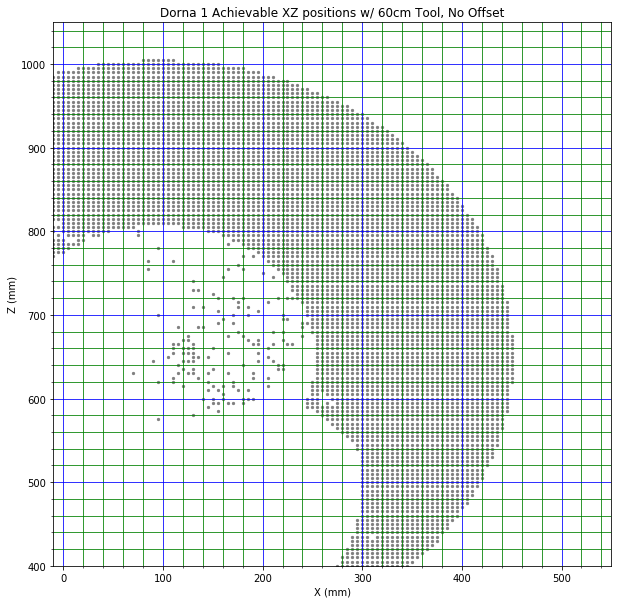

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.minorticks_on()
plt.grid(b=True, which='major', color='b', linestyle='-')
plt.grid(b=True, which='minor', color='g', linestyle='-')
plt.xlim(-10,550)
plt.ylim(400,1050)
plt.xlabel('X (mm)')
plt.ylabel('Z (mm)')
xs=[]
zs=[]
for i in range(X.size):
    for j in range(Y.size):
        for k in range(Z.size):
            if(validTheta[i,j,k]>0):
                xs.append(X[i])
                zs.append(Z[k])
for i in range(len(zs)):
    zs[i]=zs[i]-200
plt.scatter(xs,zs,s=5,color='gray')
plt.title("Dorna 1 Achievable XZ positions w/ 60cm Tool, No Offset")
plt.savefig("XZ_SpatialFreedom60cmTool.png")

In [5]:
from math import sqrt
goalRot = np.array([[sqrt(2)/2,0,-sqrt(2)/2],[0,1,0],[sqrt(2)/2,0,sqrt(2)/2]]).transpose()
xs = np.array(xs)
zs = np.array(zs)

In [16]:
# instantiate loop variables
validTheta = np.zeros((xs.size, 1, 1)); # indicates presence of solution at each test point
print(zs.size*xs.size)
# thetaMap = [[[np.ones((5,1))*-99 for i in zs] for j in range(1)] for k in xs];
# print(thetaMap)
valCount=0
invalCount = 0
totCount=0
lastValTheta = np.zeros((len(S[0]),1)) #stores last ik solution
j=0
for i in range(xs.size):
    for k in range(1):
        print("valid=",valCount,"invalid=",invalCount,"tested",totCount,"out of",xs.size*zs.size,[xs[i],zs[i]])
        totCount+=1
        goalPos = np.array([[xs[i],0,zs[i]]]).transpose();
        goalT = toPose(goalRot,goalPos);
        thetaMat,norm = findIK(goalT, S,M,max_iter=100);
        if(len(thetaMat)>0):
            print(len(thetaMat))
#                 print(thetaMat,"\n")
            valCount+=1
            lastValTheta=thetaMat[0]
            validTheta[i,j,k]=len(thetaMat)
#             print(thetaMat)
#             thetaMap[i][j][k]=thetaMat;
        else:
            invalCount+=1
            print(norm)

31753225
valid= 0 invalid= 0 tested 0 out of 31753225 [-10, 770]
4
valid= 1 invalid= 0 tested 1 out of 31753225 [-10, 775]
3
valid= 2 invalid= 0 tested 2 out of 31753225 [-10, 780]
6
valid= 3 invalid= 0 tested 3 out of 31753225 [-10, 785]
4
valid= 4 invalid= 0 tested 4 out of 31753225 [-10, 790]
3
valid= 5 invalid= 0 tested 5 out of 31753225 [-10, 800]
8.720145529231264
valid= 5 invalid= 1 tested 6 out of 31753225 [-10, 805]
391.8241031309904
valid= 5 invalid= 2 tested 7 out of 31753225 [-10, 815]
318.58284644302876
valid= 5 invalid= 3 tested 8 out of 31753225 [-10, 820]
474.6605969740826
valid= 5 invalid= 4 tested 9 out of 31753225 [-10, 825]
26.668631116748475
valid= 5 invalid= 5 tested 10 out of 31753225 [-10, 830]
763.4306997560955
valid= 5 invalid= 6 tested 11 out of 31753225 [-10, 835]
474.0540497333939
valid= 5 invalid= 7 tested 12 out of 31753225 [-10, 840]
50.8274768230612
valid= 5 invalid= 8 tested 13 out of 31753225 [-10, 845]
410.24725096762927
valid= 5 invalid= 9 tested 14

175.0451387954711
valid= 15 invalid= 97 tested 112 out of 31753225 [0, 920]
866.953209714448
valid= 15 invalid= 98 tested 113 out of 31753225 [0, 925]
120.05546365943471
valid= 15 invalid= 99 tested 114 out of 31753225 [0, 930]
355.2984344703822
valid= 15 invalid= 100 tested 115 out of 31753225 [0, 935]
355.35838413824575
valid= 15 invalid= 101 tested 116 out of 31753225 [0, 940]
249.52855112985674
valid= 15 invalid= 102 tested 117 out of 31753225 [0, 945]
251.15896208645998
valid= 15 invalid= 103 tested 118 out of 31753225 [0, 950]
177.27212636959385
valid= 15 invalid= 104 tested 119 out of 31753225 [0, 955]
147.51192370456243
valid= 15 invalid= 105 tested 120 out of 31753225 [0, 960]
151.26496949159437
valid= 15 invalid= 106 tested 121 out of 31753225 [0, 965]
477.51293086087185
valid= 15 invalid= 107 tested 122 out of 31753225 [0, 970]
388.64766934505656
valid= 15 invalid= 108 tested 123 out of 31753225 [0, 975]
762.1921905346353
valid= 15 invalid= 109 tested 124 out of 31753225 [0,

67.27800484495155
valid= 29 invalid= 192 tested 221 out of 31753225 [15, 840]
30.924407630966627
valid= 29 invalid= 193 tested 222 out of 31753225 [15, 845]
702.7635077212917
valid= 29 invalid= 194 tested 223 out of 31753225 [15, 850]
573.5318335899142
valid= 29 invalid= 195 tested 224 out of 31753225 [15, 855]
618.4278884094131
valid= 29 invalid= 196 tested 225 out of 31753225 [15, 860]
584.6803358085956
valid= 29 invalid= 197 tested 226 out of 31753225 [15, 865]
186.8670308259011
valid= 29 invalid= 198 tested 227 out of 31753225 [15, 870]
97.95710530551088
valid= 29 invalid= 199 tested 228 out of 31753225 [15, 875]
651.065635945345
valid= 29 invalid= 200 tested 229 out of 31753225 [15, 880]
505.6542997110898
valid= 29 invalid= 201 tested 230 out of 31753225 [15, 885]
154.52470304741007
valid= 29 invalid= 202 tested 231 out of 31753225 [15, 890]
246.39532676272475
valid= 29 invalid= 203 tested 232 out of 31753225 [15, 895]
614.8983215866095
valid= 29 invalid= 204 tested 233 out of 317

792.337575361846
valid= 38 invalid= 290 tested 328 out of 31753225 [25, 965]
491.29551287931366
valid= 38 invalid= 291 tested 329 out of 31753225 [25, 970]
523.8471977571005
valid= 38 invalid= 292 tested 330 out of 31753225 [25, 975]
530.760778019858
valid= 38 invalid= 293 tested 331 out of 31753225 [25, 980]
612.6075679222843
valid= 38 invalid= 294 tested 332 out of 31753225 [25, 985]
207.51524932498054
valid= 38 invalid= 295 tested 333 out of 31753225 [25, 990]
264.7737151464541
valid= 38 invalid= 296 tested 334 out of 31753225 [25, 995]
240.88703488588226
valid= 38 invalid= 297 tested 335 out of 31753225 [30, 795]
6
valid= 39 invalid= 297 tested 336 out of 31753225 [30, 800]
4
valid= 40 invalid= 297 tested 337 out of 31753225 [30, 805]
5
valid= 41 invalid= 297 tested 338 out of 31753225 [30, 810]
4
valid= 42 invalid= 297 tested 339 out of 31753225 [30, 815]
4
valid= 43 invalid= 297 tested 340 out of 31753225 [30, 820]
2
valid= 44 invalid= 297 tested 341 out of 31753225 [30, 825]
27.

138.62698401599872
valid= 56 invalid= 381 tested 437 out of 31753225 [40, 895]
103.83814635371918
valid= 56 invalid= 382 tested 438 out of 31753225 [40, 900]
174.2081952912836
valid= 56 invalid= 383 tested 439 out of 31753225 [40, 905]
386.7040549064826
valid= 56 invalid= 384 tested 440 out of 31753225 [40, 910]
115.92024397469358
valid= 56 invalid= 385 tested 441 out of 31753225 [40, 915]
107.14934093666724
valid= 56 invalid= 386 tested 442 out of 31753225 [40, 920]
669.8438979067759
valid= 56 invalid= 387 tested 443 out of 31753225 [40, 925]
99.51913970035494
valid= 56 invalid= 388 tested 444 out of 31753225 [40, 930]
164.72225542262666
valid= 56 invalid= 389 tested 445 out of 31753225 [40, 935]
454.3776630009416
valid= 56 invalid= 390 tested 446 out of 31753225 [40, 940]
780.5556268827138
valid= 56 invalid= 391 tested 447 out of 31753225 [40, 945]
876.9843783747109
valid= 56 invalid= 392 tested 448 out of 31753225 [40, 950]
340.263830243687
valid= 56 invalid= 393 tested 449 out of 3

3
valid= 75 invalid= 471 tested 546 out of 31753225 [55, 835]
3
valid= 76 invalid= 471 tested 547 out of 31753225 [55, 840]
546.2579570828012
valid= 76 invalid= 472 tested 548 out of 31753225 [55, 845]
9.749357027130483
valid= 76 invalid= 473 tested 549 out of 31753225 [55, 850]
13.311242213158671
valid= 76 invalid= 474 tested 550 out of 31753225 [55, 855]
22.109238030696787
valid= 76 invalid= 475 tested 551 out of 31753225 [55, 860]
648.8171305513662
valid= 76 invalid= 476 tested 552 out of 31753225 [55, 865]
487.30018032830736
valid= 76 invalid= 477 tested 553 out of 31753225 [55, 870]
474.1998324975983
valid= 76 invalid= 478 tested 554 out of 31753225 [55, 875]
280.00751077845206
valid= 76 invalid= 479 tested 555 out of 31753225 [55, 880]
245.40411791402397
valid= 76 invalid= 480 tested 556 out of 31753225 [55, 885]
245.8894397131813
valid= 76 invalid= 481 tested 557 out of 31753225 [55, 890]
96.63163656568113
valid= 76 invalid= 482 tested 558 out of 31753225 [55, 895]
481.674829199

782.2973065751693
valid= 91 invalid= 564 tested 655 out of 31753225 [65, 980]
179.37970496605578
valid= 91 invalid= 565 tested 656 out of 31753225 [65, 985]
788.9808172553228
valid= 91 invalid= 566 tested 657 out of 31753225 [65, 990]
355.07237269302726
valid= 91 invalid= 567 tested 658 out of 31753225 [65, 995]
440.2822509032996
valid= 91 invalid= 568 tested 659 out of 31753225 [65, 1000]
314.1147473468337
valid= 91 invalid= 569 tested 660 out of 31753225 [70, 630]
2
valid= 92 invalid= 569 tested 661 out of 31753225 [70, 805]
2
valid= 93 invalid= 569 tested 662 out of 31753225 [70, 810]
4
valid= 94 invalid= 569 tested 663 out of 31753225 [70, 815]
5
valid= 95 invalid= 569 tested 664 out of 31753225 [70, 820]
3
valid= 96 invalid= 569 tested 665 out of 31753225 [70, 825]
3
valid= 97 invalid= 569 tested 666 out of 31753225 [70, 830]
5
valid= 98 invalid= 569 tested 667 out of 31753225 [70, 835]
4
valid= 99 invalid= 569 tested 668 out of 31753225 [70, 840]
4
valid= 100 invalid= 569 tested 

80.93096310687044
valid= 118 invalid= 647 tested 765 out of 31753225 [80, 925]
382.0233900026863
valid= 118 invalid= 648 tested 766 out of 31753225 [80, 930]
450.85255227732875
valid= 118 invalid= 649 tested 767 out of 31753225 [80, 935]
706.5754045670394
valid= 118 invalid= 650 tested 768 out of 31753225 [80, 940]
794.9922019031316
valid= 118 invalid= 651 tested 769 out of 31753225 [80, 945]
349.01024622621946
valid= 118 invalid= 652 tested 770 out of 31753225 [80, 950]
374.4698315028545
valid= 118 invalid= 653 tested 771 out of 31753225 [80, 955]
104.01278041049034
valid= 118 invalid= 654 tested 772 out of 31753225 [80, 960]
113.28155654191835
valid= 118 invalid= 655 tested 773 out of 31753225 [80, 965]
114.4398053336915
valid= 118 invalid= 656 tested 774 out of 31753225 [80, 970]
806.3680894689486
valid= 118 invalid= 657 tested 775 out of 31753225 [80, 975]
512.0621181187348
valid= 118 invalid= 658 tested 776 out of 31753225 [80, 980]
472.41594119892557
valid= 118 invalid= 659 teste

2
valid= 145 invalid= 729 tested 874 out of 31753225 [95, 835]
3
valid= 146 invalid= 729 tested 875 out of 31753225 [95, 840]
3
valid= 147 invalid= 729 tested 876 out of 31753225 [95, 845]
4
valid= 148 invalid= 729 tested 877 out of 31753225 [95, 850]
3
valid= 149 invalid= 729 tested 878 out of 31753225 [95, 855]
785.9742585230658
valid= 149 invalid= 730 tested 879 out of 31753225 [95, 860]
18.34157032218587
valid= 149 invalid= 731 tested 880 out of 31753225 [95, 865]
324.91723100438446
valid= 149 invalid= 732 tested 881 out of 31753225 [95, 870]
30.709723932654214
valid= 149 invalid= 733 tested 882 out of 31753225 [95, 875]
82.07954203329174
valid= 149 invalid= 734 tested 883 out of 31753225 [95, 880]
391.53253665641256
valid= 149 invalid= 735 tested 884 out of 31753225 [95, 885]
30.6147265873361
valid= 149 invalid= 736 tested 885 out of 31753225 [95, 890]
156.84675675561533
valid= 149 invalid= 737 tested 886 out of 31753225 [95, 895]
79.25607960479692
valid= 149 invalid= 738 tested 8

115.55019255704367
valid= 169 invalid= 813 tested 982 out of 31753225 [105, 970]
588.3565676735851
valid= 169 invalid= 814 tested 983 out of 31753225 [105, 975]
140.29143050547935
valid= 169 invalid= 815 tested 984 out of 31753225 [105, 980]
543.0907608167641
valid= 169 invalid= 816 tested 985 out of 31753225 [105, 985]
145.236960569944
valid= 169 invalid= 817 tested 986 out of 31753225 [105, 990]
369.5906636381065
valid= 169 invalid= 818 tested 987 out of 31753225 [105, 995]
206.23832095952451
valid= 169 invalid= 819 tested 988 out of 31753225 [105, 1000]
621.1101033682916
valid= 169 invalid= 820 tested 989 out of 31753225 [105, 1005]
486.95010181428603
valid= 169 invalid= 821 tested 990 out of 31753225 [110, 620]
1
valid= 170 invalid= 821 tested 991 out of 31753225 [110, 625]
1
valid= 171 invalid= 821 tested 992 out of 31753225 [110, 655]
3
valid= 172 invalid= 821 tested 993 out of 31753225 [110, 660]
3
valid= 173 invalid= 821 tested 994 out of 31753225 [110, 665]
2
valid= 174 invali

519.579980846815
valid= 207 invalid= 884 tested 1091 out of 31753225 [120, 835]
1
valid= 208 invalid= 884 tested 1092 out of 31753225 [120, 840]
4
valid= 209 invalid= 884 tested 1093 out of 31753225 [120, 845]
1
valid= 210 invalid= 884 tested 1094 out of 31753225 [120, 850]
4
valid= 211 invalid= 884 tested 1095 out of 31753225 [120, 855]
2
valid= 212 invalid= 884 tested 1096 out of 31753225 [120, 860]
2
valid= 213 invalid= 884 tested 1097 out of 31753225 [120, 865]
536.8266020624478
valid= 213 invalid= 885 tested 1098 out of 31753225 [120, 870]
429.96767388504026
valid= 213 invalid= 886 tested 1099 out of 31753225 [120, 875]
431.34171776632286
valid= 213 invalid= 887 tested 1100 out of 31753225 [120, 880]
474.4541597589324
valid= 213 invalid= 888 tested 1101 out of 31753225 [120, 885]
406.5330939806493
valid= 213 invalid= 889 tested 1102 out of 31753225 [120, 890]
474.2735804911266
valid= 213 invalid= 890 tested 1103 out of 31753225 [120, 895]
65.28584175365324
valid= 213 invalid= 891 

33.706239526596164
valid= 252 invalid= 949 tested 1201 out of 31753225 [130, 900]
236.10957200422396
valid= 252 invalid= 950 tested 1202 out of 31753225 [130, 905]
56.5102691275321
valid= 252 invalid= 951 tested 1203 out of 31753225 [130, 910]
44.84574219112368
valid= 252 invalid= 952 tested 1204 out of 31753225 [130, 915]
346.68027062338945
valid= 252 invalid= 953 tested 1205 out of 31753225 [130, 920]
359.8259633507275
valid= 252 invalid= 954 tested 1206 out of 31753225 [130, 925]
870.101066185462
valid= 252 invalid= 955 tested 1207 out of 31753225 [130, 930]
232.29445979860293
valid= 252 invalid= 956 tested 1208 out of 31753225 [130, 935]
593.8063934924837
valid= 252 invalid= 957 tested 1209 out of 31753225 [130, 940]
133.4568526460297
valid= 252 invalid= 958 tested 1210 out of 31753225 [130, 945]
579.1229689711273
valid= 252 invalid= 959 tested 1211 out of 31753225 [130, 950]
128.5460166174805
valid= 252 invalid= 960 tested 1212 out of 31753225 [130, 955]
90.45778889977998
valid= 2

521.8538375900933
valid= 281 invalid= 1027 tested 1308 out of 31753225 [140, 1000]
556.3502896261252
valid= 281 invalid= 1028 tested 1309 out of 31753225 [145, 590]
1
valid= 282 invalid= 1028 tested 1310 out of 31753225 [145, 610]
1
valid= 283 invalid= 1028 tested 1311 out of 31753225 [145, 620]
1
valid= 284 invalid= 1028 tested 1312 out of 31753225 [145, 630]
1
valid= 285 invalid= 1028 tested 1313 out of 31753225 [145, 650]
1
valid= 286 invalid= 1028 tested 1314 out of 31753225 [145, 800]
3
valid= 287 invalid= 1028 tested 1315 out of 31753225 [145, 805]
3
valid= 288 invalid= 1028 tested 1316 out of 31753225 [145, 810]
2
valid= 289 invalid= 1028 tested 1317 out of 31753225 [145, 815]
3
valid= 290 invalid= 1028 tested 1318 out of 31753225 [145, 820]
3
valid= 291 invalid= 1028 tested 1319 out of 31753225 [145, 825]
2
valid= 292 invalid= 1028 tested 1320 out of 31753225 [145, 830]
521.0531519255017
valid= 292 invalid= 1029 tested 1321 out of 31753225 [145, 835]
2
valid= 293 invalid= 1029 

2
valid= 331 invalid= 1087 tested 1418 out of 31753225 [155, 850]
2
valid= 332 invalid= 1087 tested 1419 out of 31753225 [155, 855]
4
valid= 333 invalid= 1087 tested 1420 out of 31753225 [155, 860]
3
valid= 334 invalid= 1087 tested 1421 out of 31753225 [155, 865]
2
valid= 335 invalid= 1087 tested 1422 out of 31753225 [155, 870]
272.26763185149537
valid= 335 invalid= 1088 tested 1423 out of 31753225 [155, 875]
7.088768416073826
valid= 335 invalid= 1089 tested 1424 out of 31753225 [155, 880]
118.93470434921907
valid= 335 invalid= 1090 tested 1425 out of 31753225 [155, 885]
466.323564503713
valid= 335 invalid= 1091 tested 1426 out of 31753225 [155, 890]
56.5928881241601
valid= 335 invalid= 1092 tested 1427 out of 31753225 [155, 895]
101.52823319550848
valid= 335 invalid= 1093 tested 1428 out of 31753225 [155, 900]
557.9294952511799
valid= 335 invalid= 1094 tested 1429 out of 31753225 [155, 905]
107.74023307854854
valid= 335 invalid= 1095 tested 1430 out of 31753225 [155, 910]
242.67554487

348.7841002315604
valid= 371 invalid= 1155 tested 1526 out of 31753225 [165, 920]
597.4965066762306
valid= 371 invalid= 1156 tested 1527 out of 31753225 [165, 925]
71.60779255402288
valid= 371 invalid= 1157 tested 1528 out of 31753225 [165, 930]
483.4811236102676
valid= 371 invalid= 1158 tested 1529 out of 31753225 [165, 935]
385.4890328344379
valid= 371 invalid= 1159 tested 1530 out of 31753225 [165, 940]
163.83213366271994
valid= 371 invalid= 1160 tested 1531 out of 31753225 [165, 945]
127.2900836342188
valid= 371 invalid= 1161 tested 1532 out of 31753225 [165, 950]
216.82888437875562
valid= 371 invalid= 1162 tested 1533 out of 31753225 [165, 955]
801.1291332631777
valid= 371 invalid= 1163 tested 1534 out of 31753225 [165, 960]
484.83225133828444
valid= 371 invalid= 1164 tested 1535 out of 31753225 [165, 965]
113.02410797542389
valid= 371 invalid= 1165 tested 1536 out of 31753225 [165, 970]
169.10982073233072
valid= 371 invalid= 1166 tested 1537 out of 31753225 [165, 975]
423.4557395

542.691907490029
valid= 409 invalid= 1225 tested 1634 out of 31753225 [175, 985]
478.1004007407436
valid= 409 invalid= 1226 tested 1635 out of 31753225 [175, 990]
268.97007474698194
valid= 409 invalid= 1227 tested 1636 out of 31753225 [175, 995]
602.925005022399
valid= 409 invalid= 1228 tested 1637 out of 31753225 [180, 595]
1
valid= 410 invalid= 1228 tested 1638 out of 31753225 [180, 600]
1
valid= 411 invalid= 1228 tested 1639 out of 31753225 [180, 640]
1
valid= 412 invalid= 1228 tested 1640 out of 31753225 [180, 675]
2
valid= 413 invalid= 1228 tested 1641 out of 31753225 [180, 720]
3
valid= 414 invalid= 1228 tested 1642 out of 31753225 [180, 755]
4
valid= 415 invalid= 1228 tested 1643 out of 31753225 [180, 770]
4
valid= 416 invalid= 1228 tested 1644 out of 31753225 [180, 785]
1
valid= 417 invalid= 1228 tested 1645 out of 31753225 [180, 790]
1
valid= 418 invalid= 1228 tested 1646 out of 31753225 [180, 795]
2.6489299059235836
valid= 418 invalid= 1229 tested 1647 out of 31753225 [180, 8

3
valid= 461 invalid= 1283 tested 1744 out of 31753225 [190, 800]
0.12271402632354973
valid= 461 invalid= 1284 tested 1745 out of 31753225 [190, 805]
3
valid= 462 invalid= 1284 tested 1746 out of 31753225 [190, 810]
45.51176641996351
valid= 462 invalid= 1285 tested 1747 out of 31753225 [190, 815]
2
valid= 463 invalid= 1285 tested 1748 out of 31753225 [190, 820]
4
valid= 464 invalid= 1285 tested 1749 out of 31753225 [190, 825]
30.41601306606196
valid= 464 invalid= 1286 tested 1750 out of 31753225 [190, 830]
3
valid= 465 invalid= 1286 tested 1751 out of 31753225 [190, 835]
2
valid= 466 invalid= 1286 tested 1752 out of 31753225 [190, 840]
44.74534842847794
valid= 466 invalid= 1287 tested 1753 out of 31753225 [190, 845]
1
valid= 467 invalid= 1287 tested 1754 out of 31753225 [190, 850]
2
valid= 468 invalid= 1287 tested 1755 out of 31753225 [190, 855]
2
valid= 469 invalid= 1287 tested 1756 out of 31753225 [190, 860]
6
valid= 470 invalid= 1287 tested 1757 out of 31753225 [190, 865]
3
valid= 4

471.0110779296612
valid= 516 invalid= 1339 tested 1855 out of 31753225 [200, 880]
159.1935079691649
valid= 516 invalid= 1340 tested 1856 out of 31753225 [200, 885]
91.44970959389029
valid= 516 invalid= 1341 tested 1857 out of 31753225 [200, 890]
71.43576275711202
valid= 516 invalid= 1342 tested 1858 out of 31753225 [200, 895]
496.13614483143624
valid= 516 invalid= 1343 tested 1859 out of 31753225 [200, 900]
84.80895446547534
valid= 516 invalid= 1344 tested 1860 out of 31753225 [200, 905]
102.12604486107303
valid= 516 invalid= 1345 tested 1861 out of 31753225 [200, 910]
87.75290858777099
valid= 516 invalid= 1346 tested 1862 out of 31753225 [200, 915]
163.5848685905361
valid= 516 invalid= 1347 tested 1863 out of 31753225 [200, 920]
641.1514056140131
valid= 516 invalid= 1348 tested 1864 out of 31753225 [200, 925]
350.81063005007405
valid= 516 invalid= 1349 tested 1865 out of 31753225 [200, 930]
295.01923921343115
valid= 516 invalid= 1350 tested 1866 out of 31753225 [200, 935]
72.406758660

56.57168772804588
valid= 564 invalid= 1401 tested 1965 out of 31753225 [210, 930]
59.29111934955058
valid= 564 invalid= 1402 tested 1966 out of 31753225 [210, 935]
124.27643765150354
valid= 564 invalid= 1403 tested 1967 out of 31753225 [210, 940]
96.17361917633264
valid= 564 invalid= 1404 tested 1968 out of 31753225 [210, 945]
71.13897136556288
valid= 564 invalid= 1405 tested 1969 out of 31753225 [210, 950]
329.26353369763746
valid= 564 invalid= 1406 tested 1970 out of 31753225 [210, 955]
331.5141220600654
valid= 564 invalid= 1407 tested 1971 out of 31753225 [210, 960]
534.068596291368
valid= 564 invalid= 1408 tested 1972 out of 31753225 [210, 965]
637.5492796242595
valid= 564 invalid= 1409 tested 1973 out of 31753225 [210, 970]
738.2106231537148
valid= 564 invalid= 1410 tested 1974 out of 31753225 [210, 975]
119.27557482762086
valid= 564 invalid= 1411 tested 1975 out of 31753225 [210, 980]
695.6191343585533
valid= 564 invalid= 1412 tested 1976 out of 31753225 [210, 985]
205.3164329315

658.3114699375499
valid= 618 invalid= 1458 tested 2076 out of 31753225 [220, 970]
527.8970926022739
valid= 618 invalid= 1459 tested 2077 out of 31753225 [220, 975]
118.9339261678677
valid= 618 invalid= 1460 tested 2078 out of 31753225 [220, 980]
601.846932685315
valid= 618 invalid= 1461 tested 2079 out of 31753225 [225, 665]
1
valid= 619 invalid= 1461 tested 2080 out of 31753225 [225, 695]
1
valid= 620 invalid= 1461 tested 2081 out of 31753225 [225, 720]
1
valid= 621 invalid= 1461 tested 2082 out of 31753225 [225, 740]
1
valid= 622 invalid= 1461 tested 2083 out of 31753225 [225, 745]
3
valid= 623 invalid= 1461 tested 2084 out of 31753225 [225, 750]
4
valid= 624 invalid= 1461 tested 2085 out of 31753225 [225, 755]
1
valid= 625 invalid= 1461 tested 2086 out of 31753225 [225, 760]
4
valid= 626 invalid= 1461 tested 2087 out of 31753225 [225, 765]
4
valid= 627 invalid= 1461 tested 2088 out of 31753225 [225, 770]
4
valid= 628 invalid= 1461 tested 2089 out of 31753225 [225, 775]
3
valid= 629 

1
valid= 683 invalid= 1506 tested 2189 out of 31753225 [235, 750]
4
valid= 684 invalid= 1506 tested 2190 out of 31753225 [235, 755]
4
valid= 685 invalid= 1506 tested 2191 out of 31753225 [235, 760]
4
valid= 686 invalid= 1506 tested 2192 out of 31753225 [235, 765]
4
valid= 687 invalid= 1506 tested 2193 out of 31753225 [235, 770]
2
valid= 688 invalid= 1506 tested 2194 out of 31753225 [235, 775]
4
valid= 689 invalid= 1506 tested 2195 out of 31753225 [235, 780]
2
valid= 690 invalid= 1506 tested 2196 out of 31753225 [235, 785]
2
valid= 691 invalid= 1506 tested 2197 out of 31753225 [235, 790]
4
valid= 692 invalid= 1506 tested 2198 out of 31753225 [235, 795]
4
valid= 693 invalid= 1506 tested 2199 out of 31753225 [235, 800]
3
valid= 694 invalid= 1506 tested 2200 out of 31753225 [235, 805]
2
valid= 695 invalid= 1506 tested 2201 out of 31753225 [235, 810]
4
valid= 696 invalid= 1506 tested 2202 out of 31753225 [235, 815]
2
valid= 697 invalid= 1506 tested 2203 out of 31753225 [235, 820]
1
valid= 6

3
valid= 750 invalid= 1552 tested 2302 out of 31753225 [245, 740]
4
valid= 751 invalid= 1552 tested 2303 out of 31753225 [245, 745]
2
valid= 752 invalid= 1552 tested 2304 out of 31753225 [245, 750]
2
valid= 753 invalid= 1552 tested 2305 out of 31753225 [245, 755]
2
valid= 754 invalid= 1552 tested 2306 out of 31753225 [245, 760]
2
valid= 755 invalid= 1552 tested 2307 out of 31753225 [245, 765]
2
valid= 756 invalid= 1552 tested 2308 out of 31753225 [245, 770]
3
valid= 757 invalid= 1552 tested 2309 out of 31753225 [245, 775]
2
valid= 758 invalid= 1552 tested 2310 out of 31753225 [245, 780]
4
valid= 759 invalid= 1552 tested 2311 out of 31753225 [245, 785]
4
valid= 760 invalid= 1552 tested 2312 out of 31753225 [245, 790]
5
valid= 761 invalid= 1552 tested 2313 out of 31753225 [245, 795]
2
valid= 762 invalid= 1552 tested 2314 out of 31753225 [245, 800]
2
valid= 763 invalid= 1552 tested 2315 out of 31753225 [245, 805]
2
valid= 764 invalid= 1552 tested 2316 out of 31753225 [245, 810]
2
valid= 7

1
valid= 816 invalid= 1599 tested 2415 out of 31753225 [255, 590]
1
valid= 817 invalid= 1599 tested 2416 out of 31753225 [255, 595]
1
valid= 818 invalid= 1599 tested 2417 out of 31753225 [255, 600]
1
valid= 819 invalid= 1599 tested 2418 out of 31753225 [255, 605]
1
valid= 820 invalid= 1599 tested 2419 out of 31753225 [255, 610]
1
valid= 821 invalid= 1599 tested 2420 out of 31753225 [255, 615]
1
valid= 822 invalid= 1599 tested 2421 out of 31753225 [255, 620]
1
valid= 823 invalid= 1599 tested 2422 out of 31753225 [255, 625]
1
valid= 824 invalid= 1599 tested 2423 out of 31753225 [255, 630]
1
valid= 825 invalid= 1599 tested 2424 out of 31753225 [255, 635]
1
valid= 826 invalid= 1599 tested 2425 out of 31753225 [255, 640]
1
valid= 827 invalid= 1599 tested 2426 out of 31753225 [255, 645]
1
valid= 828 invalid= 1599 tested 2427 out of 31753225 [255, 650]
1
valid= 829 invalid= 1599 tested 2428 out of 31753225 [255, 655]
1
valid= 830 invalid= 1599 tested 2429 out of 31753225 [255, 660]
1
valid= 8

2
valid= 912 invalid= 1622 tested 2534 out of 31753225 [260, 810]
2
valid= 913 invalid= 1622 tested 2535 out of 31753225 [260, 815]
2
valid= 914 invalid= 1622 tested 2536 out of 31753225 [260, 820]
3
valid= 915 invalid= 1622 tested 2537 out of 31753225 [260, 825]
3
valid= 916 invalid= 1622 tested 2538 out of 31753225 [260, 830]
4
valid= 917 invalid= 1622 tested 2539 out of 31753225 [260, 835]
1
valid= 918 invalid= 1622 tested 2540 out of 31753225 [260, 840]
1
valid= 919 invalid= 1622 tested 2541 out of 31753225 [260, 845]
12.722574147157191
valid= 919 invalid= 1623 tested 2542 out of 31753225 [260, 850]
2
valid= 920 invalid= 1623 tested 2543 out of 31753225 [260, 855]
2
valid= 921 invalid= 1623 tested 2544 out of 31753225 [260, 860]
2
valid= 922 invalid= 1623 tested 2545 out of 31753225 [260, 865]
2
valid= 923 invalid= 1623 tested 2546 out of 31753225 [260, 870]
2
valid= 924 invalid= 1623 tested 2547 out of 31753225 [260, 875]
35.47078749889536
valid= 924 invalid= 1624 tested 2548 out 

3.391268461808035e-08
valid= 977 invalid= 1670 tested 2647 out of 31753225 [270, 600]
1
valid= 978 invalid= 1670 tested 2648 out of 31753225 [270, 605]
1
valid= 979 invalid= 1670 tested 2649 out of 31753225 [270, 610]
1
valid= 980 invalid= 1670 tested 2650 out of 31753225 [270, 615]
1
valid= 981 invalid= 1670 tested 2651 out of 31753225 [270, 620]
1
valid= 982 invalid= 1670 tested 2652 out of 31753225 [270, 625]
1
valid= 983 invalid= 1670 tested 2653 out of 31753225 [270, 630]
1
valid= 984 invalid= 1670 tested 2654 out of 31753225 [270, 635]
1
valid= 985 invalid= 1670 tested 2655 out of 31753225 [270, 640]
1
valid= 986 invalid= 1670 tested 2656 out of 31753225 [270, 645]
1
valid= 987 invalid= 1670 tested 2657 out of 31753225 [270, 650]
1
valid= 988 invalid= 1670 tested 2658 out of 31753225 [270, 655]
1
valid= 989 invalid= 1670 tested 2659 out of 31753225 [270, 660]
1
valid= 990 invalid= 1670 tested 2660 out of 31753225 [270, 665]
1
valid= 991 invalid= 1670 tested 2661 out of 31753225 [

2
valid= 1062 invalid= 1700 tested 2762 out of 31753225 [275, 775]
4
valid= 1063 invalid= 1700 tested 2763 out of 31753225 [275, 780]
3
valid= 1064 invalid= 1700 tested 2764 out of 31753225 [275, 785]
4
valid= 1065 invalid= 1700 tested 2765 out of 31753225 [275, 790]
3
valid= 1066 invalid= 1700 tested 2766 out of 31753225 [275, 795]
2
valid= 1067 invalid= 1700 tested 2767 out of 31753225 [275, 800]
2
valid= 1068 invalid= 1700 tested 2768 out of 31753225 [275, 805]
3
valid= 1069 invalid= 1700 tested 2769 out of 31753225 [275, 810]
3
valid= 1070 invalid= 1700 tested 2770 out of 31753225 [275, 815]
2
valid= 1071 invalid= 1700 tested 2771 out of 31753225 [275, 820]
2
valid= 1072 invalid= 1700 tested 2772 out of 31753225 [275, 825]
2
valid= 1073 invalid= 1700 tested 2773 out of 31753225 [275, 830]
2
valid= 1074 invalid= 1700 tested 2774 out of 31753225 [275, 835]
2
valid= 1075 invalid= 1700 tested 2775 out of 31753225 [275, 840]
4
valid= 1076 invalid= 1700 tested 2776 out of 31753225 [275, 

74.65335184654127
valid= 1130 invalid= 1744 tested 2874 out of 31753225 [280, 920]
404.2115999075428
valid= 1130 invalid= 1745 tested 2875 out of 31753225 [280, 925]
190.9584649475057
valid= 1130 invalid= 1746 tested 2876 out of 31753225 [280, 930]
685.4525096526926
valid= 1130 invalid= 1747 tested 2877 out of 31753225 [280, 935]
112.30218756410441
valid= 1130 invalid= 1748 tested 2878 out of 31753225 [280, 940]
135.8554613682994
valid= 1130 invalid= 1749 tested 2879 out of 31753225 [280, 945]
527.6028016139719
valid= 1130 invalid= 1750 tested 2880 out of 31753225 [280, 950]
96.20692566091353
valid= 1130 invalid= 1751 tested 2881 out of 31753225 [285, 400]
2.9947663905012806e-07
valid= 1130 invalid= 1752 tested 2882 out of 31753225 [285, 405]
1.5859922611628102e-05
valid= 1130 invalid= 1753 tested 2883 out of 31753225 [285, 410]
6.523925993047257e-08
valid= 1130 invalid= 1754 tested 2884 out of 31753225 [285, 415]
0.00034099481045612307
valid= 1130 invalid= 1755 tested 2885 out of 3175

5.862599608065155e-07
valid= 1176 invalid= 1804 tested 2980 out of 31753225 [290, 580]
1.811481941829499e-08
valid= 1176 invalid= 1805 tested 2981 out of 31753225 [290, 585]
0.00023154809861210718
valid= 1176 invalid= 1806 tested 2982 out of 31753225 [290, 590]
1.5641387174782203e-08
valid= 1176 invalid= 1807 tested 2983 out of 31753225 [290, 595]
2.2248069441522953e-06
valid= 1176 invalid= 1808 tested 2984 out of 31753225 [290, 600]
0.00011053627791062047
valid= 1176 invalid= 1809 tested 2985 out of 31753225 [290, 605]
5.93090332567297e-05
valid= 1176 invalid= 1810 tested 2986 out of 31753225 [290, 610]
243.5866428606349
valid= 1176 invalid= 1811 tested 2987 out of 31753225 [290, 615]
3.44016488989597e-08
valid= 1176 invalid= 1812 tested 2988 out of 31753225 [290, 620]
6.118605044793847e-07
valid= 1176 invalid= 1813 tested 2989 out of 31753225 [290, 625]
1
valid= 1177 invalid= 1813 tested 2990 out of 31753225 [290, 630]
1
valid= 1178 invalid= 1813 tested 2991 out of 31753225 [290, 635

1
valid= 1227 invalid= 1860 tested 3087 out of 31753225 [295, 645]
1
valid= 1228 invalid= 1860 tested 3088 out of 31753225 [295, 650]
1
valid= 1229 invalid= 1860 tested 3089 out of 31753225 [295, 655]
1.054461015080045e-07
valid= 1229 invalid= 1861 tested 3090 out of 31753225 [295, 660]
1
valid= 1230 invalid= 1861 tested 3091 out of 31753225 [295, 665]
2
valid= 1231 invalid= 1861 tested 3092 out of 31753225 [295, 670]
2
valid= 1232 invalid= 1861 tested 3093 out of 31753225 [295, 675]
2
valid= 1233 invalid= 1861 tested 3094 out of 31753225 [295, 680]
3
valid= 1234 invalid= 1861 tested 3095 out of 31753225 [295, 685]
1
valid= 1235 invalid= 1861 tested 3096 out of 31753225 [295, 690]
1
valid= 1236 invalid= 1861 tested 3097 out of 31753225 [295, 695]
2
valid= 1237 invalid= 1861 tested 3098 out of 31753225 [295, 700]
2
valid= 1238 invalid= 1861 tested 3099 out of 31753225 [295, 705]
2
valid= 1239 invalid= 1861 tested 3100 out of 31753225 [295, 710]
3
valid= 1240 invalid= 1861 tested 3101 ou

2.367230922979007e-05
valid= 1269 invalid= 1923 tested 3192 out of 31753225 [300, 625]
1.1684773970421799e-06
valid= 1269 invalid= 1924 tested 3193 out of 31753225 [300, 630]
2.718386113465214e-06
valid= 1269 invalid= 1925 tested 3194 out of 31753225 [300, 635]
1.4596947743346941e-07
valid= 1269 invalid= 1926 tested 3195 out of 31753225 [300, 640]
1
valid= 1270 invalid= 1926 tested 3196 out of 31753225 [300, 645]
1
valid= 1271 invalid= 1926 tested 3197 out of 31753225 [300, 650]
1
valid= 1272 invalid= 1926 tested 3198 out of 31753225 [300, 655]
4
valid= 1273 invalid= 1926 tested 3199 out of 31753225 [300, 660]
1
valid= 1274 invalid= 1926 tested 3200 out of 31753225 [300, 665]
1
valid= 1275 invalid= 1926 tested 3201 out of 31753225 [300, 670]
1
valid= 1276 invalid= 1926 tested 3202 out of 31753225 [300, 675]
2
valid= 1277 invalid= 1926 tested 3203 out of 31753225 [300, 680]
1
valid= 1278 invalid= 1926 tested 3204 out of 31753225 [300, 685]
1
valid= 1279 invalid= 1926 tested 3205 out of 

6.014978193041602e-07
valid= 1313 invalid= 1985 tested 3298 out of 31753225 [305, 610]
1.3519398054850246e-06
valid= 1313 invalid= 1986 tested 3299 out of 31753225 [305, 615]
1.7853510609815615e-08
valid= 1313 invalid= 1987 tested 3300 out of 31753225 [305, 620]
4.1780233839684267e-07
valid= 1313 invalid= 1988 tested 3301 out of 31753225 [305, 625]
4.6812608176482974e-07
valid= 1313 invalid= 1989 tested 3302 out of 31753225 [305, 630]
0.0008574594453670341
valid= 1313 invalid= 1990 tested 3303 out of 31753225 [305, 635]
8.959335738947536e-05
valid= 1313 invalid= 1991 tested 3304 out of 31753225 [305, 640]
1
valid= 1314 invalid= 1991 tested 3305 out of 31753225 [305, 645]
1
valid= 1315 invalid= 1991 tested 3306 out of 31753225 [305, 650]
1
valid= 1316 invalid= 1991 tested 3307 out of 31753225 [305, 655]
4
valid= 1317 invalid= 1991 tested 3308 out of 31753225 [305, 660]
1
valid= 1318 invalid= 1991 tested 3309 out of 31753225 [305, 665]
3
valid= 1319 invalid= 1991 tested 3310 out of 31753

2.8563651008636538e-06
valid= 1358 invalid= 2046 tested 3404 out of 31753225 [310, 605]
3.0948737533938316e-08
valid= 1358 invalid= 2047 tested 3405 out of 31753225 [310, 610]
0.0005901096266620616
valid= 1358 invalid= 2048 tested 3406 out of 31753225 [310, 615]
3.4842390903013375e-08
valid= 1358 invalid= 2049 tested 3407 out of 31753225 [310, 620]
3.1989374698416118e-06
valid= 1358 invalid= 2050 tested 3408 out of 31753225 [310, 625]
3.4442403727719584e-05
valid= 1358 invalid= 2051 tested 3409 out of 31753225 [310, 630]
9.697378804816047e-07
valid= 1358 invalid= 2052 tested 3410 out of 31753225 [310, 635]
3.360487580689952e-06
valid= 1358 invalid= 2053 tested 3411 out of 31753225 [310, 640]
7.18806191057054e-08
valid= 1358 invalid= 2054 tested 3412 out of 31753225 [310, 645]
1
valid= 1359 invalid= 2054 tested 3413 out of 31753225 [310, 650]
3
valid= 1360 invalid= 2054 tested 3414 out of 31753225 [310, 655]
4
valid= 1361 invalid= 2054 tested 3415 out of 31753225 [310, 660]
2
valid= 136

9.229510454448514e-05
valid= 1402 invalid= 2108 tested 3510 out of 31753225 [315, 600]
1.8419027276469723e-05
valid= 1402 invalid= 2109 tested 3511 out of 31753225 [315, 605]
1.9818980175564312e-05
valid= 1402 invalid= 2110 tested 3512 out of 31753225 [315, 610]
3.1056817071310606e-10
valid= 1402 invalid= 2111 tested 3513 out of 31753225 [315, 615]
1.2462735068699928e-08
valid= 1402 invalid= 2112 tested 3514 out of 31753225 [315, 620]
7.076833722636555e-05
valid= 1402 invalid= 2113 tested 3515 out of 31753225 [315, 625]
4.750591700840005e-08
valid= 1402 invalid= 2114 tested 3516 out of 31753225 [315, 630]
5.9374368454492744e-05
valid= 1402 invalid= 2115 tested 3517 out of 31753225 [315, 635]
1.522270623313902e-05
valid= 1402 invalid= 2116 tested 3518 out of 31753225 [315, 640]
5.05946484605041e-09
valid= 1402 invalid= 2117 tested 3519 out of 31753225 [315, 645]
2
valid= 1403 invalid= 2117 tested 3520 out of 31753225 [315, 650]
1
valid= 1404 invalid= 2117 tested 3521 out of 31753225 [31

6.131285951126212e-08
valid= 1446 invalid= 2169 tested 3615 out of 31753225 [320, 595]
4.6190285579662776e-08
valid= 1446 invalid= 2170 tested 3616 out of 31753225 [320, 600]
0.0005653801618683387
valid= 1446 invalid= 2171 tested 3617 out of 31753225 [320, 605]
1.5834625099483404e-05
valid= 1446 invalid= 2172 tested 3618 out of 31753225 [320, 610]
0.0005164473609265328
valid= 1446 invalid= 2173 tested 3619 out of 31753225 [320, 615]
1.0576778087083932e-06
valid= 1446 invalid= 2174 tested 3620 out of 31753225 [320, 620]
5.916368993051999e-05
valid= 1446 invalid= 2175 tested 3621 out of 31753225 [320, 625]
0.00017344493418146743
valid= 1446 invalid= 2176 tested 3622 out of 31753225 [320, 630]
3.663863263329949e-05
valid= 1446 invalid= 2177 tested 3623 out of 31753225 [320, 635]
0.00023097313785921565
valid= 1446 invalid= 2178 tested 3624 out of 31753225 [320, 640]
2.4050888259657893e-05
valid= 1446 invalid= 2179 tested 3625 out of 31753225 [320, 645]
1.8841039421263815e-07
valid= 1446 in

1.900398090764481e-05
valid= 1489 invalid= 2231 tested 3720 out of 31753225 [325, 590]
7.105458055635528e-07
valid= 1489 invalid= 2232 tested 3721 out of 31753225 [325, 595]
6.728181823729973e-07
valid= 1489 invalid= 2233 tested 3722 out of 31753225 [325, 600]
8.47022632607775e-06
valid= 1489 invalid= 2234 tested 3723 out of 31753225 [325, 605]
0.0006479787447886146
valid= 1489 invalid= 2235 tested 3724 out of 31753225 [325, 610]
0.00042877804557624617
valid= 1489 invalid= 2236 tested 3725 out of 31753225 [325, 615]
0.0005435715862831624
valid= 1489 invalid= 2237 tested 3726 out of 31753225 [325, 620]
1.9477346848772e-06
valid= 1489 invalid= 2238 tested 3727 out of 31753225 [325, 625]
298.13713532538
valid= 1489 invalid= 2239 tested 3728 out of 31753225 [325, 630]
9.867553441284574e-07
valid= 1489 invalid= 2240 tested 3729 out of 31753225 [325, 635]
1.5625985900559573e-05
valid= 1489 invalid= 2241 tested 3730 out of 31753225 [325, 640]
2
valid= 1490 invalid= 2241 tested 3731 out of 317

1.5623552111994716e-05
valid= 1534 invalid= 2291 tested 3825 out of 31753225 [330, 590]
3.4083303218636376e-09
valid= 1534 invalid= 2292 tested 3826 out of 31753225 [330, 595]
5.143973300057694e-06
valid= 1534 invalid= 2293 tested 3827 out of 31753225 [330, 600]
0.00013915085120670765
valid= 1534 invalid= 2294 tested 3828 out of 31753225 [330, 605]
0.0005579532994254132
valid= 1534 invalid= 2295 tested 3829 out of 31753225 [330, 610]
1.2072230901475415e-08
valid= 1534 invalid= 2296 tested 3830 out of 31753225 [330, 615]
0.0005418735449717698
valid= 1534 invalid= 2297 tested 3831 out of 31753225 [330, 620]
8.164124227485811e-05
valid= 1534 invalid= 2298 tested 3832 out of 31753225 [330, 625]
9.21015160260706e-06
valid= 1534 invalid= 2299 tested 3833 out of 31753225 [330, 630]
1.544343345375537e-08
valid= 1534 invalid= 2300 tested 3834 out of 31753225 [330, 635]
0.0006767527246801318
valid= 1534 invalid= 2301 tested 3835 out of 31753225 [330, 640]
9.23613268909678e-09
valid= 1534 invalid

9.149238530617377e-09
valid= 1578 invalid= 2352 tested 3930 out of 31753225 [335, 595]
5.1777961753187475e-05
valid= 1578 invalid= 2353 tested 3931 out of 31753225 [335, 600]
284.7625112845723
valid= 1578 invalid= 2354 tested 3932 out of 31753225 [335, 605]
2.714243100044324e-06
valid= 1578 invalid= 2355 tested 3933 out of 31753225 [335, 610]
2.4775773286845834e-05
valid= 1578 invalid= 2356 tested 3934 out of 31753225 [335, 615]
5.901704246465912e-05
valid= 1578 invalid= 2357 tested 3935 out of 31753225 [335, 620]
0.00017440380889031758
valid= 1578 invalid= 2358 tested 3936 out of 31753225 [335, 625]
2
valid= 1579 invalid= 2358 tested 3937 out of 31753225 [335, 630]
2.1694005968414598e-05
valid= 1579 invalid= 2359 tested 3938 out of 31753225 [335, 635]
2
valid= 1580 invalid= 2359 tested 3939 out of 31753225 [335, 640]
1.4390863346975708e-08
valid= 1580 invalid= 2360 tested 3940 out of 31753225 [335, 645]
2
valid= 1581 invalid= 2360 tested 3941 out of 31753225 [335, 650]
6.4876771482904

4.082426375176902e-08
valid= 1622 invalid= 2413 tested 4035 out of 31753225 [340, 605]
1.3412619974130618e-06
valid= 1622 invalid= 2414 tested 4036 out of 31753225 [340, 610]
0.0005156138386003783
valid= 1622 invalid= 2415 tested 4037 out of 31753225 [340, 615]
5.893361154133399e-05
valid= 1622 invalid= 2416 tested 4038 out of 31753225 [340, 620]
6.676990177670754e-09
valid= 1622 invalid= 2417 tested 4039 out of 31753225 [340, 625]
1.0188058987165332e-08
valid= 1622 invalid= 2418 tested 4040 out of 31753225 [340, 630]
321.75710632591364
valid= 1622 invalid= 2419 tested 4041 out of 31753225 [340, 635]
327.49523196073676
valid= 1622 invalid= 2420 tested 4042 out of 31753225 [340, 640]
7.700000483442689e-07
valid= 1622 invalid= 2421 tested 4043 out of 31753225 [340, 645]
0.00022308462952070647
valid= 1622 invalid= 2422 tested 4044 out of 31753225 [340, 650]
4.316130503807351e-05
valid= 1622 invalid= 2423 tested 4045 out of 31753225 [340, 655]
0.0008301095179172473
valid= 1622 invalid= 242

3.183250145258275e-05
valid= 1660 invalid= 2479 tested 4139 out of 31753225 [345, 615]
2
valid= 1661 invalid= 2479 tested 4140 out of 31753225 [345, 620]
0.0001467064418415084
valid= 1661 invalid= 2480 tested 4141 out of 31753225 [345, 625]
2.9675953767088674e-06
valid= 1661 invalid= 2481 tested 4142 out of 31753225 [345, 630]
327.9383719754879
valid= 1661 invalid= 2482 tested 4143 out of 31753225 [345, 635]
5.20994535181954e-05
valid= 1661 invalid= 2483 tested 4144 out of 31753225 [345, 640]
2
valid= 1662 invalid= 2483 tested 4145 out of 31753225 [345, 645]
5.211279874120345e-05
valid= 1662 invalid= 2484 tested 4146 out of 31753225 [345, 650]
9.474555176949781e-05
valid= 1662 invalid= 2485 tested 4147 out of 31753225 [345, 655]
1.3381628170632143e-08
valid= 1662 invalid= 2486 tested 4148 out of 31753225 [345, 660]
1.8939107029907922e-08
valid= 1662 invalid= 2487 tested 4149 out of 31753225 [345, 665]
1
valid= 1663 invalid= 2487 tested 4150 out of 31753225 [345, 670]
1
valid= 1664 inva

5.2296321474727584e-06
valid= 1705 invalid= 2539 tested 4244 out of 31753225 [350, 640]
0.00010853791959130701
valid= 1705 invalid= 2540 tested 4245 out of 31753225 [350, 645]
4.881367425013539e-06
valid= 1705 invalid= 2541 tested 4246 out of 31753225 [350, 650]
0.000648282389113827
valid= 1705 invalid= 2542 tested 4247 out of 31753225 [350, 655]
0.00030804507208430723
valid= 1705 invalid= 2543 tested 4248 out of 31753225 [350, 660]
2.350524344951379e-08
valid= 1705 invalid= 2544 tested 4249 out of 31753225 [350, 665]
355.47208584630545
valid= 1705 invalid= 2545 tested 4250 out of 31753225 [350, 670]
2
valid= 1706 invalid= 2545 tested 4251 out of 31753225 [350, 675]
1
valid= 1707 invalid= 2545 tested 4252 out of 31753225 [350, 680]
1
valid= 1708 invalid= 2545 tested 4253 out of 31753225 [350, 685]
1
valid= 1709 invalid= 2545 tested 4254 out of 31753225 [350, 690]
3
valid= 1710 invalid= 2545 tested 4255 out of 31753225 [350, 695]
2
valid= 1711 invalid= 2545 tested 4256 out of 31753225 [

1
valid= 1749 invalid= 2600 tested 4349 out of 31753225 [355, 675]
2
valid= 1750 invalid= 2600 tested 4350 out of 31753225 [355, 680]
2
valid= 1751 invalid= 2600 tested 4351 out of 31753225 [355, 685]
2
valid= 1752 invalid= 2600 tested 4352 out of 31753225 [355, 690]
2
valid= 1753 invalid= 2600 tested 4353 out of 31753225 [355, 695]
2
valid= 1754 invalid= 2600 tested 4354 out of 31753225 [355, 700]
2
valid= 1755 invalid= 2600 tested 4355 out of 31753225 [355, 705]
2
valid= 1756 invalid= 2600 tested 4356 out of 31753225 [355, 710]
3
valid= 1757 invalid= 2600 tested 4357 out of 31753225 [355, 715]
2
valid= 1758 invalid= 2600 tested 4358 out of 31753225 [355, 720]
2
valid= 1759 invalid= 2600 tested 4359 out of 31753225 [355, 725]
2
valid= 1760 invalid= 2600 tested 4360 out of 31753225 [355, 730]
2
valid= 1761 invalid= 2600 tested 4361 out of 31753225 [355, 735]
2
valid= 1762 invalid= 2600 tested 4362 out of 31753225 [355, 740]
2
valid= 1763 invalid= 2600 tested 4363 out of 31753225 [355, 

2
valid= 1802 invalid= 2654 tested 4456 out of 31753225 [360, 730]
1
valid= 1803 invalid= 2654 tested 4457 out of 31753225 [360, 735]
2
valid= 1804 invalid= 2654 tested 4458 out of 31753225 [360, 740]
2
valid= 1805 invalid= 2654 tested 4459 out of 31753225 [360, 745]
2
valid= 1806 invalid= 2654 tested 4460 out of 31753225 [360, 750]
2
valid= 1807 invalid= 2654 tested 4461 out of 31753225 [360, 755]
2
valid= 1808 invalid= 2654 tested 4462 out of 31753225 [360, 760]
2
valid= 1809 invalid= 2654 tested 4463 out of 31753225 [360, 765]
2
valid= 1810 invalid= 2654 tested 4464 out of 31753225 [360, 770]
4
valid= 1811 invalid= 2654 tested 4465 out of 31753225 [360, 775]
3
valid= 1812 invalid= 2654 tested 4466 out of 31753225 [360, 780]
4
valid= 1813 invalid= 2654 tested 4467 out of 31753225 [360, 785]
2
valid= 1814 invalid= 2654 tested 4468 out of 31753225 [360, 790]
2
valid= 1815 invalid= 2654 tested 4469 out of 31753225 [360, 795]
1
valid= 1816 invalid= 2654 tested 4470 out of 31753225 [360, 

2
valid= 1857 invalid= 2707 tested 4564 out of 31753225 [365, 800]
1
valid= 1858 invalid= 2707 tested 4565 out of 31753225 [365, 805]
2
valid= 1859 invalid= 2707 tested 4566 out of 31753225 [365, 810]
2
valid= 1860 invalid= 2707 tested 4567 out of 31753225 [365, 815]
2
valid= 1861 invalid= 2707 tested 4568 out of 31753225 [365, 820]
4
valid= 1862 invalid= 2707 tested 4569 out of 31753225 [365, 825]
2
valid= 1863 invalid= 2707 tested 4570 out of 31753225 [365, 830]
2
valid= 1864 invalid= 2707 tested 4571 out of 31753225 [365, 835]
2
valid= 1865 invalid= 2707 tested 4572 out of 31753225 [365, 840]
4
valid= 1866 invalid= 2707 tested 4573 out of 31753225 [365, 845]
1
valid= 1867 invalid= 2707 tested 4574 out of 31753225 [365, 850]
1
valid= 1868 invalid= 2707 tested 4575 out of 31753225 [365, 855]
1
valid= 1869 invalid= 2707 tested 4576 out of 31753225 [365, 860]
2
valid= 1870 invalid= 2707 tested 4577 out of 31753225 [365, 865]
2
valid= 1871 invalid= 2707 tested 4578 out of 31753225 [365, 

15.08132817316988
valid= 1913 invalid= 2759 tested 4672 out of 31753225 [375, 430]
213.96370470175555
valid= 1913 invalid= 2760 tested 4673 out of 31753225 [375, 435]
7.887408135945355e-07
valid= 1913 invalid= 2761 tested 4674 out of 31753225 [375, 440]
0.000722452449287839
valid= 1913 invalid= 2762 tested 4675 out of 31753225 [375, 445]
6.585408030747579e-06
valid= 1913 invalid= 2763 tested 4676 out of 31753225 [375, 450]
3.40316372184855e-06
valid= 1913 invalid= 2764 tested 4677 out of 31753225 [375, 455]
0.0008671365181282803
valid= 1913 invalid= 2765 tested 4678 out of 31753225 [375, 460]
181.19215394422022
valid= 1913 invalid= 2766 tested 4679 out of 31753225 [375, 465]
1.492957799390515e-07
valid= 1913 invalid= 2767 tested 4680 out of 31753225 [375, 470]
3.659329295200046e-05
valid= 1913 invalid= 2768 tested 4681 out of 31753225 [375, 475]
0.00013614737926873692
valid= 1913 invalid= 2769 tested 4682 out of 31753225 [375, 480]
123.51372719124488
valid= 1913 invalid= 2770 tested 46

2
valid= 1965 invalid= 2814 tested 4779 out of 31753225 [380, 535]
1
valid= 1966 invalid= 2814 tested 4780 out of 31753225 [380, 540]
319.6746300704483
valid= 1966 invalid= 2815 tested 4781 out of 31753225 [380, 545]
2
valid= 1967 invalid= 2815 tested 4782 out of 31753225 [380, 550]
1
valid= 1968 invalid= 2815 tested 4783 out of 31753225 [380, 555]
1
valid= 1969 invalid= 2815 tested 4784 out of 31753225 [380, 560]
1
valid= 1970 invalid= 2815 tested 4785 out of 31753225 [380, 565]
3.127618431032689e-05
valid= 1970 invalid= 2816 tested 4786 out of 31753225 [380, 570]
1.1767150835750618e-06
valid= 1970 invalid= 2817 tested 4787 out of 31753225 [380, 575]
1
valid= 1971 invalid= 2817 tested 4788 out of 31753225 [380, 580]
0.00035466478453725507
valid= 1971 invalid= 2818 tested 4789 out of 31753225 [380, 585]
1.3069008866242367e-07
valid= 1971 invalid= 2819 tested 4790 out of 31753225 [380, 590]
6.093806965883024e-07
valid= 1971 invalid= 2820 tested 4791 out of 31753225 [380, 595]
0.00086839

1.4666033041836473e-06
valid= 2016 invalid= 2870 tested 4886 out of 31753225 [385, 650]
2.36534767122306e-05
valid= 2016 invalid= 2871 tested 4887 out of 31753225 [385, 655]
0.0003547196774611386
valid= 2016 invalid= 2872 tested 4888 out of 31753225 [385, 660]
2
valid= 2017 invalid= 2872 tested 4889 out of 31753225 [385, 665]
1.8529394250027066e-08
valid= 2017 invalid= 2873 tested 4890 out of 31753225 [385, 670]
1.6814568229886308e-06
valid= 2017 invalid= 2874 tested 4891 out of 31753225 [385, 675]
8.293073016296896e-08
valid= 2017 invalid= 2875 tested 4892 out of 31753225 [385, 680]
2
valid= 2018 invalid= 2875 tested 4893 out of 31753225 [385, 685]
2
valid= 2019 invalid= 2875 tested 4894 out of 31753225 [385, 690]
2
valid= 2020 invalid= 2875 tested 4895 out of 31753225 [385, 695]
2
valid= 2021 invalid= 2875 tested 4896 out of 31753225 [385, 700]
2
valid= 2022 invalid= 2875 tested 4897 out of 31753225 [385, 705]
2
valid= 2023 invalid= 2875 tested 4898 out of 31753225 [385, 710]
2
valid

3
valid= 2095 invalid= 2904 tested 4999 out of 31753225 [390, 810]
3
valid= 2096 invalid= 2904 tested 5000 out of 31753225 [390, 815]
2
valid= 2097 invalid= 2904 tested 5001 out of 31753225 [390, 820]
3
valid= 2098 invalid= 2904 tested 5002 out of 31753225 [390, 825]
2
valid= 2099 invalid= 2904 tested 5003 out of 31753225 [390, 830]
1
valid= 2100 invalid= 2904 tested 5004 out of 31753225 [390, 835]
2
valid= 2101 invalid= 2904 tested 5005 out of 31753225 [390, 840]
2
valid= 2102 invalid= 2904 tested 5006 out of 31753225 [390, 845]
2
valid= 2103 invalid= 2904 tested 5007 out of 31753225 [395, 460]
1.1254986806995492e-05
valid= 2103 invalid= 2905 tested 5008 out of 31753225 [395, 465]
7.927685872299906e-05
valid= 2103 invalid= 2906 tested 5009 out of 31753225 [395, 470]
0.0007578014885658802
valid= 2103 invalid= 2907 tested 5010 out of 31753225 [395, 475]
7.73033527095228
valid= 2103 invalid= 2908 tested 5011 out of 31753225 [395, 480]
98.55531748031414
valid= 2103 invalid= 2909 tested 50

2.9384496531670805e-07
valid= 2161 invalid= 2949 tested 5110 out of 31753225 [400, 600]
0.0009000788935078829
valid= 2161 invalid= 2950 tested 5111 out of 31753225 [400, 605]
0.0009822475386767173
valid= 2161 invalid= 2951 tested 5112 out of 31753225 [400, 610]
2.7625309927928235e-05
valid= 2161 invalid= 2952 tested 5113 out of 31753225 [400, 615]
0.0006587196508756226
valid= 2161 invalid= 2953 tested 5114 out of 31753225 [400, 620]
0.00030571539666055046
valid= 2161 invalid= 2954 tested 5115 out of 31753225 [400, 625]
7.305752020654083e-09
valid= 2161 invalid= 2955 tested 5116 out of 31753225 [400, 630]
2.967934225770002e-07
valid= 2161 invalid= 2956 tested 5117 out of 31753225 [400, 635]
4.630322200144372e-05
valid= 2161 invalid= 2957 tested 5118 out of 31753225 [400, 640]
0.00016689142115033155
valid= 2161 invalid= 2958 tested 5119 out of 31753225 [400, 645]
4.6849245753746596e-07
valid= 2161 invalid= 2959 tested 5120 out of 31753225 [400, 650]
0.0003766296238222967
valid= 2161 inva

1
valid= 2222 invalid= 2997 tested 5219 out of 31753225 [405, 785]
1
valid= 2223 invalid= 2997 tested 5220 out of 31753225 [405, 790]
2
valid= 2224 invalid= 2997 tested 5221 out of 31753225 [405, 795]
2
valid= 2225 invalid= 2997 tested 5222 out of 31753225 [405, 800]
2
valid= 2226 invalid= 2997 tested 5223 out of 31753225 [405, 805]
2
valid= 2227 invalid= 2997 tested 5224 out of 31753225 [405, 810]
2
valid= 2228 invalid= 2997 tested 5225 out of 31753225 [405, 815]
2
valid= 2229 invalid= 2997 tested 5226 out of 31753225 [405, 820]
1
valid= 2230 invalid= 2997 tested 5227 out of 31753225 [410, 485]
101.6906872467837
valid= 2230 invalid= 2998 tested 5228 out of 31753225 [410, 490]
132.68346301630703
valid= 2230 invalid= 2999 tested 5229 out of 31753225 [410, 495]
127.26540694923555
valid= 2230 invalid= 3000 tested 5230 out of 31753225 [410, 500]
1
valid= 2231 invalid= 3000 tested 5231 out of 31753225 [410, 505]
100.55244397564414
valid= 2231 invalid= 3001 tested 5232 out of 31753225 [410, 

267.110226477642
valid= 2271 invalid= 3055 tested 5326 out of 31753225 [415, 655]
274.9759935841961
valid= 2271 invalid= 3056 tested 5327 out of 31753225 [415, 660]
282.89949888214176
valid= 2271 invalid= 3057 tested 5328 out of 31753225 [415, 665]
9.39557384336027e-09
valid= 2271 invalid= 3058 tested 5329 out of 31753225 [415, 670]
1.1206484311507664e-08
valid= 2271 invalid= 3059 tested 5330 out of 31753225 [415, 675]
5.082822868034842e-06
valid= 2271 invalid= 3060 tested 5331 out of 31753225 [415, 680]
1
valid= 2272 invalid= 3060 tested 5332 out of 31753225 [415, 685]
1
valid= 2273 invalid= 3060 tested 5333 out of 31753225 [415, 690]
2
valid= 2274 invalid= 3060 tested 5334 out of 31753225 [415, 695]
1
valid= 2275 invalid= 3060 tested 5335 out of 31753225 [415, 700]
2
valid= 2276 invalid= 3060 tested 5336 out of 31753225 [415, 705]
2
valid= 2277 invalid= 3060 tested 5337 out of 31753225 [415, 710]
2
valid= 2278 invalid= 3060 tested 5338 out of 31753225 [415, 715]
2
valid= 2279 invalid

4.301803345555502e-06
valid= 2324 invalid= 3110 tested 5434 out of 31753225 [425, 610]
207.57028552905203
valid= 2324 invalid= 3111 tested 5435 out of 31753225 [425, 615]
214.71159274722427
valid= 2324 invalid= 3112 tested 5436 out of 31753225 [425, 620]
2.2406428237577724e-06
valid= 2324 invalid= 3113 tested 5437 out of 31753225 [425, 625]
230.0425298988283
valid= 2324 invalid= 3114 tested 5438 out of 31753225 [425, 630]
237.6286579888216
valid= 2324 invalid= 3115 tested 5439 out of 31753225 [425, 635]
245.2538816569602
valid= 2324 invalid= 3116 tested 5440 out of 31753225 [425, 640]
252.9262498725438
valid= 2324 invalid= 3117 tested 5441 out of 31753225 [425, 645]
3.962060854259397e-05
valid= 2324 invalid= 3118 tested 5442 out of 31753225 [425, 650]
8.104872190061022e-07
valid= 2324 invalid= 3119 tested 5443 out of 31753225 [425, 655]
1.0096016492597953e-05
valid= 2324 invalid= 3120 tested 5444 out of 31753225 [425, 660]
284.16586321676823
valid= 2324 invalid= 3121 tested 5445 out of

263.23426674643315
valid= 2364 invalid= 3175 tested 5539 out of 31753225 [435, 650]
270.9267681757178
valid= 2364 invalid= 3176 tested 5540 out of 31753225 [435, 655]
278.65703153611724
valid= 2364 invalid= 3177 tested 5541 out of 31753225 [435, 660]
286.47979726875786
valid= 2364 invalid= 3178 tested 5542 out of 31753225 [435, 665]
4.181395000162057e-09
valid= 2364 invalid= 3179 tested 5543 out of 31753225 [435, 670]
1.350762146701312e-06
valid= 2364 invalid= 3180 tested 5544 out of 31753225 [435, 675]
2
valid= 2365 invalid= 3180 tested 5545 out of 31753225 [435, 680]
2
valid= 2366 invalid= 3180 tested 5546 out of 31753225 [435, 685]
2
valid= 2367 invalid= 3180 tested 5547 out of 31753225 [435, 690]
2
valid= 2368 invalid= 3180 tested 5548 out of 31753225 [435, 695]
1
valid= 2369 invalid= 3180 tested 5549 out of 31753225 [435, 700]
2
valid= 2370 invalid= 3180 tested 5550 out of 31753225 [435, 705]
2
valid= 2371 invalid= 3180 tested 5551 out of 31753225 [435, 710]
2
valid= 2372 invalid=

In [40]:
print(thetaMap[i,j,k,:])

[[0.]
 [0.]
 [0.]
 [0.]]


In [17]:
validTheta45 = validTheta
%store validTheta45

Stored 'validTheta45' (ndarray)
